#                Phase 4(UnSupervised ML (Clustering))

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Combining Several Relevant CSV Files to fulfil Requirement 


In [2]:
df1=pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
df2=pd.read_csv('042_District_wise_crimes_committed_against_women_2001_2012.csv')
df3=pd.read_csv('003_District_wise_crimes_committed_against_children_2001_2012.csv') 
df4=pd.read_csv('002_01_District_wise_crimes_committed_against_SC_2001_2012.csv')
df5=pd.read_csv('002_District_wise_crimes_committed_against_ST_2001_2012.csv')

In [3]:
df=pd.concat([df1,df2['Total Crime Against Women'],df3['Total Crime Against Chilren'],df4['Total Crimes Against SCs'],df5['Total Crimes Against STs']],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9018 entries, 0 to 9017
Data columns (total 37 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   STATE/UT                                             9017 non-null   object 
 1   DISTRICT                                             9017 non-null   object 
 2   YEAR                                                 9017 non-null   float64
 3   MURDER                                               9017 non-null   float64
 4   ATTEMPT TO MURDER                                    9017 non-null   float64
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   float64
 6   RAPE                                                 9017 non-null   float64
 7   CUSTODIAL RAPE                                       9017 non-null   float64
 8   OTHER RAPE                                           9017 non-null  

In [8]:
df

STATE/UT       DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001.0   101.0               60.0   
1     ANDHRA PRADESH      ANANTAPUR  2001.0   151.0              125.0   
2     ANDHRA PRADESH       CHITTOOR  2001.0   101.0               57.0   
3     ANDHRA PRADESH       CUDDAPAH  2001.0    80.0               53.0   
4     ANDHRA PRADESH  EAST GODAVARI  2001.0    82.0               67.0   
...              ...            ...     ...     ...                ...   
9013     LAKSHADWEEP          TOTAL  2012.0     0.0                0.0   
9014      PUDUCHERRY       KARAIKAL  2012.0     5.0                6.0   
9015      PUDUCHERRY     PUDUCHERRY  2012.0    24.0               21.0   
9016      PUDUCHERRY          TOTAL  2012.0    29.0               27.0   
9017             NaN            NaN     NaN     NaN                NaN   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                          17.0  50.0             0.0   
1                                           1.0  23.0             0.0   
2                                           2.0  27.0             0.0   
3                                           1.0  20.0             0.0   
4                                           1.0  23.0             0.0   
...                                         ...   ...             ...   
9013                                        0.0   0.0             0.0   
9014                                        2.0   6.0             0.0   
9015                                       10.0   7.0             0.0   
9016                                       12.0  13.0             0.0   
9017                                        NaN   NaN             NaN   

      OTHER RAPE  KIDNAPPING & ABDUCTION  ...  INSULT TO MODESTY OF WOMEN  \
0           50.0                    46.0  ...                        34.0   
1           23.0                    53.0  ...                        24.0   
2           27.0                    59.0  ...                        83.0   
3           20.0                    25.0  ...                        38.0   
4           23.0                    49.0  ...                        58.0   
...          ...                     ...  ...                         ...   
9013         0.0                     0.0  ...                         0.0   
9014         6.0                     2.0  ...                         0.0   
9015         7.0                    17.0  ...                         2.0   
9016        13.0                    19.0  ...                         2.0   
9017         NaN                     NaN  ...                         NaN   

      CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                                   175.0   
1                                   154.0   
2                                   186.0   
3                                    57.0   
4                                   247.0   
...                                   ...   
9013                                  1.0   
9014                                  1.0   
9015                                  5.0   
9016                                  6.0   
9017                                  NaN   

      IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
9013                                          0.0   
9014                                          0.0   
9015                                          0.0   
9016                                          0.0   
9017                                          NaN   

      CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  TOTAL IPC CRIMES  \
0                           181.0            1518.0            4154.0 

In [7]:
print('Total Number of rows are {} and feature are {}'.format(df.shape[0],df.shape[1]))

Total Number of rows are 9018 and feature are 37


In [8]:
df.head()

STATE/UT       DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001.0   101.0               60.0   
1  ANDHRA PRADESH      ANANTAPUR  2001.0   151.0              125.0   
2  ANDHRA PRADESH       CHITTOOR  2001.0   101.0               57.0   
3  ANDHRA PRADESH       CUDDAPAH  2001.0    80.0               53.0   
4  ANDHRA PRADESH  EAST GODAVARI  2001.0    82.0               67.0   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                       17.0  50.0             0.0   
1                                        1.0  23.0             0.0   
2                                        2.0  27.0             0.0   
3                                        1.0  20.0             0.0   
4                                        1.0  23.0             0.0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  INSULT TO MODESTY OF WOMEN  \
0        50.0                    46.0  ...                        34.0   
1        23.0                    53.0  ...                        24.0   
2        27.0                    59.0  ...                        83.0   
3        20.0                    25.0  ...                        38.0   
4        23.0                    49.0  ...                        58.0   

   CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                                175.0   
1                                154.0   
2                                186.0   
3                                 57.0   
4                                247.0   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                          0.0                        181.0   
1                                          0.0                        270.0   
2                                          0.0                        404.0   
3                                          0.0                        233.0   
4                                          0.0                        431.0   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  Total Crime Against Women  \
0            1518.0            4154.0                      454.0   
1             754.0            4125.0                      356.0   
2            1262.0            5818.0                      456.0   
3            1181.0            3140.0                      278.0   
4            2313.0            6507.0                      475.0   

   Total Crime Against Chilren  Total Crimes Against SCs  \
0                          0.0                        55   
1                         66.0                       127   
2                          0.0                       114   
3                          0.0                       100   
4                          0.0                        89   

   Total Crimes Against STs  
0                        18  
1                        14  
2                         2  
3                         4  
4                        14  

[5 rows x 37 columns]

In [9]:
df.tail()

STATE/UT    DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
9013  LAKSHADWEEP       TOTAL  2012.0     0.0                0.0   
9014   PUDUCHERRY    KARAIKAL  2012.0     5.0                6.0   
9015   PUDUCHERRY  PUDUCHERRY  2012.0    24.0               21.0   
9016   PUDUCHERRY       TOTAL  2012.0    29.0               27.0   
9017          NaN         NaN     NaN     NaN                NaN   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
9013                                        0.0   0.0             0.0   
9014                                        2.0   6.0             0.0   
9015                                       10.0   7.0             0.0   
9016                                       12.0  13.0             0.0   
9017                                        NaN   NaN             NaN   

      OTHER RAPE  KIDNAPPING & ABDUCTION  ...  INSULT TO MODESTY OF WOMEN  \
9013         0.0                     0.0  ...                         0.0   
9014         6.0                     2.0  ...                         0.0   
9015         7.0                    17.0  ...                         2.0   
9016        13.0                    19.0  ...                         2.0   
9017         NaN                     NaN  ...                         NaN   

      CRUELTY BY HUSBAND OR HIS RELATIVES  \
9013                                  1.0   
9014                                  1.0   
9015                                  5.0   
9016                                  6.0   
9017                                  NaN   

      IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  \
9013                                          0.0   
9014                                          0.0   
9015                                          0.0   
9016                                          0.0   
9017                                          NaN   

      CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  TOTAL IPC CRIMES  \
9013                          0.0              32.0              60.0   
9014                         44.0             392.0             787.0   
9015                        219.0            1668.0            3494.0   
9016                        263.0            2060.0            4281.0   
9017                          NaN               NaN               NaN   

      Total Crime Against Women  Total Crime Against Chilren  \
9013                        2.0                         25.0   
9014                       11.0                         32.0   
9015                       35.0                          NaN   
9016                       46.0                          NaN   
9017                        NaN                          NaN   

      Total Crimes Against SCs  Total Crimes Against STs  
9013                         0                         0  
9014                         0                         0  
9015                         1                         0  
9016                        23                         0  
9017                        24                         0  

[5 rows x 37 columns]

In [9]:
#checking for null values
df.isnull().sum()

STATE/UT                                               1
DISTRICT                                               1
YEAR                                                   1
MURDER                                                 1
ATTEMPT TO MURDER                                      1
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              1
RAPE                                                   1
CUSTODIAL RAPE                                         1
OTHER RAPE                                             1
KIDNAPPING & ABDUCTION                                 1
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            1
KIDNAPPING AND ABDUCTION OF OTHERS                     1
DACOITY                                                1
PREPARATION AND ASSEMBLY FOR DACOITY                   1
ROBBERY                                                1
BURGLARY                                               1
THEFT                                                  1
AUTO THEFT                     

In [ ]:
#We have a relatively small number of missing values in our dataset, thus we can discard these null values without affecting the dataset.
# dropping the row is better instead of Imputation 

In [10]:
df=df.dropna()

In [11]:
df.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [12]:
df

STATE/UT       DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001.0   101.0               60.0   
1     ANDHRA PRADESH      ANANTAPUR  2001.0   151.0              125.0   
2     ANDHRA PRADESH       CHITTOOR  2001.0   101.0               57.0   
3     ANDHRA PRADESH       CUDDAPAH  2001.0    80.0               53.0   
4     ANDHRA PRADESH  EAST GODAVARI  2001.0    82.0               67.0   
...              ...            ...     ...     ...                ...   
9010        DELHI UT            STF  2012.0     0.0                1.0   
9011        DELHI UT           WEST  2012.0    52.0               37.0   
9012     LAKSHADWEEP    LAKSHADWEEP  2012.0     0.0                0.0   
9013     LAKSHADWEEP          TOTAL  2012.0     0.0                0.0   
9014      PUDUCHERRY       KARAIKAL  2012.0     5.0                6.0   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                          17.0  50.0             0.0   
1                                           1.0  23.0             0.0   
2                                           2.0  27.0             0.0   
3                                           1.0  20.0             0.0   
4                                           1.0  23.0             0.0   
...                                         ...   ...             ...   
9010                                        0.0   0.0             0.0   
9011                                       10.0  79.0             0.0   
9012                                        0.0   0.0             0.0   
9013                                        0.0   0.0             0.0   
9014                                        2.0   6.0             0.0   

      OTHER RAPE  KIDNAPPING & ABDUCTION  ...  INSULT TO MODESTY OF WOMEN  \
0           50.0                    46.0  ...                        34.0   
1           23.0                    53.0  ...                        24.0   
2           27.0                    59.0  ...                        83.0   
3           20.0                    25.0  ...                        38.0   
4           23.0                    49.0  ...                        58.0   
...          ...                     ...  ...                         ...   
9010         0.0                     0.0  ...                         0.0   
9011        79.0                   454.0  ...                         6.0   
9012         0.0                     0.0  ...                         0.0   
9013         0.0                     0.0  ...                         0.0   
9014         6.0                     2.0  ...                         0.0   

      CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                                   175.0   
1                                   154.0   
2                                   186.0   
3                                    57.0   
4                                   247.0   
...                                   ...   
9010                                  0.0   
9011                                327.0   
9012                                  1.0   
9013                                  1.0   
9014                                  1.0   

      IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
9010                                          0.0   
9011                                          0.0   
9012                                          0.0   
9013                                          0.0   
9014                                          0.0   

      CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  TOTAL IPC CRIMES  \
0                           181.0            1518.0            4154.0 

In [13]:
#checking value counts of District
df['DISTRICT'].value_counts()

DISTRICT
TOTAL              407
G.R.P.              46
SOUTH               37
NORTH               37
WEST                36
                  ... 
RAILWAYS KMR         1
MIDNAPUR             1
A and N ISLANDS      1
KAWARDHA             1
CAR                  1
Name: count, Length: 808, dtype: int64

In [14]:
## obtaining the 'TOTAL' rows' index values
print(list(np.where(df1["DISTRICT"]=='TOTAL')))


[array([  28,   42,   70,  115,  135,  138,  169,  190,  204,  228,  253,
        285,  302,  351,  397,  407,  415,  424,  435,  470,  495,  529,
        534,  573,  578,  650,  664,  688,  691,  693,  695,  698,  713,
        715,  744,  758,  786,  831,  851,  854,  885,  906,  920,  945,
        970, 1002, 1019, 1068, 1114, 1124, 1132, 1141, 1152, 1187, 1212,
       1246, 1251, 1289, 1294, 1366, 1380, 1406, 1409, 1411, 1413, 1416,
       1432, 1434, 1464, 1480, 1508, 1553, 1574, 1577, 1608, 1629, 1643,
       1668, 1693, 1725, 1745, 1797, 1843, 1853, 1861, 1870, 1881, 1916,
       1941, 1975, 1980, 2018, 2023, 2095, 2109, 2135, 2138, 2140, 2142,
       2145, 2160, 2162, 2192, 2208, 2236, 2281, 2302, 2305, 2336, 2357,
       2371, 2396, 2421, 2453, 2473, 2525, 2571, 2581, 2589, 2598, 2609,
       2644, 2669, 2703, 2708, 2747, 2752, 2824, 2838, 2864, 2867, 2869,
       2871, 2874, 2889, 2891, 2921, 2937, 2968, 3013, 3035, 3038, 3069,
       3091, 3105, 3130, 3155, 3187, 3207, 3259, 3

In [15]:
print(list(np.where(df1["DISTRICT"]=='DELHI UT TOTAL')))


[array([ 700, 1418, 2147, 2876, 3609, 4348, 5090, 5849, 6616, 7395, 8186,
       8997], dtype=int64)]


In [ ]:
#We can drop these rows as we have the indices values for each Total and DELHI Total row.

In [16]:
df.drop([700, 1418, 2147, 2876, 3609, 4348, 5090, 5849, 6616, 7395, 8186,
       8997,28,   42,   70,  115,  135,  138,  169,  190,  204,  228,  253,
        285,  302,  351,  397,  407,  415,  424,  435,  470,  495,  529,
        534,  573,  578,  650,  664,  688,  691,  693,  695,  698,  713,
        715,  744,  758,  786,  831,  851,  854,  885,  906,  920,  945,
        970, 1002, 1019, 1068, 1114, 1124, 1132, 1141, 1152, 1187, 1212,
       1246, 1251, 1289, 1294, 1366, 1380, 1406, 1409, 1411, 1413, 1416,
       1432, 1434, 1464, 1480, 1508, 1553, 1574, 1577, 1608, 1629, 1643,
       1668, 1693, 1725, 1745, 1797, 1843, 1853, 1861, 1870, 1881, 1916,
       1941, 1975, 1980, 2018, 2023, 2095, 2109, 2135, 2138, 2140, 2142,
       2145, 2160, 2162, 2192, 2208, 2236, 2281, 2302, 2305, 2336, 2357,
       2371, 2396, 2421, 2453, 2473, 2525, 2571, 2581, 2589, 2598, 2609,
       2644, 2669, 2703, 2708, 2747, 2752, 2824, 2838, 2864, 2867, 2869,
       2871, 2874, 2889, 2891, 2921, 2937, 2968, 3013, 3035, 3038, 3069,
       3091, 3105, 3130, 3155, 3187, 3207, 3259, 3305, 3315, 3323, 3332,
       3343, 3378, 3403, 3437, 3442, 3480, 3485, 3557, 3571, 3597, 3600,
       3602, 3604, 3607, 3622, 3624, 3654, 3670, 3701, 3746, 3768, 3771,
       3802, 3825, 3839, 3864, 3889, 3921, 3941, 3993, 4039, 4049, 4057,
       4066, 4077, 4112, 4138, 4177, 4182, 4220, 4225, 4297, 4311, 4336,
       4339, 4341, 4343, 4346, 4361, 4364, 4394, 4410, 4441, 4486, 4508,
       4511, 4542, 4565, 4579, 4604, 4631, 4663, 4683, 4735, 4781, 4791,
       4799, 4808, 4820, 4855, 4881, 4920, 4925, 4963, 4968, 5040, 5054,
       5079, 5081, 5083, 5085, 5088, 5104, 5107, 5137, 5153, 5184, 5229,
       5251, 5254, 5286, 5309, 5323, 5351, 5378, 5412, 5431, 5485, 5531,
       5542, 5550, 5559, 5571, 5608, 5634, 5674, 5679, 5718, 5723, 5796,
       5810, 5835, 5838, 5840, 5842, 5845, 5865, 5868, 5898, 5915, 5946,
       5991, 6013, 6016, 6048, 6071, 6087, 6116, 6143, 6177, 6196, 6250,
       6296, 6307, 6315, 6324, 6336, 6373, 6399, 6439, 6444, 6485, 6490,
       6563, 6577, 6602, 6605, 6607, 6609, 6612, 6632, 6635, 6669, 6687,
       6718, 6763, 6785, 6788, 6821, 6844, 6860, 6890, 6917, 6952, 6971,
       7025, 7071, 7082, 7090, 7099, 7111, 7148, 7175, 7216, 7221, 7262,
       7268, 7342, 7356, 7381, 7384, 7386, 7388, 7391, 7411, 7414, 7448,
       7466, 7497, 7542, 7565, 7568, 7603, 7626, 7642, 7672, 7699, 7735,
       7756, 7810, 7856, 7867, 7875, 7884, 7896, 7933, 7962, 8004, 8009,
       8049, 8055, 8132, 8146, 8172, 8175, 8177, 8179, 8182, 8202, 8205,
       8239, 8257, 8290, 8335, 8364, 8367, 8402, 8426, 8442, 8473, 8500,
       8536, 8557, 8611, 8657, 8668, 8676, 8685, 8697, 8734, 8763, 8806,
       8811, 8851, 8861, 8938, 8952, 8982, 8986, 8988, 8990, 8993, 9013],axis=0,inplace=True)

In [17]:
df.reset_index(drop=True)

STATE/UT       DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001.0   101.0               60.0   
1     ANDHRA PRADESH      ANANTAPUR  2001.0   151.0              125.0   
2     ANDHRA PRADESH       CHITTOOR  2001.0   101.0               57.0   
3     ANDHRA PRADESH       CUDDAPAH  2001.0    80.0               53.0   
4     ANDHRA PRADESH  EAST GODAVARI  2001.0    82.0               67.0   
...              ...            ...     ...     ...                ...   
8591        DELHI UT     SOUTH-WEST  2012.0    47.0               48.0   
8592        DELHI UT            STF  2012.0     0.0                1.0   
8593        DELHI UT           WEST  2012.0    52.0               37.0   
8594     LAKSHADWEEP    LAKSHADWEEP  2012.0     0.0                0.0   
8595      PUDUCHERRY       KARAIKAL  2012.0     5.0                6.0   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                          17.0  50.0             0.0   
1                                           1.0  23.0             0.0   
2                                           2.0  27.0             0.0   
3                                           1.0  20.0             0.0   
4                                           1.0  23.0             0.0   
...                                         ...   ...             ...   
8591                                        6.0  87.0             0.0   
8592                                        0.0   0.0             0.0   
8593                                       10.0  79.0             0.0   
8594                                        0.0   0.0             0.0   
8595                                        2.0   6.0             0.0   

      OTHER RAPE  KIDNAPPING & ABDUCTION  ...  INSULT TO MODESTY OF WOMEN  \
0           50.0                    46.0  ...                        34.0   
1           23.0                    53.0  ...                        24.0   
2           27.0                    59.0  ...                        83.0   
3           20.0                    25.0  ...                        38.0   
4           23.0                    49.0  ...                        58.0   
...          ...                     ...  ...                         ...   
8591        87.0                   399.0  ...                        21.0   
8592         0.0                     0.0  ...                         0.0   
8593        79.0                   454.0  ...                         6.0   
8594         0.0                     0.0  ...                         0.0   
8595         6.0                     2.0  ...                         0.0   

      CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                                   175.0   
1                                   154.0   
2                                   186.0   
3                                    57.0   
4                                   247.0   
...                                   ...   
8591                                207.0   
8592                                  0.0   
8593                                327.0   
8594                                  1.0   
8595                                  1.0   

      IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
8591                                          0.0   
8592                                          0.0   
8593                                          0.0   
8594                                          0.0   
8595                                          0.0   

      CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  TOTAL IPC CRIMES  \
0                           181.0            1518.0            4154.0 

In [18]:
df.drop(['INSULT TO MODESTY OF WOMEN','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
    'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'],axis=1, inplace=True)

In [19]:
df.describe()

YEAR       MURDER  ATTEMPT TO MURDER  \
count  8596.000000  8596.000000        8596.000000   
mean   2006.634714    46.826315          40.944160   
std       3.463783    42.757595          50.592362   
min    2001.000000     0.000000           0.000000   
25%    2004.000000    18.000000          10.000000   
50%    2007.000000    37.000000          27.000000   
75%    2010.000000    63.000000          54.000000   
max    2012.000000   542.000000         741.000000   

       CULPABLE HOMICIDE NOT AMOUNTING TO MURDER         RAPE  CUSTODIAL RAPE  \
count                                8596.000000  8596.000000     8596.000000   
mean                                    5.188925    27.818753        0.003025   
std                                     9.948449    30.898847        0.079206   
min                                     0.000000     0.000000        0.000000   
25%                                     0.000000     8.000000        0.000000   
50%                                     2.000000    19.000000        0.000000   
75%                                     5.000000    39.000000        0.000000   
max                                   241.000000   568.000000        5.000000   

        OTHER RAPE  KIDNAPPING & ABDUCTION  \
count  8596.000000             8596.000000   
mean     27.815728               41.512331   
std      30.894872               56.064790   
min       0.000000                0.000000   
25%       8.000000                9.000000   
50%      19.000000               24.000000   
75%      39.000000               52.000000   
max     568.000000              587.000000   

       KIDNAPPING AND ABDUCTION OF OTHERS      DACOITY  ...        ARSON  \
count                         8596.000000  8596.000000  ...  8596.000000   
mean                            10.812820     6.910656  ...    13.225221   
std                             21.319814    10.946224  ...    30.416814   
min                              0.000000     0.000000  ...     0.000000   
25%                              1.000000     1.000000  ...     2.000000   
50%                              5.000000     3.000000  ...     8.000000   
75%                             12.000000     9.000000  ...    18.000000   
max                            484.000000   219.000000  ...  2350.000000   

       HURT/GREVIOUS HURT  DOWRY DEATHS  CAUSING DEATH BY NEGLIGENCE  \
count         8596.000000   8596.000000                  8596.000000   
mean           392.187529     10.609819                   116.524546   
std            559.609844     14.186965                   155.595962   
min              0.000000      0.000000                     0.000000   
25%             40.000000      1.000000                     5.000000   
50%            191.000000      5.000000                    65.000000   
75%            490.000000     15.000000                   166.000000   
max           4837.000000    168.000000                  2058.000000   

       OTHER IPC CRIMES  TOTAL IPC CRIMES  Total Crime Against Women  \
count       8596.000000       8596.000000                8596.000000   
mean        1140.200209       2784.685900                 238.193695   
std         1438.891790       3068.186327                 291.531062   
min            0.000000          0.000000                   0.000000   
25%          255.000000        834.750000                  62.000000   
50%          714.500000       2011.000000                 162.000000   
75%         1527.250000       3789.500000                 308.000000   
max        32452.000000      34638.000000                4556.000000   

       Total Crime Against Chilren  Total Crimes Against SCs  \
count                  8596.000000               8596.000000   
mean                     55.777106                 69.808632   
std                     263.230052                323.825989   
min                       0.000000                  0.000000   
25%                       0.000000                  1.000000   
50%            

In [20]:
#getting the first occurence ofeach group
group_state = df.groupby('STATE/UT').agg(lambda x: x.iloc[0])


In [21]:
group_state


DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
STATE/UT                                                                  
A & N ISLANDS                ANDAMAN  2001.0    13.0                0.0   
ANDHRA PRADESH              ADILABAD  2001.0   101.0               60.0   
ARUNACHAL PRADESH          CHANGLANG  2001.0    11.0                2.0   
ASSAM                        BARPETA  2001.0    64.0                5.0   
BIHAR                         ARARIA  2001.0    47.0               27.0   
CHANDIGARH                CHANDIGARH  2001.0    15.0               10.0   
CHHATTISGARH               BALRAMPUR  2001.0    13.0                2.0   
D & N HAVELI          D and N HAVELI  2001.0     3.0                2.0   
DAMAN & DIU                    DAMAN  2001.0     6.0                5.0   
DELHI UT                     CENTRAL  2001.0    29.0               42.0   
GOA                        NORTH GOA  2001.0    22.0               16.0   
GUJARAT             AHMEDABAD COMMR.  2001.0    90.0               58.0   
HARYANA                       AMBALA  2001.0    26.0               23.0   
HIMACHAL PRADESH            BILASPUR  2001.0     8.0               10.0   
JAMMU & KASHMIR             ANANTNAG  2001.0    74.0               41.0   
JHARKHAND                     BOKARO  2001.0    70.0               75.0   
KARNATAKA                   BAGALKOT  2001.0    59.0               34.0   
KERALA                      ALAPUZHA  2001.0    22.0               32.0   
LAKSHADWEEP              LAKSHADWEEP  2001.0     1.0                0.0   
MADHYA PRADESH              BALAGHAT  2001.0    56.0               43.0   
MAHARASHTRA               AHMEDNAGAR  2001.0    97.0               41.0   
MANIPUR                    BISHNUPUR  2001.0    29.0               25.0   
MEGHALAYA            GARO HILLS EAST  2001.0    16.0                9.0   
MIZORAM                       AIZAWL  2001.0    12.0                6.0   
NAGALAND                     DIMAPUR  2001.0    36.0                5.0   
ODISHA                         ANGUL  2001.0    39.0               27.0   
PUDUCHERRY               PONDICHERRY  2001.0    25.0               32.0   
PUNJAB                      AMRITSAR  2001.0    36.0               43.0   
RAJASTHAN                      AJMER  2001.0    39.0               47.0   
SIKKIM                          EAST  2001.0    13.0                7.0   
TAMIL NADU                  ARIYALUR  2001.0    24.0               41.0   
TRIPURA                       DHALAI  2001.0    35.0                0.0   
UTTAR PRADESH                   AGRA  2001.0   153.0              162.0   
UTTARAKHAND                   ALMORA  2001.0    18.0               12.0   
WEST BENGAL        24 PARGANAS NORTH  2001.0   202.0               23.0   

                   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  \
STATE/UT                                                             
A & N ISLANDS                                            0.0   3.0   
ANDHRA PRADESH                                          17.0  50.0   
ARUNACHAL PRADESH                                        0.0   1.0   
ASSAM                                                    0.0  28.0   
BIHAR                                                    4.0  93.0   
CHANDIGARH                                               6.0  18.0   
CHHATTISGARH                                             0.0  17.0   
D & N HAVELI                                             0.0   6.0   
DAMAN & DIU                                              0.0   0.0   
DELHI UT                                                 4.0  28.0   
GOA                                                      4.0   4.0   
GUJARAT                                                 60.0  39.0   
HARYANA                                                  2.0  11.0   
HIMACHAL PRADESH                                         0.0   5.0   
JAMMU & KASHMIR                                          0.0   6.0   
JHARKHAND                                                2.0  

In [22]:
group_state_max = df.groupby('STATE/UT')

In [25]:
#getting maximum value from each group
group_state_max.max()


DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
STATE/UT                                                                    
A & N ISLANDS                    SOUTH  2012.0    16.0               19.0   
ANDHRA PRADESH           WEST GODAVARI  2012.0   214.0              248.0   
ARUNACHAL PRADESH  UPPER DIBANG VALLEY  2012.0    17.0               14.0   
ASSAM                         UDALGURI  2012.0   143.0              129.0   
BIHAR                         VAISHALI  2012.0   542.0              741.0   
CHANDIGARH                  CHANDIGARH  2012.0    31.0               44.0   
CHHATTISGARH                  SURAJPUR  2012.0   139.0              181.0   
D & N HAVELI            D and N HAVELI  2012.0    14.0                5.0   
DAMAN & DIU                        DIU  2012.0    12.0                6.0   
DELHI UT                          WEST  2012.0   135.0              151.0   
GOA                          SOUTH GOA  2012.0    33.0               20.0   
GUJARAT                 W.RLY VADODARA  2012.0   222.0              143.0   
HARYANA                    YAMUNANAGAR  2012.0    93.0               77.0   
HIMACHAL PRADESH                   UNA  2012.0    38.0               22.0   
JAMMU & KASHMIR               UDHAMPUR  2012.0   144.0              269.0   
JHARKHAND                      SIMDEGA  2012.0   270.0              216.0   
KARNATAKA                      YADGIRI  2012.0   266.0              460.0   
KERALA                        WAYANADU  2012.0    58.0               80.0   
LAKSHADWEEP                LAKSHADWEEP  2012.0     1.0                2.0   
MADHYA PRADESH                 VIDISHA  2012.0   139.0              208.0   
MAHARASHTRA                   YAVATMAL  2012.0   295.0              200.0   
MANIPUR                         UKHRUL  2012.0    61.0              192.0   
MEGHALAYA                      RI-BHOI  2012.0    52.0               25.0   
MIZORAM                       SERCHHIP  2012.0    23.0               24.0   
NAGALAND                     ZUNHEBOTO  2012.0    64.0               19.0   
ODISHA                      SUNDARGARH  2012.0   109.0              259.0   
PUDUCHERRY                  PUDUCHERRY  2012.0    32.0               43.0   
PUNJAB                      TARN TARAN  2012.0    90.0              133.0   
RAJASTHAN                      UDAIPUR  2012.0   104.0              374.0   
SIKKIM                            WEST  2012.0    13.0               10.0   
TAMIL NADU                VIRUDHUNAGAR  2012.0   180.0              332.0   
TRIPURA                           WEST  2012.0   136.0               35.0   
UTTAR PRADESH                 VARANASI  2012.0   324.0              627.0   
UTTARAKHAND                 UTTARKASHI  2012.0    94.0               75.0   
WEST BENGAL             UTTAR DINAJPUR  2012.0   268.0              637.0   

                   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   RAPE  \
STATE/UT                                                              
A & N ISLANDS                                            4.0   23.0   
ANDHRA PRADESH                                          31.0  130.0   
ARUNACHAL PRADESH                                        4.0   13.0   
ASSAM                                                   71.0  181.0   
BIHAR                                                   92.0  219.0   
CHANDIGARH                                              10.0   33.0   
CHHATTISGARH                                            27.0  159.0   
D & N HAVELI                                             1.0    7.0   
DAMAN & DIU                                              1.0    5.0   
DELHI UT                                                19.0  190.0   
GOA                                                      8.0   31.0   
GUJARAT                                                 60.0   63.0   
HARYANA                                                 17.0   65.0   
HIMACHAL PRADESH                                         7.0   34.0   
JAMMU & KASHMIR                             

In [26]:
#Printing each group's last value.
group_state_max.last()

DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
STATE/UT                                                                    
A & N ISLANDS                    SOUTH  2012.0     8.0                3.0   
ANDHRA PRADESH           WEST GODAVARI  2012.0    91.0               91.0   
ARUNACHAL PRADESH  UPPER DIBANG VALLEY  2012.0     0.0                1.0   
ASSAM                         UDALGURI  2012.0    33.0               27.0   
BIHAR                         VAISHALI  2012.0   122.0              153.0   
CHANDIGARH                  CHANDIGARH  2012.0    21.0               44.0   
CHHATTISGARH                  SURAJPUR  2012.0    59.0               16.0   
D & N HAVELI            D and N HAVELI  2012.0     7.0                2.0   
DAMAN & DIU                        DIU  2012.0     0.0                1.0   
DELHI UT                          WEST  2012.0    52.0               37.0   
GOA                          SOUTH GOA  2012.0    17.0               15.0   
GUJARAT                 W.RLY VADODARA  2012.0     5.0                0.0   
HARYANA                    YAMUNANAGAR  2012.0    24.0               34.0   
HIMACHAL PRADESH                   UNA  2012.0     6.0                2.0   
JAMMU & KASHMIR               UDHAMPUR  2012.0     5.0               19.0   
JHARKHAND                      SIMDEGA  2012.0    66.0               28.0   
KARNATAKA                      YADGIRI  2012.0    26.0               37.0   
KERALA                        WAYANADU  2012.0    10.0                5.0   
LAKSHADWEEP                LAKSHADWEEP  2012.0     0.0                0.0   
MADHYA PRADESH                 VIDISHA  2012.0    58.0               62.0   
MAHARASHTRA                   YAVATMAL  2012.0    71.0               71.0   
MANIPUR                         UKHRUL  2012.0     5.0               18.0   
MEGHALAYA                      RI-BHOI  2012.0    11.0                3.0   
MIZORAM                       SERCHHIP  2012.0     3.0                0.0   
NAGALAND                     ZUNHEBOTO  2012.0    10.0                3.0   
ODISHA                      SUNDARGARH  2012.0    48.0               59.0   
PUDUCHERRY                    KARAIKAL  2012.0     5.0                6.0   
PUNJAB                      TARN TARAN  2012.0    41.0               59.0   
RAJASTHAN                      UDAIPUR  2012.0    76.0               80.0   
SIKKIM                            WEST  2012.0     2.0                0.0   
TAMIL NADU                VIRUDHUNAGAR  2012.0    62.0               97.0   
TRIPURA                           WEST  2012.0    26.0               12.0   
UTTAR PRADESH                 VARANASI  2012.0    59.0               62.0   
UTTARAKHAND                 UTTARKASHI  2012.0     1.0                0.0   
WEST BENGAL             UTTAR DINAJPUR  2012.0   110.0              283.0   

                   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   RAPE  \
STATE/UT                                                              
A & N ISLANDS                                            0.0    8.0   
ANDHRA PRADESH                                           4.0  130.0   
ARUNACHAL PRADESH                                        0.0    0.0   
ASSAM                                                    0.0   23.0   
BIHAR                                                   13.0   20.0   
CHANDIGARH                                               5.0   27.0   
CHHATTISGARH                                             0.0   74.0   
D & N HAVELI                                             0.0    3.0   
DAMAN & DIU                                              0.0    0.0   
DELHI UT                                                10.0   79.0   
GOA                                                      0.0   29.0   
GUJARAT                                                  1.0    0.0   
HARYANA                                                  1.0   25.0   
HIMACHAL PRADESH                                         0.0    8.0   
JAMMU & KASHMIR                             

In [ ]:
                                        DATA PREPERATION

In [27]:
X=df[['YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Total Crime Against Women', 'Total Crime Against Chilren',
       'Total Crimes Against SCs', 'Total Crimes Against STs']]

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled = scaler.fit_transform(X)
print(df_scaled)
df1 = pd.DataFrame(df_scaled)
df1

[[-1.62684623  1.26706931  0.37667639 ... -0.21190723 -0.04573287
   0.08265805]
 [-1.62684623  2.43652022  1.66153004 ...  0.03883861  0.17662169
   0.01958965]
 [-1.62684623  1.26706931  0.31737545 ... -0.21190723  0.13647434
  -0.16961554]
 ...
 [ 1.54905748  0.12100742 -0.07796413 ... -0.21190723 -0.20941054
  -0.20114974]
 [ 1.54905748 -1.09522152 -0.80934236 ... -0.18531297 -0.07970371
  -0.20114974]
 [ 1.54905748 -0.97827643 -0.69074049 ... -0.09033349 -0.21558706
  -0.20114974]]


0         1         2         3         4        5         6   \
0    -1.626846  1.267069  0.376676  1.187297  0.717908 -0.03819  0.718099   
1    -1.626846  2.436520  1.661530 -0.421088 -0.155962 -0.03819 -0.155884   
2    -1.626846  1.267069  0.317375 -0.320564 -0.026499 -0.03819 -0.026405   
3    -1.626846  0.775900  0.238308 -0.421088 -0.253058 -0.03819 -0.252993   
4    -1.626846  0.822678  0.515045 -0.421088 -0.155962 -0.03819 -0.155884   
...        ...       ...       ...       ...       ...      ...       ...   
8591  1.549057  0.004062  0.139473  0.081533  1.915434 -0.03819  1.915778   
8592  1.549057 -1.095222 -0.789575 -0.521612 -0.900369 -0.03819 -0.900387   
8593  1.549057  0.121007 -0.077964  0.483629  1.656509 -0.03819  1.656820   
8594  1.549057 -1.095222 -0.809342 -0.521612 -0.900369 -0.03819 -0.900387   
8595  1.549057 -0.978276 -0.690740 -0.320564 -0.706176 -0.03819 -0.706169   

            7         8         9   ...        20        21        22  \
0     0.080049  0.243317  0.190885  ...  0.551529  1.320305  0.379961   
1     0.204912  0.571670  0.099524  ...  1.833789  2.056575 -0.254461   
2     0.311937  0.665484 -0.265921  ...  0.814557  3.030524  0.238978   
3    -0.294539 -0.272665 -0.540004  ...  0.321380  0.719851  0.450452   
4     0.133562  0.571670 -0.265921  ...  0.913192  1.522243  0.097996   
...        ...       ...       ...  ...       ...       ...       ...   
8591  6.376702  6.763453 -0.631365  ... -0.237554 -0.466759  0.520944   
8592 -0.740478 -0.507202 -0.631365  ... -0.434825 -0.700864 -0.747900   
8593  7.357767  8.780474 -0.448643  ...  0.156987 -0.295201  0.520944   
8594 -0.740478 -0.507202 -0.631365  ... -0.336190 -0.695503 -0.747900   
8595 -0.704803 -0.507202 -0.631365  ... -0.401947 -0.368470 -0.747900   

            23        24        25        26         27        28        29  
0     0.414402  0.262578  0.446320  0.740295  -0.211907 -0.045733  0.082658  
1     0.986429 -0.268417  0.436868  0.404119   0.038839  0.176622  0.019590  
2     1.847684  0.084653  0.988692  0.747155  -0.211907  0.136474 -0.169616  
3     0.748620  0.028357  0.115813  0.136550  -0.211907  0.093239 -0.138081  
4     2.021220  0.815119  1.213267  0.812332  -0.211907  0.059268  0.019590  
...        ...       ...       ...       ...        ...       ...       ...  
8591 -0.723226  0.171531  0.423830  1.398925  16.740031 -0.184704 -0.201150  
8592 -0.748935 -0.791767 -0.905697 -0.817091  -0.211907 -0.215587 -0.201150  
8593  1.127829  0.002641  0.903946  1.717949  -0.211907 -0.209411 -0.201150  
8594 -0.748935 -0.770221 -0.888096 -0.810231  -0.185313 -0.079704 -0.201150  
8595 -0.466135 -0.520014 -0.651135 -0.779357  -0.090333 -0.215587 -0.201150  

[8596 rows x 30 columns]

#                    K-Means Cluster Analysis


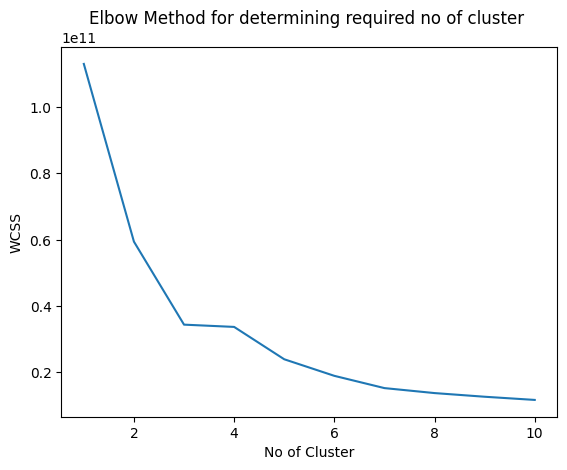

In [29]:
# within cluster sum of squared 
wcss=[] # the sum of square distance within cluster.
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("Elbow Method for determining required no of cluster ")
plt.xlabel('No of Cluster')
plt.ylabel("WCSS")
plt.show()

In [30]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state = 42)

In [31]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [32]:
y_kmeans = kmeans.fit_predict(df1)

print(y_kmeans)

[1 1 2 ... 2 1 1]


In [39]:
print(kmeans.labels_)

[1 1 2 ... 2 1 1]


In [33]:
#starting the cluster numbering at 1 rather than 0.
y_kmeans1=y_kmeans+1

In [34]:
# The cluster is a new list.
cluster = list(y_kmeans1)
# A cluster is added to our dataset.
df['cluster'] = cluster

In [35]:
#Average across Clusters 1 through 3
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(numeric_only=True),1))
kmeans_mean_cluster

YEAR  MURDER  ATTEMPT TO MURDER  \
cluster                                      
1        2009.1    31.5               26.0   
2        2006.6    36.3               30.4   
3        2007.0   107.8              101.6   

         CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
cluster                                                                    
1                                              2.3  22.3             0.0   
2                                              3.8  21.4             0.0   
3                                             13.0  64.6             0.0   

         OTHER RAPE  KIDNAPPING & ABDUCTION  \
cluster                                       
1              22.3                    16.9   
2              21.4                    27.8   
3              64.5                   120.8   

         KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  ...  ARSON  \
cluster                                               ...          
1                                       4.1      9.4  ...   10.9   
2                                       6.6      5.4  ...   10.7   
3                                      34.9     15.2  ...   27.8   

         HURT/GREVIOUS HURT  DOWRY DEATHS  CAUSING DEATH BY NEGLIGENCE  \
cluster                                                                  
1                     319.1           3.3                        127.8   
2                     277.5           7.8                         84.5   
3                    1050.2          26.9                        299.4   

         OTHER IPC CRIMES  TOTAL IPC CRIMES  Total Crime Against Women  \
cluster                                                                  
1                   918.8            2374.2                      221.4   
2                   847.9            1951.4                      161.8   
3                  2819.4            7562.8                      675.6   

         Total Crime Against Chilren  Total Crimes Against SCs  \
cluster                                                          
1                               22.3                    3936.2   
2                               52.9                      43.9   
3                               73.5                      78.2   

         Total Crimes Against STs  
cluster                            
1                           634.1  
2                             8.8  
3                            12.9  

[3 rows x 30 columns]

In [36]:
df

STATE/UT       DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001.0   101.0               60.0   
1     ANDHRA PRADESH      ANANTAPUR  2001.0   151.0              125.0   
2     ANDHRA PRADESH       CHITTOOR  2001.0   101.0               57.0   
3     ANDHRA PRADESH       CUDDAPAH  2001.0    80.0               53.0   
4     ANDHRA PRADESH  EAST GODAVARI  2001.0    82.0               67.0   
...              ...            ...     ...     ...                ...   
9009        DELHI UT     SOUTH-WEST  2012.0    47.0               48.0   
9010        DELHI UT            STF  2012.0     0.0                1.0   
9011        DELHI UT           WEST  2012.0    52.0               37.0   
9012     LAKSHADWEEP    LAKSHADWEEP  2012.0     0.0                0.0   
9014      PUDUCHERRY       KARAIKAL  2012.0     5.0                6.0   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                          17.0  50.0             0.0   
1                                           1.0  23.0             0.0   
2                                           2.0  27.0             0.0   
3                                           1.0  20.0             0.0   
4                                           1.0  23.0             0.0   
...                                         ...   ...             ...   
9009                                        6.0  87.0             0.0   
9010                                        0.0   0.0             0.0   
9011                                       10.0  79.0             0.0   
9012                                        0.0   0.0             0.0   
9014                                        2.0   6.0             0.0   

      OTHER RAPE  KIDNAPPING & ABDUCTION  ...  HURT/GREVIOUS HURT  \
0           50.0                    46.0  ...              1131.0   
1           23.0                    53.0  ...              1543.0   
2           27.0                    59.0  ...              2088.0   
3           20.0                    25.0  ...               795.0   
4           23.0                    49.0  ...              1244.0   
...          ...                     ...  ...                 ...   
9009        87.0                   399.0  ...               131.0   
9010         0.0                     0.0  ...                 0.0   
9011        79.0                   454.0  ...               227.0   
9012         0.0                     0.0  ...                 3.0   
9014         6.0                     2.0  ...               186.0   

      DOWRY DEATHS  CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  \
0             16.0                        181.0            1518.0   
1              7.0                        270.0             754.0   
2             14.0                        404.0            1262.0   
3             17.0                        233.0            1181.0   
4             12.0                        431.0            2313.0   
...            ...                          ...               ...   
9009          18.0                          4.0            1387.0   
9010           0.0                          0.0               1.0   
9011          18.0                        292.0            1144.0   
9012           0.0                          0.0              32.0   
9014           0.0                         44.0             392.0   

      TOTAL IPC CRIMES  Total Crime Against Women  \
0               4154.0                      454.0   
1               4125.0                      356.0   
2               5818.0                      456.0   
3               3140.0                      278.0   
4               6507.0                      475.0   
...                ...                        ...   
9009            4085.0                      646.0   
9010               6.0                        0.0   
9011            5558.0                      739.0   
9012              60.0                        2.0   
9014 

In [37]:
df.dtypes

STATE/UT                                      object
DISTRICT                                      object
YEAR                                         float64
MURDER                                       float64
ATTEMPT TO MURDER                            float64
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER    float64
RAPE                                         float64
CUSTODIAL RAPE                               float64
OTHER RAPE                                   float64
KIDNAPPING & ABDUCTION                       float64
KIDNAPPING AND ABDUCTION OF OTHERS           float64
DACOITY                                      float64
PREPARATION AND ASSEMBLY FOR DACOITY         float64
ROBBERY                                      float64
BURGLARY                                     float64
THEFT                                        float64
AUTO THEFT                                   float64
OTHER THEFT                                  float64
RIOTS                                        f

In [ ]:
#Here in the above dataframe it displays the  mean value for each cluster for each crime in the clusters

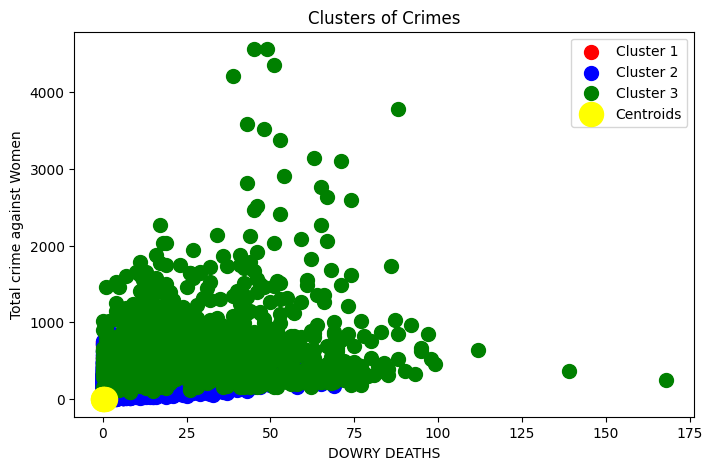

In [38]:
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans1 == 1]['DOWRY DEATHS'], X[y_kmeans1 == 1]['Total Crime Against Women'], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X[y_kmeans1 == 2]['DOWRY DEATHS'], X[y_kmeans1 == 2]['Total Crime Against Women'], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y_kmeans1 == 3]['DOWRY DEATHS'], X[y_kmeans1 == 3]['Total Crime Against Women'], s = 100, c = 'green', label = 'Cluster 3')



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Crimes')
plt.xlabel('DOWRY DEATHS')
plt.ylabel('Total crime against Women')
plt.savefig('clusterscatter.jpg')
plt.legend()
plt.show()

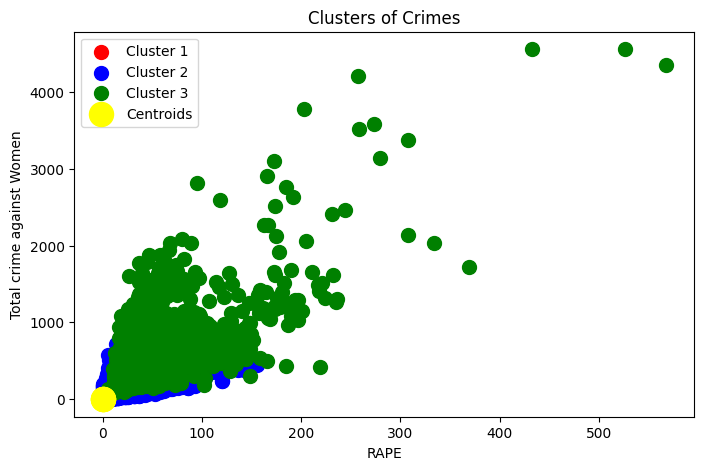

In [39]:
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans1 == 1]['RAPE'], X[y_kmeans1 == 1]['Total Crime Against Women'], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X[y_kmeans1 == 2]['RAPE'], X[y_kmeans1 == 2]['Total Crime Against Women'], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y_kmeans1 == 3]['RAPE'], X[y_kmeans1 == 3]['Total Crime Against Women'], s = 100, c = 'green', label = 'Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Crimes')
plt.xlabel('RAPE')
plt.ylabel('Total crime against Women')
plt.savefig('clusterscatter.jpg')
plt.legend()
plt.show()

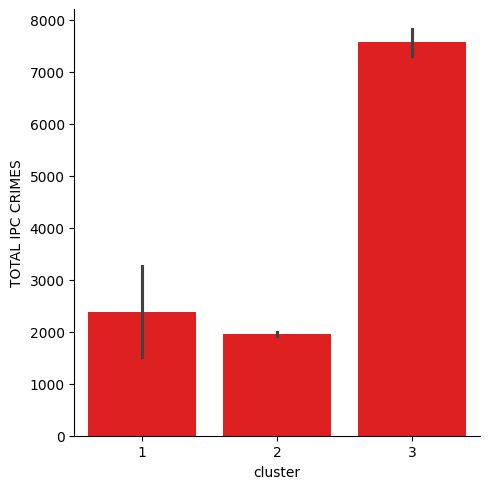

In [40]:
sns.catplot(x='cluster', y='TOTAL IPC CRIMES', data=df, kind='bar',color='red');
plt.savefig('clustercatplot.jpg')

<Axes: xlabel='MURDER', ylabel='ATTEMPT TO MURDER'>

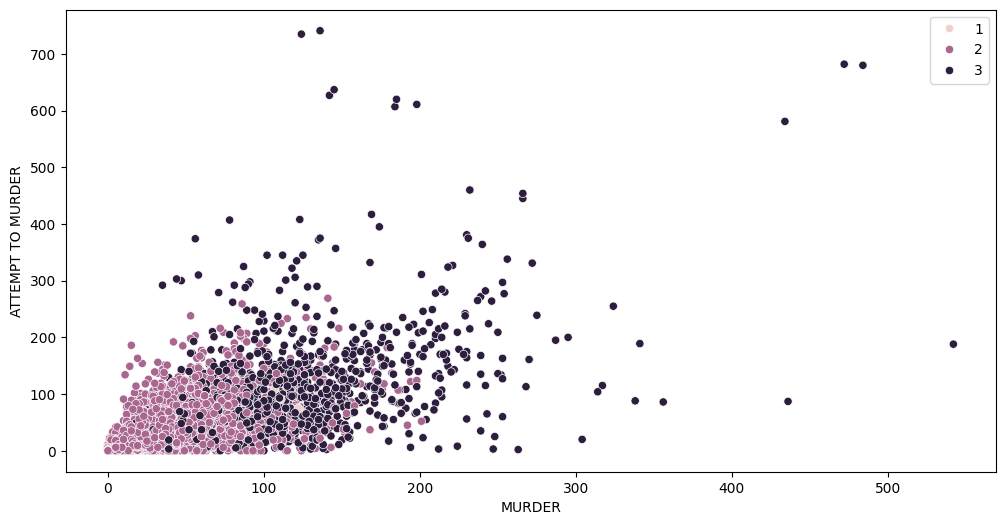

In [41]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['MURDER'], y = df['ATTEMPT TO MURDER'],hue=y_kmeans1)

In [42]:
data1=df[df['cluster']==1]
data2=df[df['cluster']==2]
data3=df[df['cluster']==3]

# District-by-district Grouping and Then Looking for the Maximum Values for Each Column


In [43]:
data3.groupby('DISTRICT').max()


STATE/UT    YEAR  MURDER  ATTEMPT TO MURDER  \
DISTRICT                                                               
24 PARGANAS NORTH     WEST BENGAL  2012.0   244.0              238.0   
24 PARGANAS SOUTH     WEST BENGAL  2012.0   263.0              123.0   
ADILABAD           ANDHRA PRADESH  2012.0   112.0               94.0   
AGRA                UTTAR PRADESH  2012.0   181.0              190.0   
AHMEDABAD COMMR.          GUJARAT  2012.0   222.0              143.0   
...                           ...     ...     ...                ...   
VISAKHAPATNAM      ANDHRA PRADESH  2011.0    39.0               34.0   
WARANGAL           ANDHRA PRADESH  2009.0   158.0               93.0   
WEST                     DELHI UT  2012.0    73.0               72.0   
WEST GODAVARI      ANDHRA PRADESH  2012.0    91.0              130.0   
YAVATMAL              MAHARASHTRA  2012.0    72.0               87.0   

                   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   RAPE  \
DISTRICT                                                              
24 PARGANAS NORTH                                      241.0  231.0   
24 PARGANAS SOUTH                                       75.0  308.0   
ADILABAD                                                14.0   88.0   
AGRA                                                    55.0   76.0   
AHMEDABAD COMMR.                                        60.0   63.0   
...                                                      ...    ...   
VISAKHAPATNAM                                            5.0   57.0   
WARANGAL                                                11.0   70.0   
WEST                                                    19.0   94.0   
WEST GODAVARI                                            8.0  130.0   
YAVATMAL                                                10.0   66.0   

                   CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
DISTRICT                                                                
24 PARGANAS NORTH             0.0       231.0                   587.0   
24 PARGANAS SOUTH             0.0       308.0                   419.0   
ADILABAD                      0.0        88.0                    96.0   
AGRA                          0.0        76.0                   395.0   
AHMEDABAD COMMR.              0.0        63.0                   230.0   
...                           ...         ...                     ...   
VISAKHAPATNAM                 0.0        57.0                    50.0   
WARANGAL                      0.0        70.0                   140.0   
WEST                          0.0        94.0                   454.0   
WEST GODAVARI                 0.0       130.0                   144.0   
YAVATMAL                      0.0        66.0                    65.0   

                   KIDNAPPING AND ABDUCTION OF OTHERS  ...  \
DISTRICT                                               ...   
24 PARGANAS NORTH                               173.0  ...   
24 PARGANAS SOUTH                                65.0  ...   
ADILABAD                                         25.0  ...   
AGRA                                             71.0  ...   
AHMEDABAD COMMR.                                 93.0  ...   
...                                               ...  ...   
VISAKHAPATNAM                                    22.0  ...   
WARANGAL                                         56.0  ...   
WEST                                            199.0  ...   
WEST GODAVARI                                    54.0  ...   
YAVATMAL                                          5.0  ...   

                   HURT/GREVIOUS HURT  DOWRY DEATHS  \
DISTRICT                                              
24 PARGANAS NORTH               349.0          88.0   
24 PARGANAS SOUTH               390.0          68.0   
ADILABAD                       2172.0          22.0   
AGRA                            573.0          88.0   
AHMEDABAD COMMR.               1594.0          19.0   
...                   

In [44]:
data3.groupby('DISTRICT').min()

STATE/UT    YEAR  MURDER  ATTEMPT TO MURDER  \
DISTRICT                                                               
24 PARGANAS NORTH     WEST BENGAL  2001.0   140.0                6.0   
24 PARGANAS SOUTH     WEST BENGAL  2001.0   107.0                2.0   
ADILABAD           ANDHRA PRADESH  2005.0    81.0               39.0   
AGRA                UTTAR PRADESH  2001.0   109.0              116.0   
AHMEDABAD COMMR.          GUJARAT  2001.0    76.0               44.0   
...                           ...     ...     ...                ...   
VISAKHAPATNAM      ANDHRA PRADESH  2009.0    24.0               25.0   
WARANGAL           ANDHRA PRADESH  2001.0   103.0               42.0   
WEST                     DELHI UT  2001.0    46.0               29.0   
WEST GODAVARI      ANDHRA PRADESH  2001.0    59.0               58.0   
YAVATMAL              MAHARASHTRA  2005.0    61.0               71.0   

                   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  \
DISTRICT                                                             
24 PARGANAS NORTH                                       38.0  53.0   
24 PARGANAS SOUTH                                       25.0  47.0   
ADILABAD                                                 8.0  46.0   
AGRA                                                    18.0  26.0   
AHMEDABAD COMMR.                                         0.0  12.0   
...                                                      ...   ...   
VISAKHAPATNAM                                            4.0  39.0   
WARANGAL                                                 2.0  34.0   
WEST                                                     6.0  44.0   
WEST GODAVARI                                            0.0  52.0   
YAVATMAL                                                 7.0  59.0   

                   CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
DISTRICT                                                                
24 PARGANAS NORTH             0.0        53.0                    81.0   
24 PARGANAS SOUTH             0.0        47.0                    53.0   
ADILABAD                      0.0        46.0                    65.0   
AGRA                          0.0        26.0                    99.0   
AHMEDABAD COMMR.              0.0        12.0                   143.0   
...                           ...         ...                     ...   
VISAKHAPATNAM                 0.0        39.0                    34.0   
WARANGAL                      0.0        34.0                    72.0   
WEST                          0.0        44.0                   105.0   
WEST GODAVARI                 0.0        52.0                    41.0   
YAVATMAL                      0.0        59.0                    37.0   

                   KIDNAPPING AND ABDUCTION OF OTHERS  ...  \
DISTRICT                                               ...   
24 PARGANAS NORTH                                 0.0  ...   
24 PARGANAS SOUTH                                 0.0  ...   
ADILABAD                                          7.0  ...   
AGRA                                             26.0  ...   
AHMEDABAD COMMR.                                 26.0  ...   
...                                               ...  ...   
VISAKHAPATNAM                                     2.0  ...   
WARANGAL                                         10.0  ...   
WEST                                             27.0  ...   
WEST GODAVARI                                    20.0  ...   
YAVATMAL                                          3.0  ...   

                   HURT/GREVIOUS HURT  DOWRY DEATHS  \
DISTRICT                                              
24 PARGANAS NORTH                 0.0          23.0   
24 PARGANAS SOUTH                 0.0          43.0   
ADILABAD                       1244.0           7.0   
AGRA                            360.0          38.0   
AHMEDABAD COMMR.               1165.0           1.0   
...                               .

In [45]:
data3.shape

(1273, 33)

In [48]:
#Creating a senstivearea dataframe (with cluster value 3) from data3
sensitivearea=df[df['cluster']==3]

# Verification for data2


In [49]:
data2.groupby('DISTRICT').max()


STATE/UT    YEAR  MURDER  ATTEMPT TO MURDER  \
DISTRICT                                                             
A and N ISLANDS   A & N ISLANDS  2007.0    15.0               19.0   
ADILABAD         ANDHRA PRADESH  2010.0   113.0               90.0   
AHMEDABAD RURAL         GUJARAT  2012.0    63.0               33.0   
AHWA-DANG               GUJARAT  2012.0    11.0                3.0   
AIZAWL                  MIZORAM  2012.0    23.0               24.0   
...                         ...     ...     ...                ...   
WOKHA                  NAGALAND  2012.0    12.0                7.0   
YADGIRI               KARNATAKA  2012.0    26.0               51.0   
YAMUNANAGAR             HARYANA  2012.0    50.0               56.0   
YAVATMAL            MAHARASHTRA  2011.0    84.0               68.0   
ZUNHEBOTO              NAGALAND  2012.0    14.0                5.0   

                 CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  \
DISTRICT                                                           
A and N ISLANDS                                        1.0   3.0   
ADILABAD                                              17.0  50.0   
AHMEDABAD RURAL                                        8.0  12.0   
AHWA-DANG                                              0.0   5.0   
AIZAWL                                                 6.0  42.0   
...                                                    ...   ...   
WOKHA                                                  1.0   3.0   
YADGIRI                                                0.0   9.0   
YAMUNANAGAR                                            5.0  36.0   
YAVATMAL                                              13.0  65.0   
ZUNHEBOTO                                              1.0   3.0   

                 CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
DISTRICT                                                              
A and N ISLANDS             0.0         3.0                    12.0   
ADILABAD                    0.0        50.0                    55.0   
AHMEDABAD RURAL             0.0        12.0                    74.0   
AHWA-DANG                   0.0         5.0                     2.0   
AIZAWL                      0.0        42.0                     7.0   
...                         ...         ...                     ...   
WOKHA                       0.0         3.0                     4.0   
YADGIRI                     0.0         9.0                    26.0   
YAMUNANAGAR                 0.0        36.0                    83.0   
YAVATMAL                    0.0        65.0                    54.0   
ZUNHEBOTO                   0.0         3.0                     3.0   

                 KIDNAPPING AND ABDUCTION OF OTHERS  ...  HURT/GREVIOUS HURT  \
DISTRICT                                             ...                       
A and N ISLANDS                                 3.0  ...                99.0   
ADILABAD                                       30.0  ...              1289.0   
AHMEDABAD RURAL                                12.0  ...               518.0   
AHWA-DANG                                       1.0  ...                34.0   
AIZAWL                                          7.0  ...                51.0   
...                                             ...  ...                 ...   
WOKHA                                           2.0  ...                10.0   
YADGIRI                                        26.0  ...               353.0   
YAMUNANAGAR                                    37.0  ...               235.0   
YAVATMAL                                        8.0  ...              1177.0   
ZUNHEBOTO                                       0.0  ...                10.0   

                 DOWRY DEATHS  CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  \
DISTRICT                                                                       
A and N ISLANDS           1.0                          4.0             337.0   
ADILABAD              

In [53]:
data2.shape

(7277, 33)

In [50]:
peacefularea=df[df['cluster']==2] 

In [ ]:
We have a sensitive, peaceful location, hence data1 with cluster value 1 will be our moderate area.
Cluster 1 data analysis by district grouping

In [51]:
data1.groupby('DISTRICT').max()

STATE/UT    YEAR  MURDER  ATTEMPT TO MURDER  \
DISTRICT                                                               
AHMEDNAGAR            MAHARASHTRA  2012.0   134.0              108.0   
ALAPUZHA                   KERALA  2012.0    27.0               37.0   
ALMORA                UTTARAKHAND  2012.0    22.0               10.0   
AMRITSAR                   PUNJAB  2011.0    54.0               71.0   
AMRITSAR RURAL             PUNJAB  2012.0    46.0               61.0   
ANJAW           ARUNACHAL PRADESH  2012.0     2.0                1.0   
BALOD                CHHATTISGARH  2012.0    15.0                2.0   
BALRAMPUR            CHHATTISGARH  2011.0    49.0               27.0   
CHANGLANG       ARUNACHAL PRADESH  2008.0     6.0                4.0   
EAST                       SIKKIM  2012.0    10.0               10.0   

                CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  \
DISTRICT                                                          
AHMEDNAGAR                                            5.0  78.0   
ALAPUZHA                                             10.0  56.0   
ALMORA                                                3.0  11.0   
AMRITSAR                                              9.0  16.0   
AMRITSAR RURAL                                        5.0  18.0   
ANJAW                                                 0.0   1.0   
BALOD                                                 2.0  22.0   
BALRAMPUR                                             2.0  61.0   
CHANGLANG                                             1.0   7.0   
EAST                                                  3.0  13.0   

                CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
DISTRICT                                                             
AHMEDNAGAR                 0.0        78.0                    82.0   
ALAPUZHA                   0.0        56.0                    21.0   
ALMORA                     0.0        11.0                     7.0   
AMRITSAR                   0.0        16.0                    54.0   
AMRITSAR RURAL             0.0        18.0                    45.0   
ANJAW                      0.0         1.0                     1.0   
BALOD                      0.0        22.0                     7.0   
BALRAMPUR                  0.0        61.0                    12.0   
CHANGLANG                  0.0         7.0                     4.0   
EAST                       0.0        13.0                     6.0   

                KIDNAPPING AND ABDUCTION OF OTHERS  ...  HURT/GREVIOUS HURT  \
DISTRICT                                            ...                       
AHMEDNAGAR                                    23.0  ...               802.0   
ALAPUZHA                                       5.0  ...              2103.0   
ALMORA                                         0.0  ...                38.0   
AMRITSAR                                      10.0  ...               245.0   
AMRITSAR RURAL                                15.0  ...               208.0   
ANJAW                                          0.0  ...                 6.0   
BALOD                                          1.0  ...                24.0   
BALRAMPUR                                     12.0  ...               222.0   
CHANGLANG                                      0.0  ...                39.0   
EAST                                           1.0  ...                40.0   

                DOWRY DEATHS  CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  \
DISTRICT                                                                      
AHMEDNAGAR              32.0                        744.0            1918.0   
ALAPUZHA                 2.0                          4.0            5771.0   
ALMORA                   8.0                         25.0              90.0   
AMRITSAR                 7.0                        169.0             673.0   
AMRITSAR RURAL           8.0                        161.0             309.0   
ANJAW       

In [52]:
moderatearea=df[df['cluster']==1]

In [57]:
data1.groupby('DISTRICT').min()

STATE/UT    YEAR  MURDER  ATTEMPT TO MURDER  \
DISTRICT                                                               
AHMEDNAGAR            MAHARASHTRA  2006.0    81.0               49.0   
ALAPUZHA                   KERALA  2008.0     8.0               17.0   
ALMORA                UTTARAKHAND  2005.0     2.0                0.0   
AMRITSAR                   PUNJAB  2005.0    46.0               28.0   
AMRITSAR RURAL             PUNJAB  2010.0    43.0               37.0   
ANJAW           ARUNACHAL PRADESH  2009.0     0.0                0.0   
BALOD                CHHATTISGARH  2012.0    15.0                2.0   
BALRAMPUR            CHHATTISGARH  2008.0    30.0               12.0   
CHANGLANG       ARUNACHAL PRADESH  2006.0     3.0                3.0   
EAST                       SIKKIM  2005.0     2.0                3.0   

                CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  \
DISTRICT                                                          
AHMEDNAGAR                                            1.0  49.0   
ALAPUZHA                                              2.0  16.0   
ALMORA                                                0.0   2.0   
AMRITSAR                                              1.0   5.0   
AMRITSAR RURAL                                        1.0  16.0   
ANJAW                                                 0.0   0.0   
BALOD                                                 2.0  22.0   
BALRAMPUR                                             1.0  41.0   
CHANGLANG                                             0.0   2.0   
EAST                                                  0.0   5.0   

                CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
DISTRICT                                                             
AHMEDNAGAR                 0.0        49.0                    36.0   
ALAPUZHA                   0.0        16.0                    14.0   
ALMORA                     0.0         2.0                     0.0   
AMRITSAR                   0.0         5.0                    20.0   
AMRITSAR RURAL             0.0        16.0                    29.0   
ANJAW                      0.0         0.0                     0.0   
BALOD                      0.0        22.0                     7.0   
BALRAMPUR                  0.0        41.0                     2.0   
CHANGLANG                  0.0         2.0                     2.0   
EAST                       0.0         5.0                     2.0   

                KIDNAPPING AND ABDUCTION OF OTHERS  ...  HURT/GREVIOUS HURT  \
DISTRICT                                            ...                       
AHMEDNAGAR                                    10.0  ...               690.0   
ALAPUZHA                                       1.0  ...              1185.0   
ALMORA                                         0.0  ...                 0.0   
AMRITSAR                                       1.0  ...               114.0   
AMRITSAR RURAL                                 4.0  ...               160.0   
ANJAW                                          0.0  ...                 3.0   
BALOD                                          1.0  ...                24.0   
BALRAMPUR                                      0.0  ...                58.0   
CHANGLANG                                      0.0  ...                20.0   
EAST                                           0.0  ...                24.0   

                DOWRY DEATHS  CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  \
DISTRICT                                                                      
AHMEDNAGAR               0.0                        538.0            1376.0   
ALAPUZHA                 0.0                          0.0            4718.0   
ALMORA                   2.0                          3.0              34.0   
AMRITSAR                 1.0                         79.0             239.0   
AMRITSAR RURAL           2.0                        129.0             235.0   
ANJAW       

# 4.2 For every cluster, creating a DataFrame that displays data based on the areas.

In [ ]:
3 datasets were created based on the cluster value and given the following names.

Cluster 3: Sensitive Area;
Cluster 1: Moderate Area;
Cluster 2: Peaceful Area

In [53]:
# To make vissible the cluster 
kmeans.cluster_centers_

array([[ 7.01731393e-01, -3.57450536e-01, -2.94971185e-01,
        -2.89969333e-01, -1.77773152e-01, -3.81895667e-02,
        -1.77698121e-01, -4.38790884e-01, -3.15493118e-01,
         2.24648436e-01, -4.81550693e-02,  5.10057557e-02,
        -2.15779370e-02, -1.36653574e-01, -1.39343608e-01,
        -1.17087863e-01,  3.16103883e-01, -2.47823837e-01,
         2.10025230e-02, -1.59369915e-02, -7.74503498e-02,
        -1.30635345e-01, -5.13440014e-01,  7.24983963e-02,
        -1.53904708e-01, -1.33789915e-01, -5.76383446e-02,
        -1.27169009e-01,  1.19405346e+01,  9.79724786e+00],
       [-2.41411757e-02, -2.46611398e-01, -2.07454136e-01,
        -1.33641377e-01, -2.06354925e-01, -1.91117314e-02,
        -2.06332482e-01, -2.44341944e-01, -1.95518568e-01,
        -1.34049409e-01, -1.00780341e-01, -1.92147996e-01,
        -2.09301122e-01, -2.15515362e-01, -2.05874541e-01,
        -1.95669088e-01, -1.61765438e-01, -1.99638576e-01,
        -1.96692905e-01, -1.36773973e-01, -8.30253941e-

In [59]:
## defining the STATE/UT, YEAR, and DISTRICT columns for each cluster's countplot function
def generate_countplot(x):
    plt.figure(figsize=(25,10))
    sns.countplot(x=x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()


Countplot for STATE/UT column


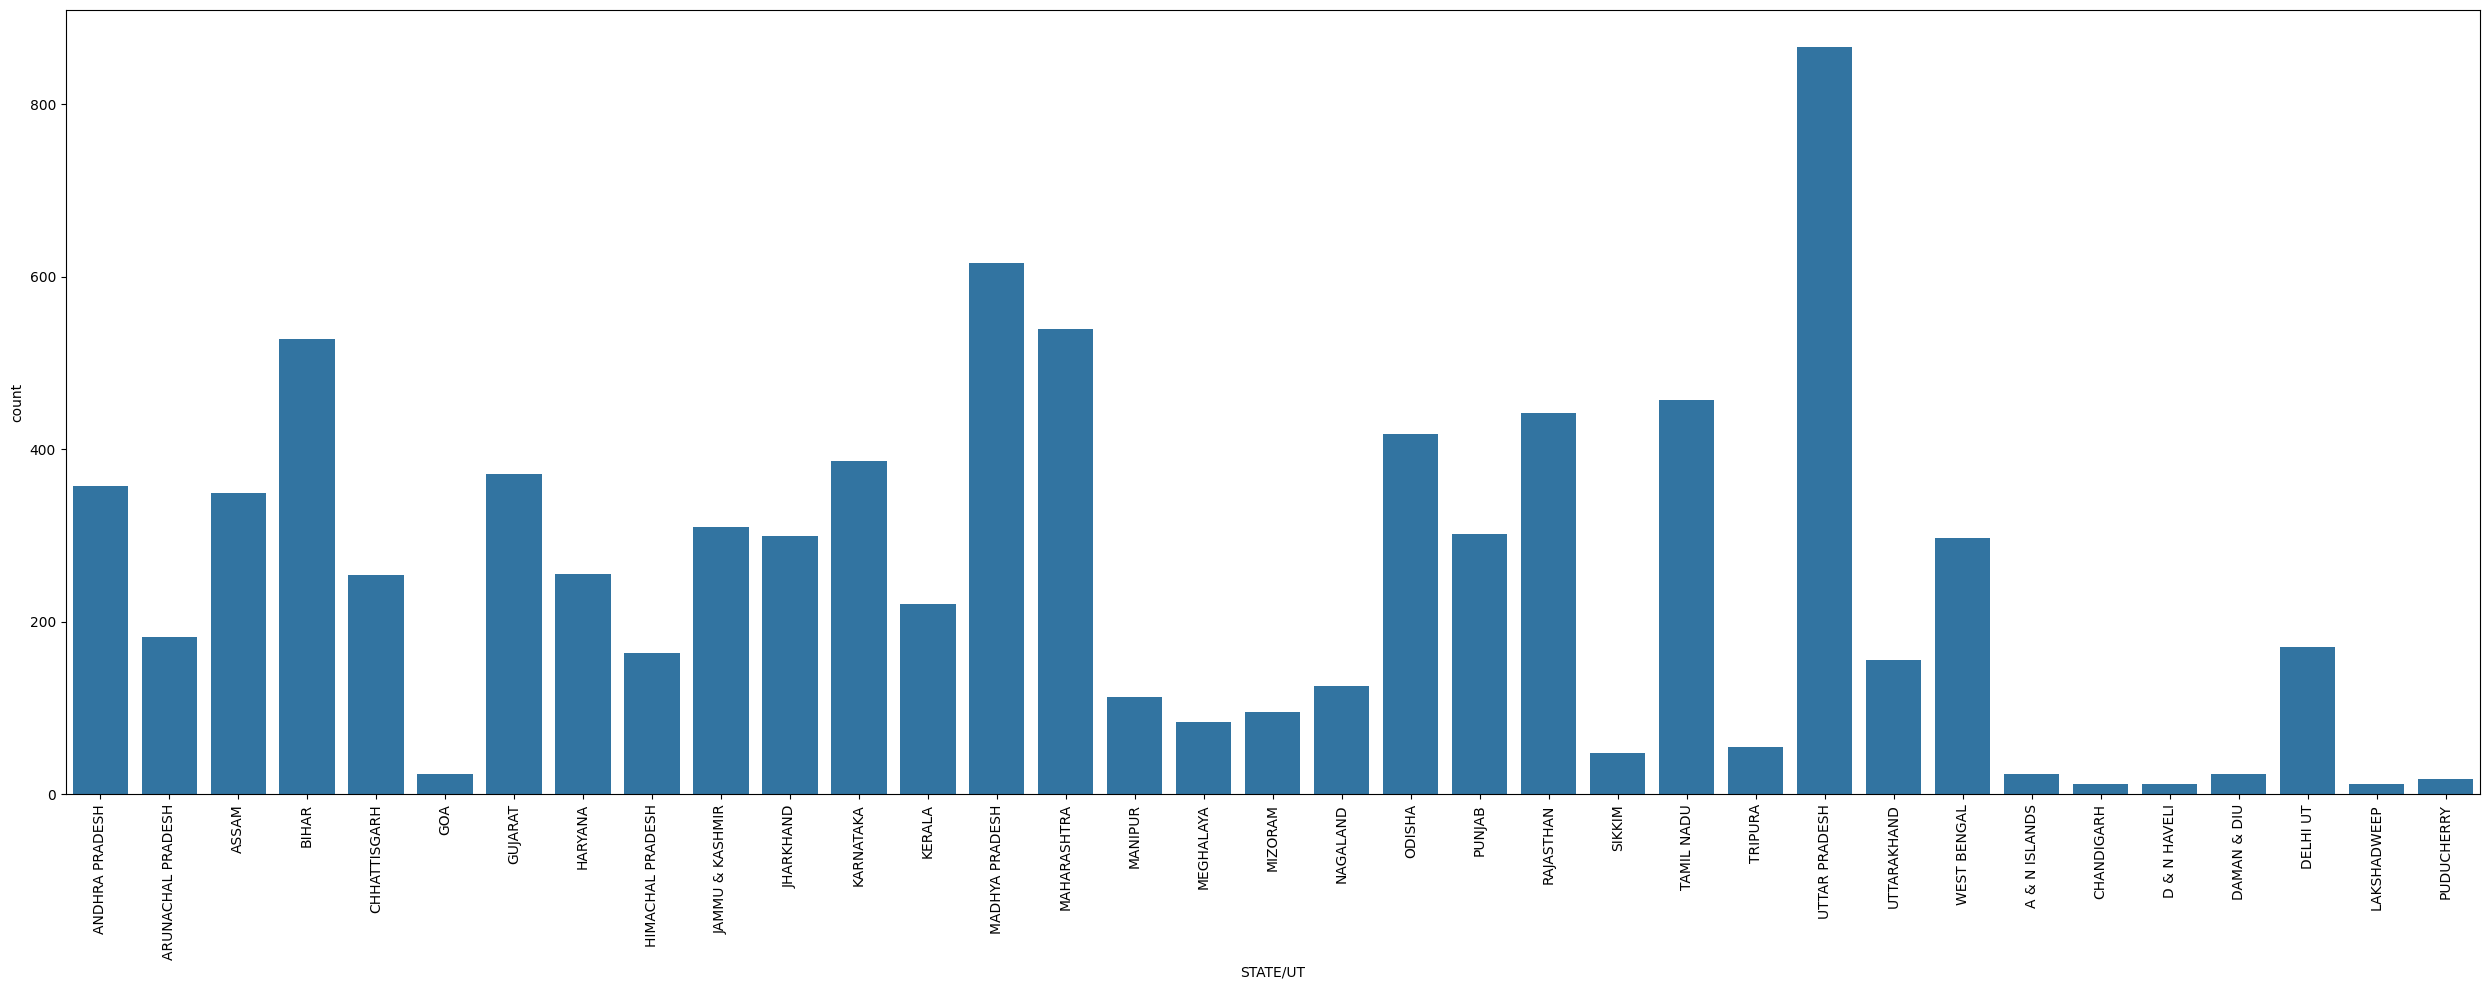

Countplot for YEAR column


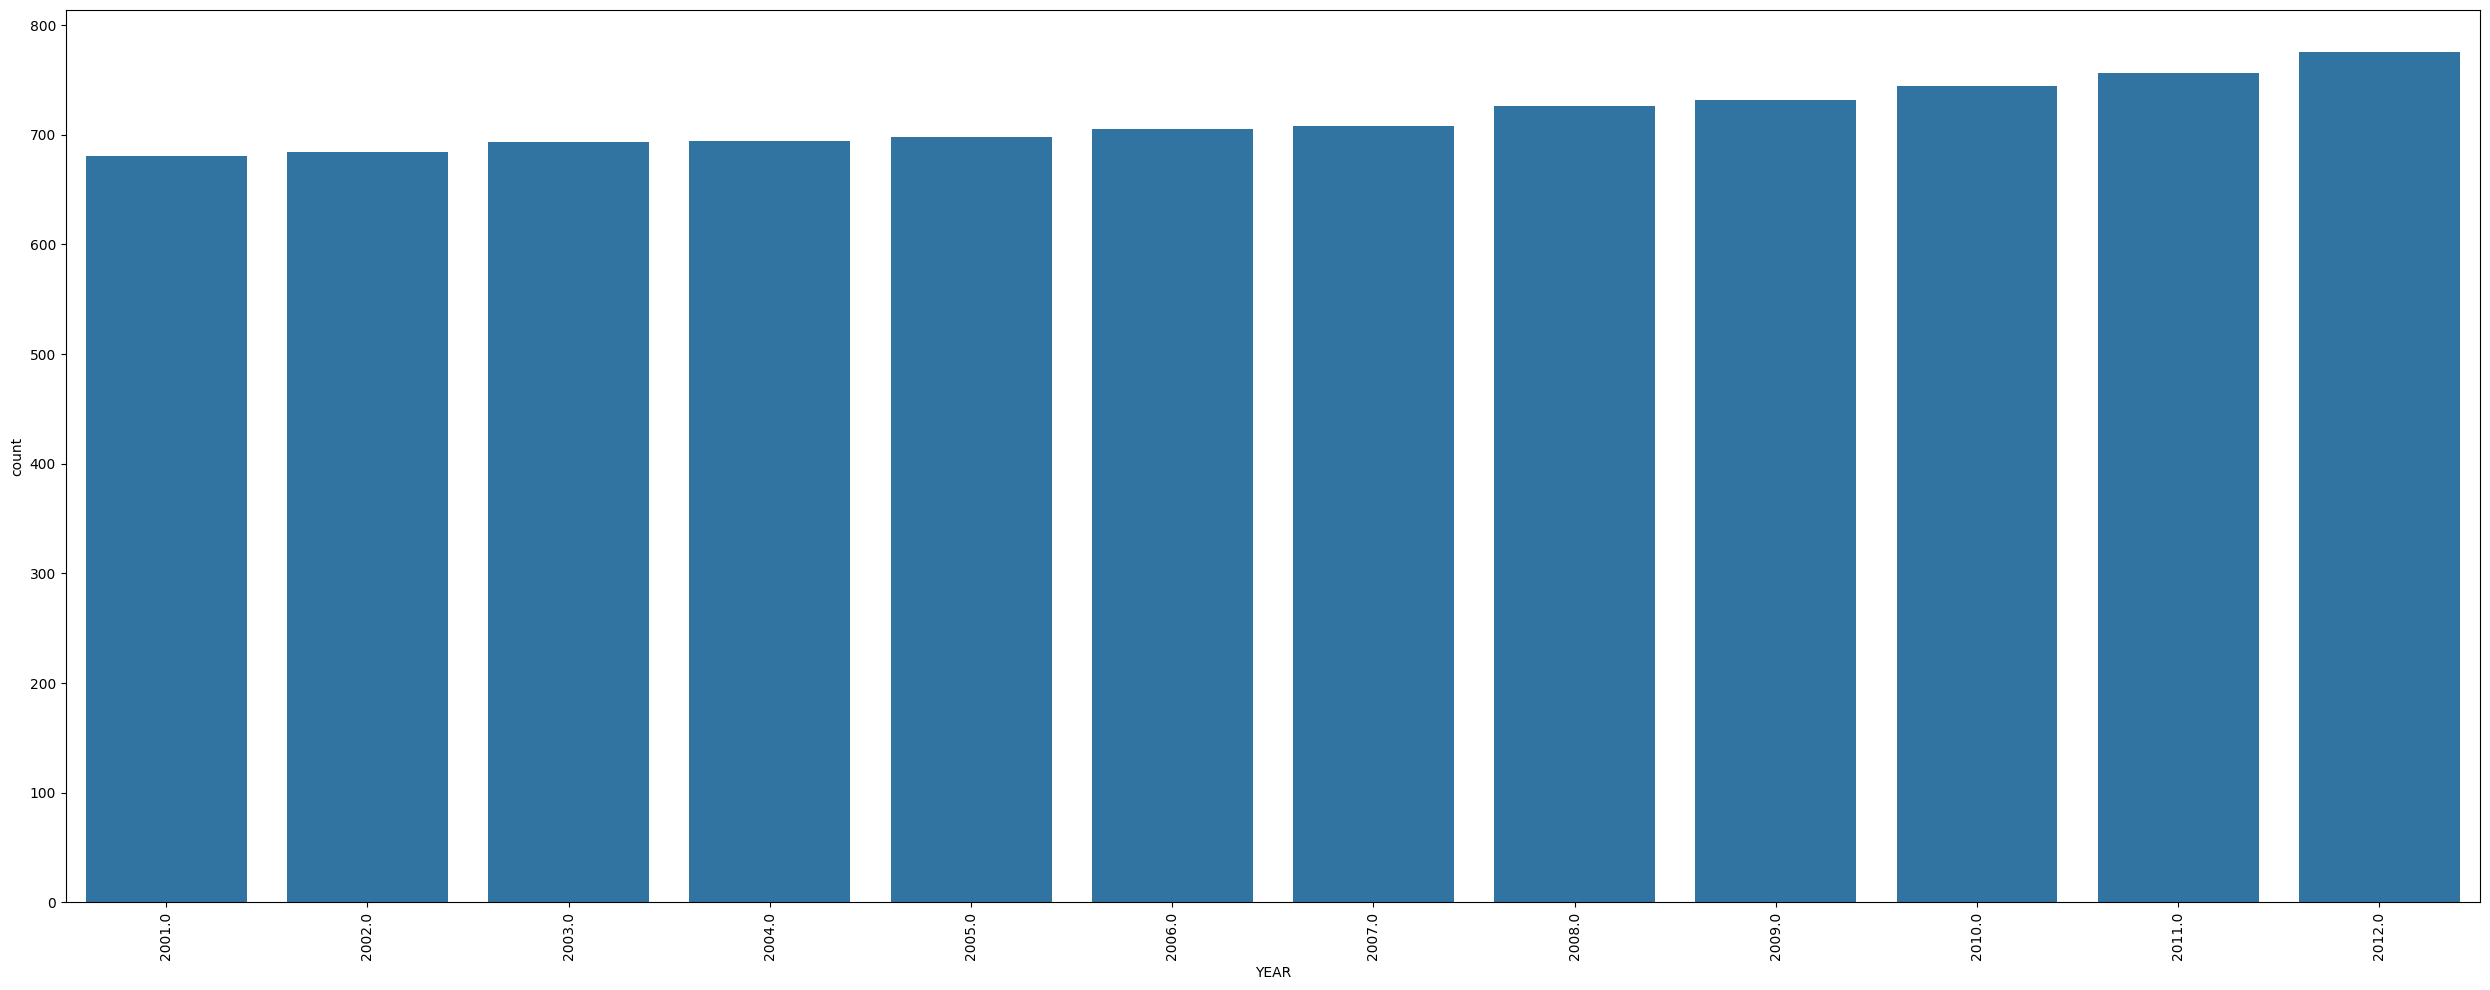

In [60]:
col1 = ['STATE/UT', 'YEAR']
for i in sensitivearea[col1]:
    print("Countplot for {} column".format(i))
    generate_countplot(df[i])

In [ ]:
#States with very few rows, such as Goa, Tripura, Mizoram, and Sikkim,Lakshawdeepindicate that they are safer than other states.

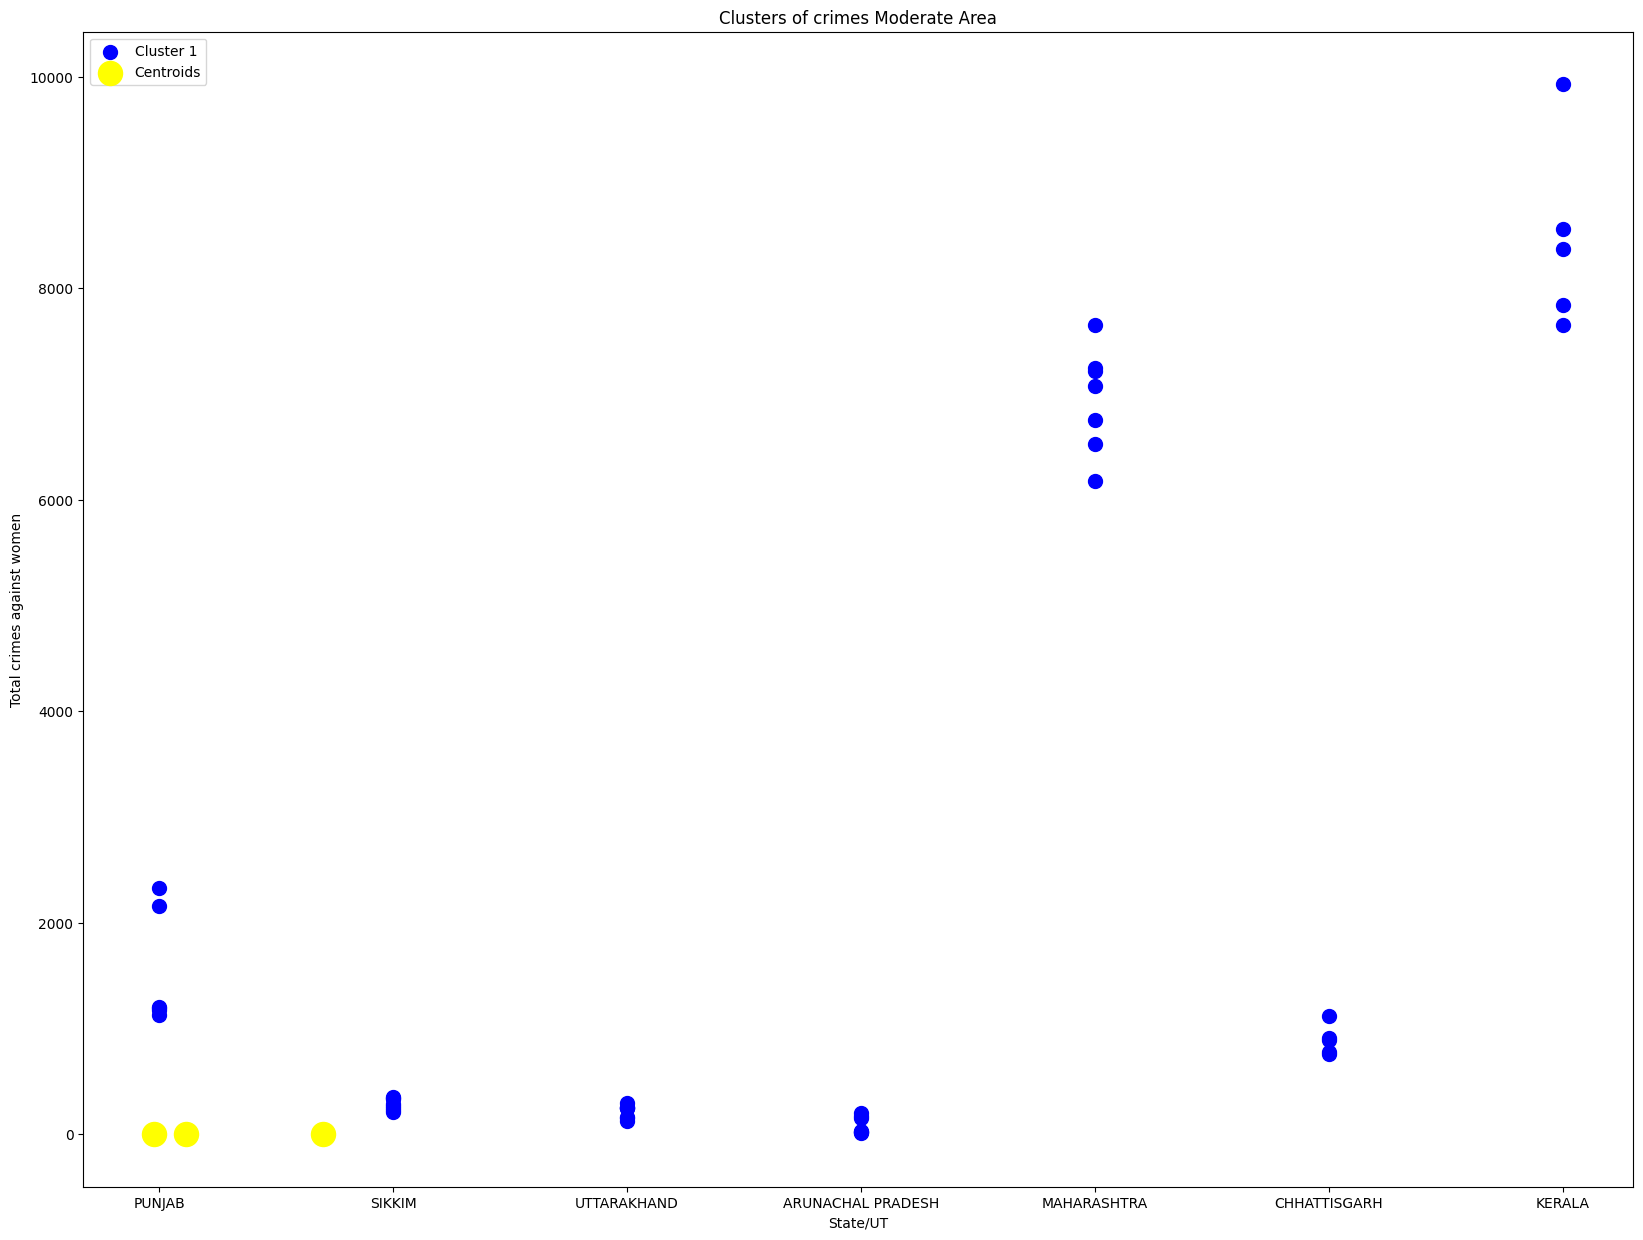

In [61]:
plt.figure(figsize=(20,15))
plt.scatter(moderatearea['STATE/UT'], moderatearea['TOTAL IPC CRIMES'], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of crimes Moderate Area')
plt.xlabel('State/UT')
plt.ylabel('Total crimes against women')
plt.legend()
plt.show()

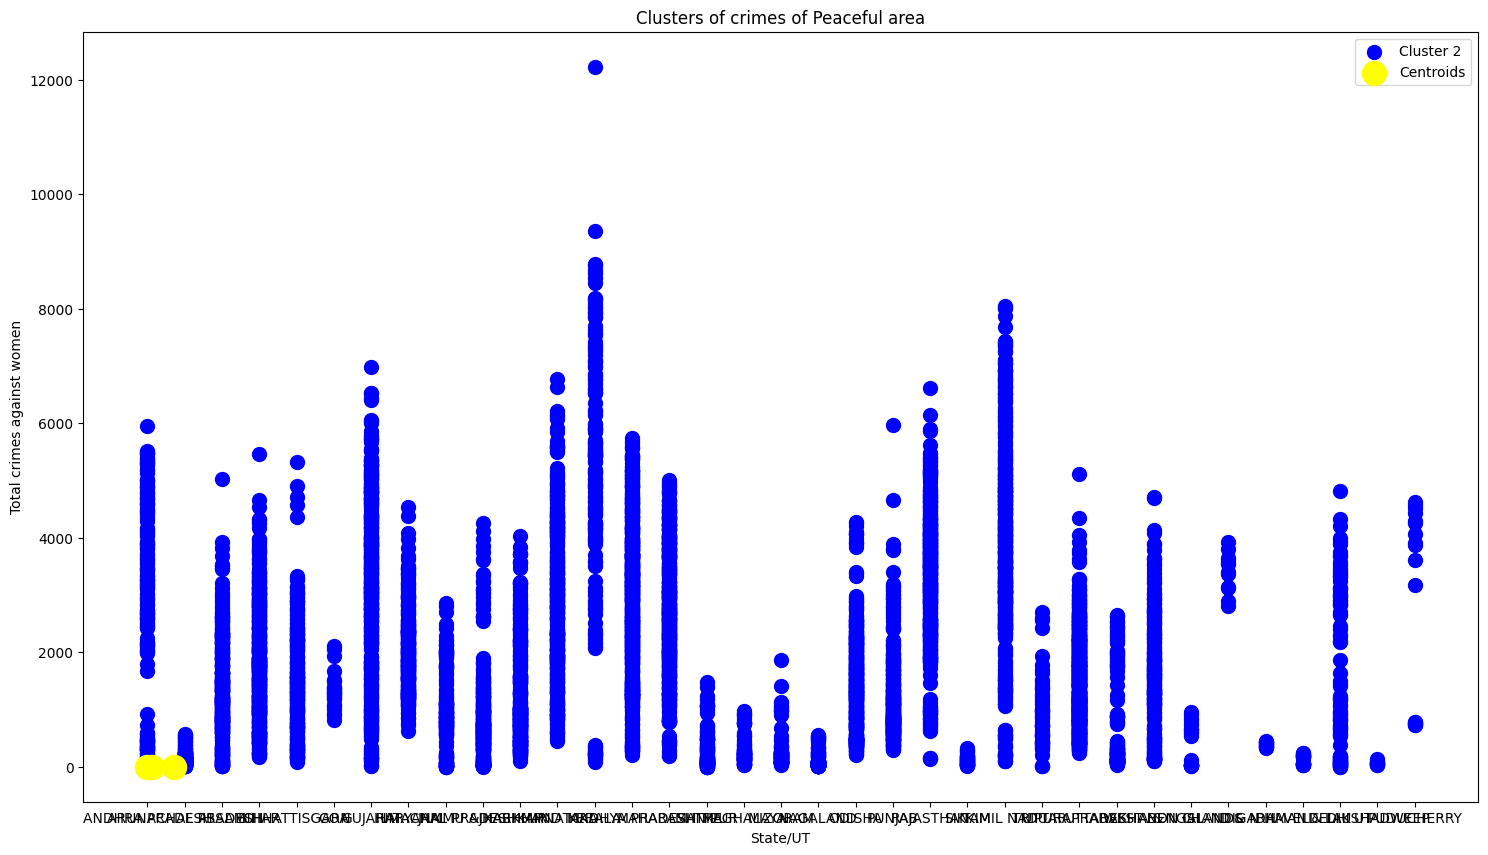

In [75]:
plt.figure(figsize=(18,10))
plt.scatter(peacefularea['STATE/UT'], peacefularea['TOTAL IPC CRIMES'], s = 100, c = 'blue', label = 'Cluster 2'),#hue=data2['STATE/UT'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of crimes of Peaceful area')
plt.xlabel('State/UT')
plt.ylabel('Total crimes against women')
plt.legend()
plt.show()

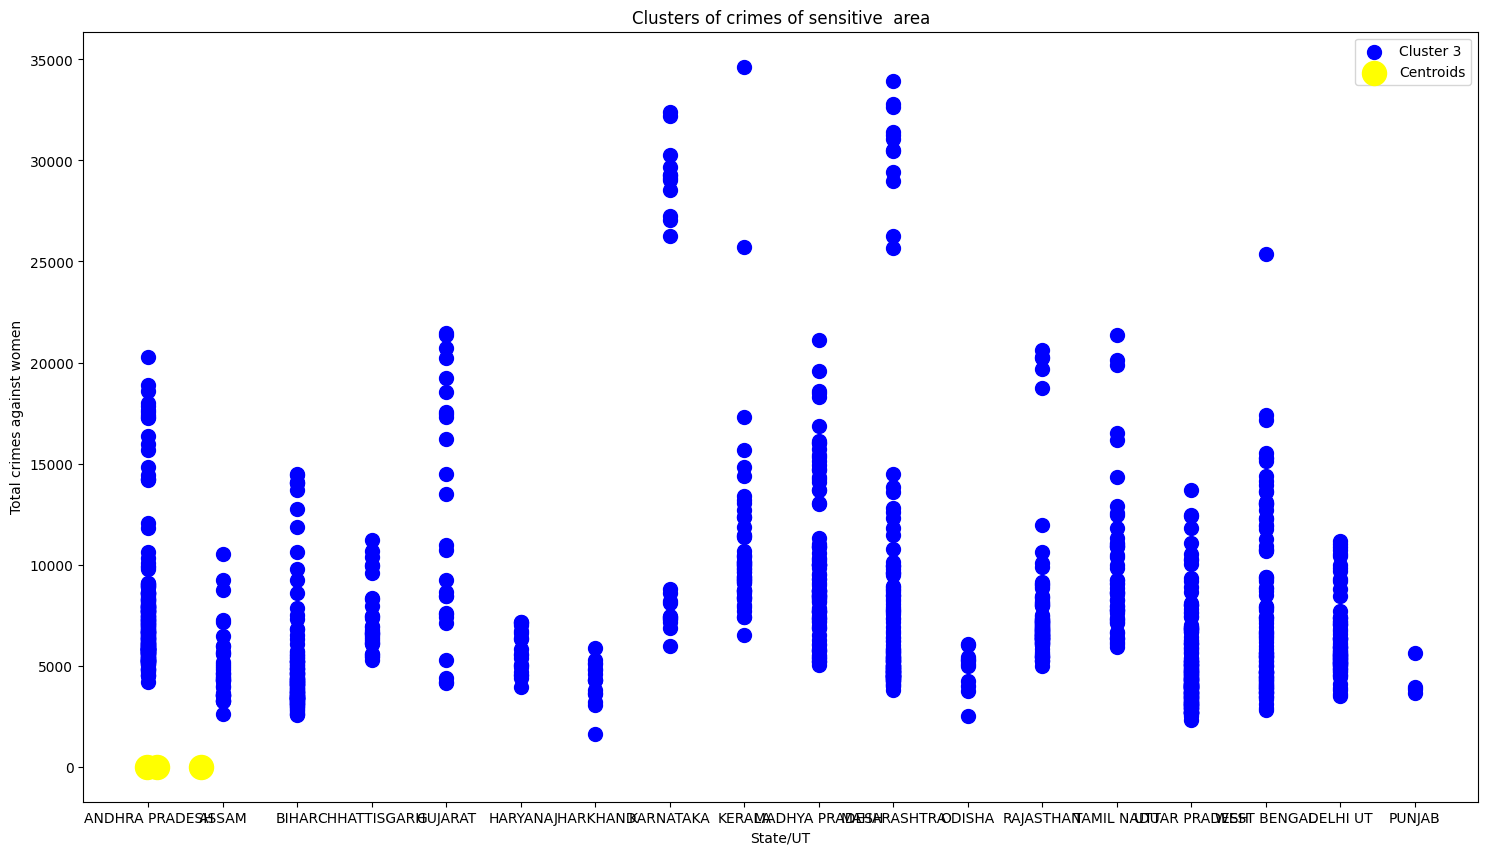

In [62]:
plt.figure(figsize=(18,10))
plt.scatter(sensitivearea['STATE/UT'], sensitivearea['TOTAL IPC CRIMES'], s = 100, c = 'blue', label = 'Cluster 3'),#hue=data2['STATE/UT'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of crimes of sensitive  area')
plt.xlabel('State/UT')
plt.ylabel('Total crimes against women')
plt.legend()
plt.show()

In [77]:
from sklearn.metrics import silhouette_score

# 4.3 Examining our clusters and writing a report outlining all of our findings.

In [63]:
pd.pivot_table(sensitivearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Total Crime Against Women', 'Total Crime Against Chilren',
       'Total Crimes Against SCs', 'Total Crimes Against STs'], index =['STATE/UT','DISTRICT', 'YEAR'],
                          aggfunc = max)

ARSON  ATTEMPT TO MURDER  AUTO THEFT  \
STATE/UT       DISTRICT       YEAR                                           
ANDHRA PRADESH ADILABAD       2005.0   30.0               48.0        53.0   
                              2006.0   34.0               88.0        64.0   
                              2007.0   17.0               61.0        80.0   
                              2009.0   35.0               39.0        82.0   
                              2011.0   33.0               94.0        96.0   
...                                     ...                ...         ...   
WEST BENGAL    PURAB MIDNAPUR 2011.0    0.0               13.0       114.0   
                              2012.0   15.0                5.0       127.0   
               UTTAR DINAJPUR 2010.0   10.0              106.0       114.0   
                              2011.0   20.0              178.0       119.0   
                              2012.0   33.0              283.0       129.0   

                                      BURGLARY  CAUSING DEATH BY NEGLIGENCE  \
STATE/UT       DISTRICT       YEAR                                            
ANDHRA PRADESH ADILABAD       2005.0     191.0                        276.0   
                              2006.0     228.0                        313.0   
                              2007.0     211.0                        309.0   
                              2009.0     200.0                        333.0   
                              2011.0     230.0                        359.0   
...                                        ...                          ...   
WEST BENGAL    PURAB MIDNAPUR 2011.0      29.0                        255.0   
                              2012.0      15.0                        743.0   
               UTTAR DINAJPUR 2010.0       4.0                          2.0   
                              2011.0      10.0                          7.0   
                              2012.0       7.0                          3.0   

                                      CHEATING  COUNTERFIETING  \
STATE/UT       DISTRICT       YEAR                               
ANDHRA PRADESH ADILABAD       2005.0     173.0             4.0   
                              2006.0     194.0             5.0   
                              2007.0     179.0             2.0   
                              2009.0     161.0             7.0   
                              2011.0     175.0             3.0   
...                                        ...             ...   
WEST BENGAL    PURAB MIDNAPUR 2011.0     118.0             1.0   
                              2012.0     135.0             4.0   
               UTTAR DINAJPUR 2010.0      34.0             2.0   
                              2011.0      33.0             3.0   
                              2012.0      64.0             6.0   

                                      CRIMINAL BREACH OF TRUST  \
STATE/UT       DISTRICT       YEAR                               
ANDHRA PRADESH ADILABAD       2005.0                      13.0   
                              2006.0                      19.0   
                              2007.0                      15.0   
                              2009.0                      11.0   
                              2011.0                      24.0   
...                                                        ...   
WEST BENGAL    PURAB MIDNAPUR 2011.0                      39.0   
                              2012.0                      23.0   
               UTTAR DINAJPUR 2010.0                       9.0   
                              2011.0                      16.0   
                              2012.0                      18.0   

                                      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
STATE/UT       DISTRICT       YEAR                                                
ANDHRA PRADESH ADILABAD       2005.0                                       13.0   
                            

In [64]:
tot_murder= sensitivearea['MURDER'].sum()
tot_rape= sensitivearea['RAPE'].sum()
tot_dowrydeaths = sensitivearea['DOWRY DEATHS'].sum()

tot_riots=sensitivearea['RIOTS'].sum()
tot_kidnap= sensitivearea['KIDNAPPING & ABDUCTION'].sum()
tot_dacoity= sensitivearea['DACOITY'].sum()
tot_robbery = sensitivearea['ROBBERY'].sum()
tot_burglary= sensitivearea['BURGLARY'].sum()
tot_theft= sensitivearea['THEFT'].sum()
tot_crimes_against_women = sensitivearea['Total Crime Against Women'].sum()
tot_crimes_against_STs = sensitivearea['Total Crimes Against STs'].sum()
tot_crimes_against_SCs = sensitivearea['Total Crimes Against SCs'].sum()
tot_crimes_against_children = sensitivearea['Total Crime Against Chilren'].sum()


crime_group = ['TOTAL Murder','TOTAL rape','Total Dowry Deaths','Total Kidnapping','TOTAL Dacoity','Total Robbery','TOtal Burglary','Total Theft','Total Riots',
                'Total Crimes Against Women','Total Crimes Against SC','Total Crimes against STs','Total Crimes Against Children']
values = [tot_murder,tot_rape,tot_dowrydeaths,tot_kidnap,tot_dacoity,tot_robbery,tot_burglary,
          tot_theft,tot_riots,tot_crimes_against_women,tot_crimes_against_STs,tot_crimes_against_SCs,tot_crimes_against_children]

colors = ['crimson','gold','green','yellow','blue','black']

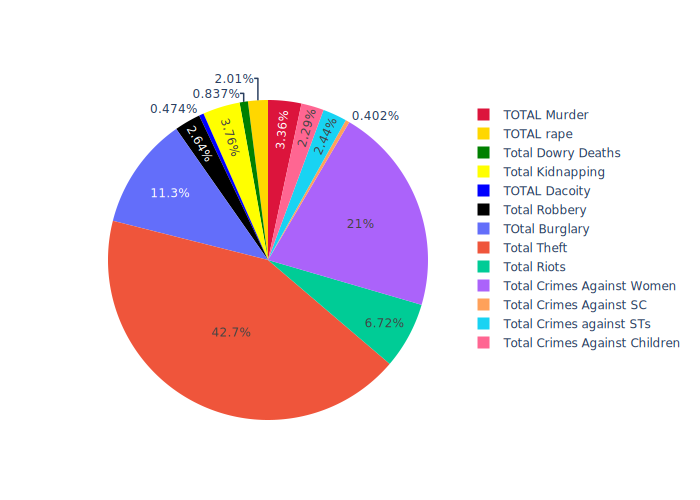

In [65]:
fig = go.Figure(data=[go.Pie(labels=crime_group, values=values,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])
fig.show(renderer='svg')

In [ ]:
# from the above pie chart showing the complete distribution of criminal offence in percentages

In [54]:
sensitivearea['STATE/UT'].value_counts()

STATE/UT
ANDHRA PRADESH    208
UTTAR PRADESH     166
MAHARASHTRA       131
BIHAR             124
WEST BENGAL       106
RAJASTHAN          94
MADHYA PRADESH     90
DELHI UT           75
KERALA             56
TAMIL NADU         51
ASSAM              39
CHHATTISGARH       31
GUJARAT            26
KARNATAKA          24
HARYANA            20
JHARKHAND          16
ODISHA             12
PUNJAB              4
Name: count, dtype: int64

# Cause of the states' greater crime rates:

In [67]:
sensitivearea['DISTRICT'].value_counts()

DISTRICT
JABALPUR        12
THANE RURAL     12
GWALIOR         12
INDORE          12
KANPUR NAGAR    12
                ..
CP LUDHIANA      1
HARDOI           1
BHOJPUR          1
JAMSHEDPUR       1
HOWRAH CITY      1
Name: count, Length: 198, dtype: int64

In [ ]:
In Sensitive Area the most frequent district occurs in terms of crime rates are JABALPUR,THNAE RURAL,GWALIOR,INDORE AND KANPUR NAGAR 

In [55]:
sensitivearea_dis=sensitivearea.groupby('DISTRICT')

In [56]:
sensitivearea_dis.first()

STATE/UT    YEAR  MURDER  ATTEMPT TO MURDER  \
DISTRICT                                                               
24 PARGANAS NORTH     WEST BENGAL  2001.0   202.0               23.0   
24 PARGANAS SOUTH     WEST BENGAL  2001.0   107.0                5.0   
ADILABAD           ANDHRA PRADESH  2005.0   108.0               48.0   
AGRA                UTTAR PRADESH  2001.0   153.0              162.0   
AHMEDABAD COMMR.          GUJARAT  2001.0    90.0               58.0   
...                           ...     ...     ...                ...   
VISAKHAPATNAM      ANDHRA PRADESH  2009.0    28.0               25.0   
WARANGAL           ANDHRA PRADESH  2001.0   158.0               79.0   
WEST                     DELHI UT  2001.0    70.0               51.0   
WEST GODAVARI      ANDHRA PRADESH  2001.0    77.0               58.0   
YAVATMAL              MAHARASHTRA  2005.0    72.0               73.0   

                   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  \
DISTRICT                                                             
24 PARGANAS NORTH                                       61.0  53.0   
24 PARGANAS SOUTH                                       75.0  47.0   
ADILABAD                                                13.0  53.0   
AGRA                                                    18.0  66.0   
AHMEDABAD COMMR.                                        60.0  39.0   
...                                                      ...   ...   
VISAKHAPATNAM                                            4.0  39.0   
WARANGAL                                                 5.0  53.0   
WEST                                                    12.0  45.0   
WEST GODAVARI                                            1.0  61.0   
YAVATMAL                                                 9.0  59.0   

                   CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
DISTRICT                                                                
24 PARGANAS NORTH             0.0        53.0                    81.0   
24 PARGANAS SOUTH             0.0        47.0                    53.0   
ADILABAD                      0.0        53.0                    65.0   
AGRA                          0.0        66.0                   203.0   
AHMEDABAD COMMR.              0.0        39.0                   143.0   
...                           ...         ...                     ...   
VISAKHAPATNAM                 0.0        39.0                    48.0   
WARANGAL                      0.0        53.0                    81.0   
WEST                          0.0        45.0                   151.0   
WEST GODAVARI                 0.0        61.0                    41.0   
YAVATMAL                      0.0        59.0                    43.0   

                   KIDNAPPING AND ABDUCTION OF OTHERS  ...  \
DISTRICT                                               ...   
24 PARGANAS NORTH                                18.0  ...   
24 PARGANAS SOUTH                                 1.0  ...   
ADILABAD                                         19.0  ...   
AGRA                                             71.0  ...   
AHMEDABAD COMMR.                                 26.0  ...   
...                                               ...  ...   
VISAKHAPATNAM                                    22.0  ...   
WARANGAL                                         56.0  ...   
WEST                                             52.0  ...   
WEST GODAVARI                                    20.0  ...   
YAVATMAL                                          3.0  ...   

                   HURT/GREVIOUS HURT  DOWRY DEATHS  \
DISTRICT                                              
24 PARGANAS NORTH                 0.0          23.0   
24 PARGANAS SOUTH                 0.0          48.0   
ADILABAD                       1273.0          21.0   
AGRA                            518.0          63.0   
AHMEDABAD COMMR.               1311.0           7.0   
...                               .

In [70]:
sensitivearea.describe().T


count         mean          std  \
YEAR                                       1273.0  2007.020424     3.494995   
MURDER                                     1273.0   107.787903    59.088482   
ATTEMPT TO MURDER                          1273.0   101.583661    86.080167   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  1273.0    12.955224    17.759718   
RAPE                                       1273.0    64.560880    48.439821   
CUSTODIAL RAPE                             1273.0     0.011783     0.183483   
OTHER RAPE                                 1273.0    64.549097    48.431687   
KIDNAPPING & ABDUCTION                     1273.0   120.768264    97.154899   
KIDNAPPING AND ABDUCTION OF OTHERS         1273.0    34.893166    43.493235   
DACOITY                                    1273.0    15.224666    18.032024   
PREPARATION AND ASSEMBLY FOR DACOITY       1273.0    12.559309    34.782249   
ROBBERY                                    1273.0    84.790259   106.202648   
BURGLARY                                   1273.0   364.080126   389.299057   
THEFT                                      1273.0  1371.136685  1619.120181   
AUTO THEFT                                 1273.0   586.021210   793.236242   
OTHER THEFT                                1273.0   785.115475   969.902264   
RIOTS                                      1273.0   215.900236   238.711538   
CRIMINAL BREACH OF TRUST                   1273.0    63.904949    73.433213   
CHEATING                                   1273.0   296.036135   377.284126   
COUNTERFIETING                             1273.0     9.458759    16.781712   
ARSON                                      1273.0    27.803614    69.658844   
HURT/GREVIOUS HURT                         1273.0  1050.248233   954.723294   
DOWRY DEATHS                               1273.0    26.863315    21.372009   
CAUSING DEATH BY NEGLIGENCE                1273.0   299.426551   237.921690   
OTHER IPC CRIMES                           1273.0  2819.386489  2462.009349   
TOTAL IPC CRIMES                           1273.0  7562.795758  4733.654394   
Total Crime Against Women                  1273.0   675.619796   479.634839   
Total Crime Against Chilren                1273.0    73.492537   274.542152   
Total Crimes Against SCs                   1273.0    78.203456    91.344613   
Total Crimes Against STs                   1273.0    12.894737    24.017386   
cluster                                    1273.0     3.000000     0.000000   

                                              min     25%     50%     75%  \
YEAR                                       2001.0  2004.0  2007.0  2010.0   
MURDER                                        4.0    69.0    96.0   133.0   
ATTEMPT TO MURDER                             0.0    49.0    79.0   129.0   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER     0.0     2.0     6.0    17.0   
RAPE                                          5.0    36.0    52.0    75.0   
CUSTODIAL RAPE                                0.0     0.0     0.0     0.0   
OTHER RAPE                                    5.0    36.0    52.0    75.0   
KIDNAPPING & ABDUCTION                        1.0    55.0    93.0   152.0   
KIDNAPPING AND ABDUCTION OF OTHERS            0.0    11.0    22.0    41.0   
DACOITY                                       0.0     4.0     9.0    20.0   
PREPARATION AND ASSEMBLY FOR DACOITY          0.0     0.0     2.0    10.0   
ROBBERY                                       3.0    33.0    56.0    91.0   
BURGLARY                                      2.0   147.0   256.0   422.0   
THEFT                                       165.0   516.0   841.0  1564.0   
AUTO THEFT                                    2.0   133.0   263.0   718.0   
OTHER THEFT                                 111.0   337.0   519.0   840.0   
RIOTS                                         0.0    76.0   153.0   286.0   
CRIMINAL BREACH OF TRUST                      0.0    23.0    41.0    76.0   
CHEATING                                      4.0   

# Bar Plotting State versus Total IPC Crime

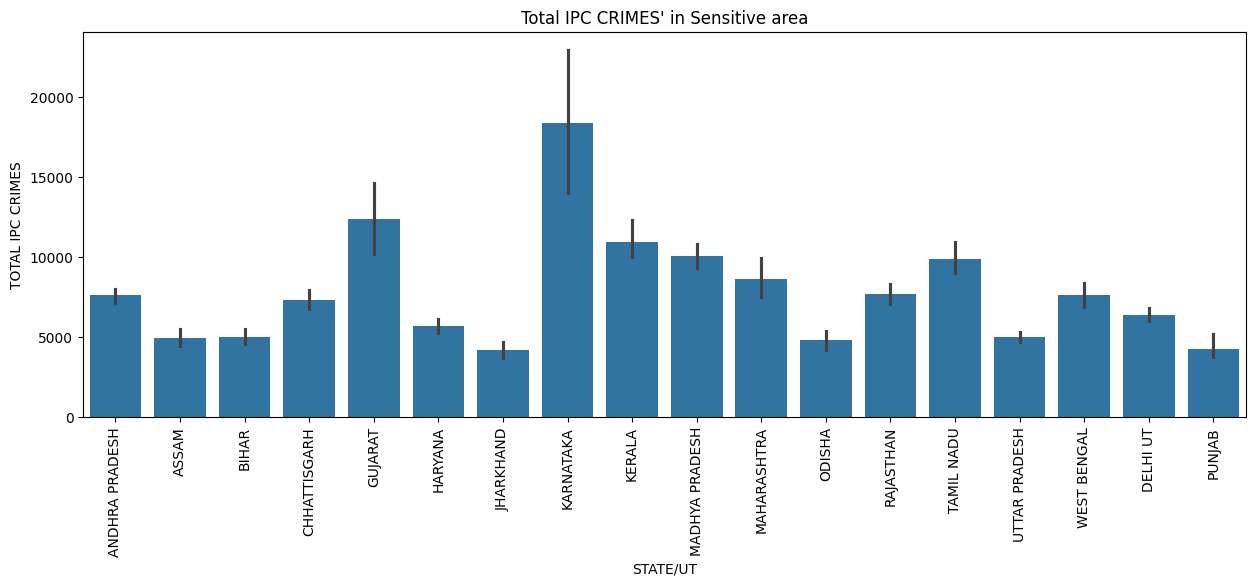

In [71]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=sensitivearea)
plt.xticks(rotation=90)
plt.title("Total IPC CRIMES' in Sensitive area")
plt.show()

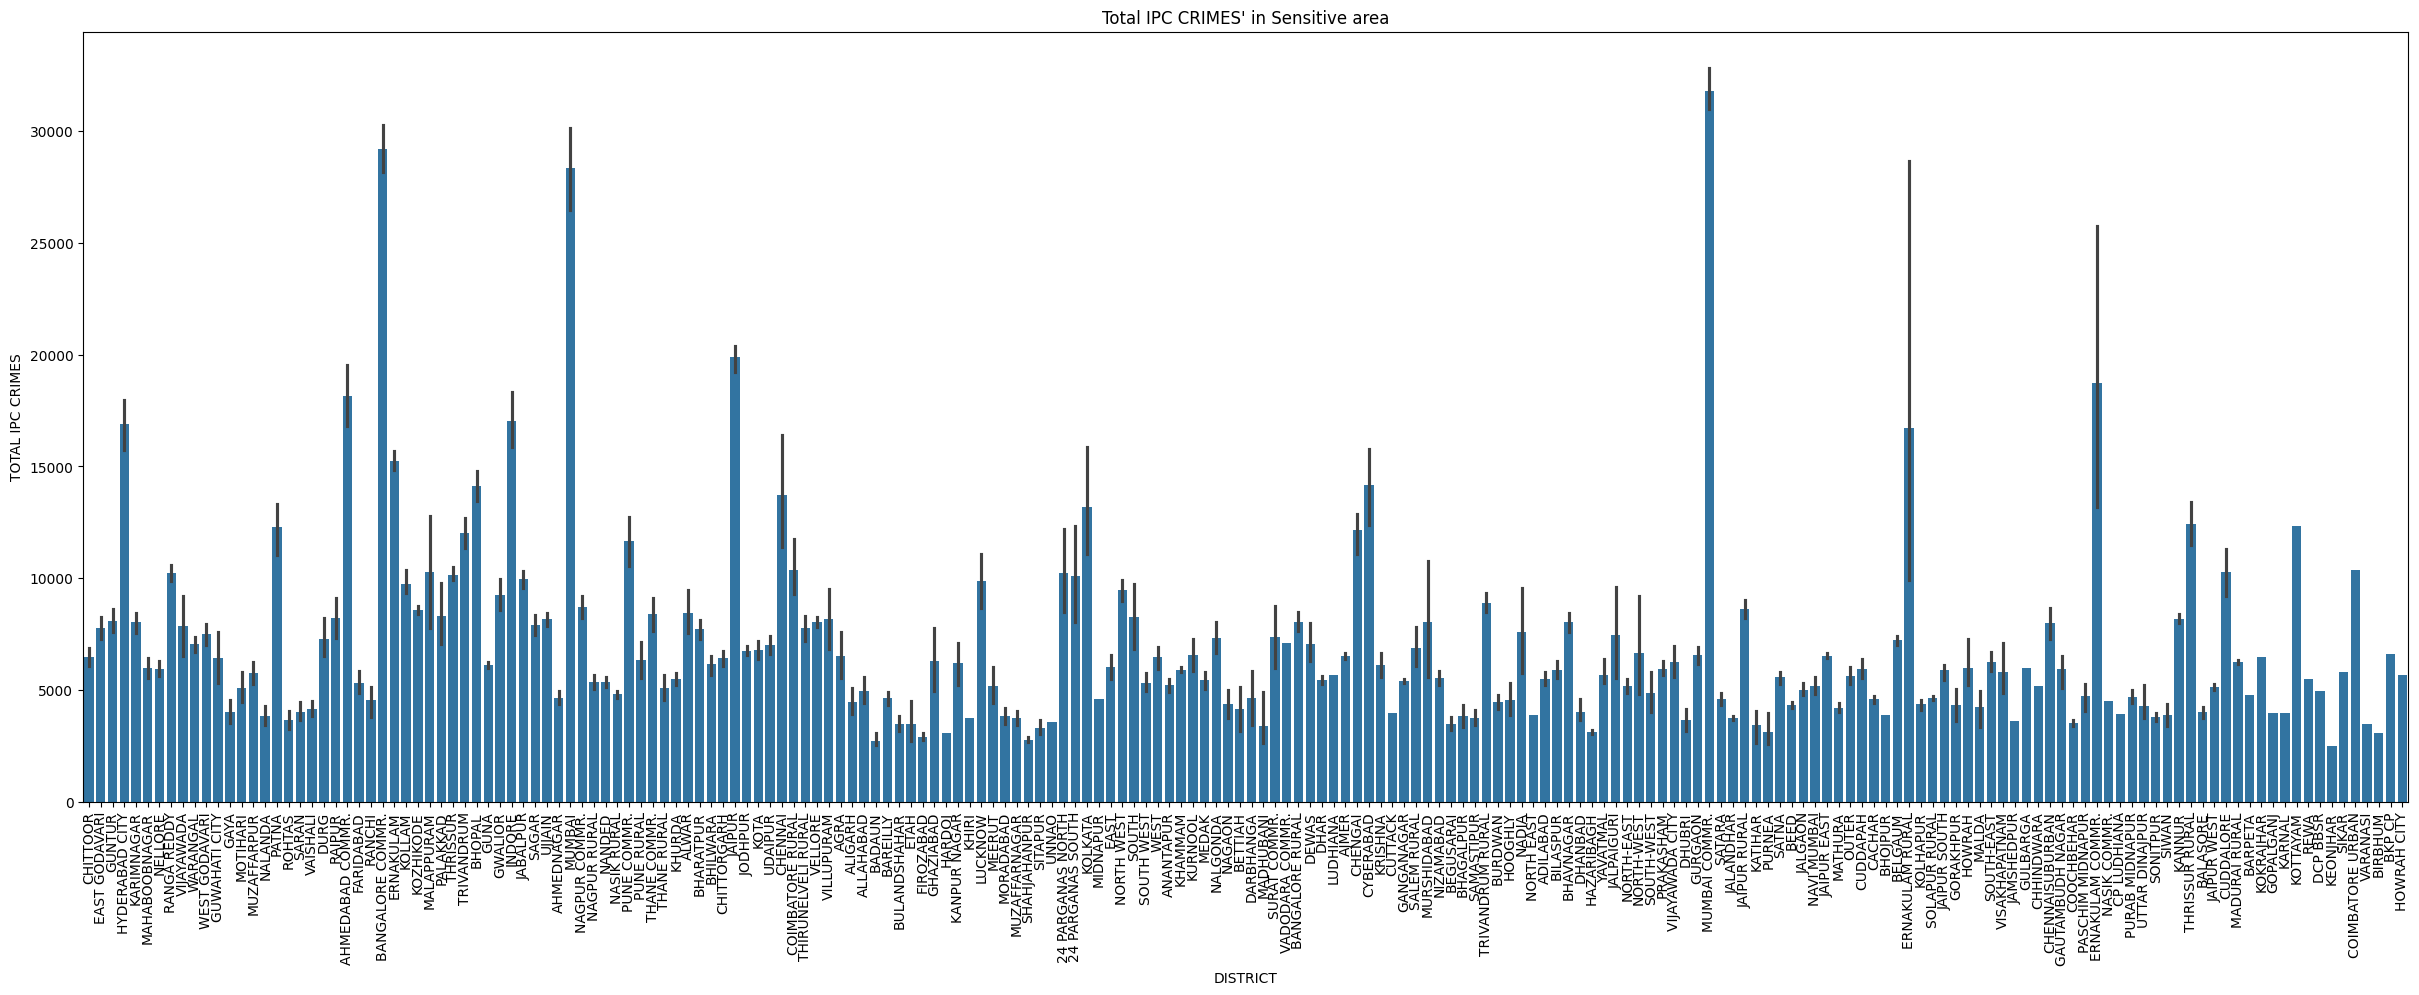

In [73]:
plt.figure(figsize=(30, 10))
sns.barplot(x='DISTRICT', y='TOTAL IPC CRIMES',data=sensitivearea)
plt.xticks(rotation=90)
plt.title("Total IPC CRIMES' in Sensitive area")
plt.savefig('IPC CRIMES in Sensitive area.jpg')
plt.show()

# Comparison Between Districts against Total Crimes against Women

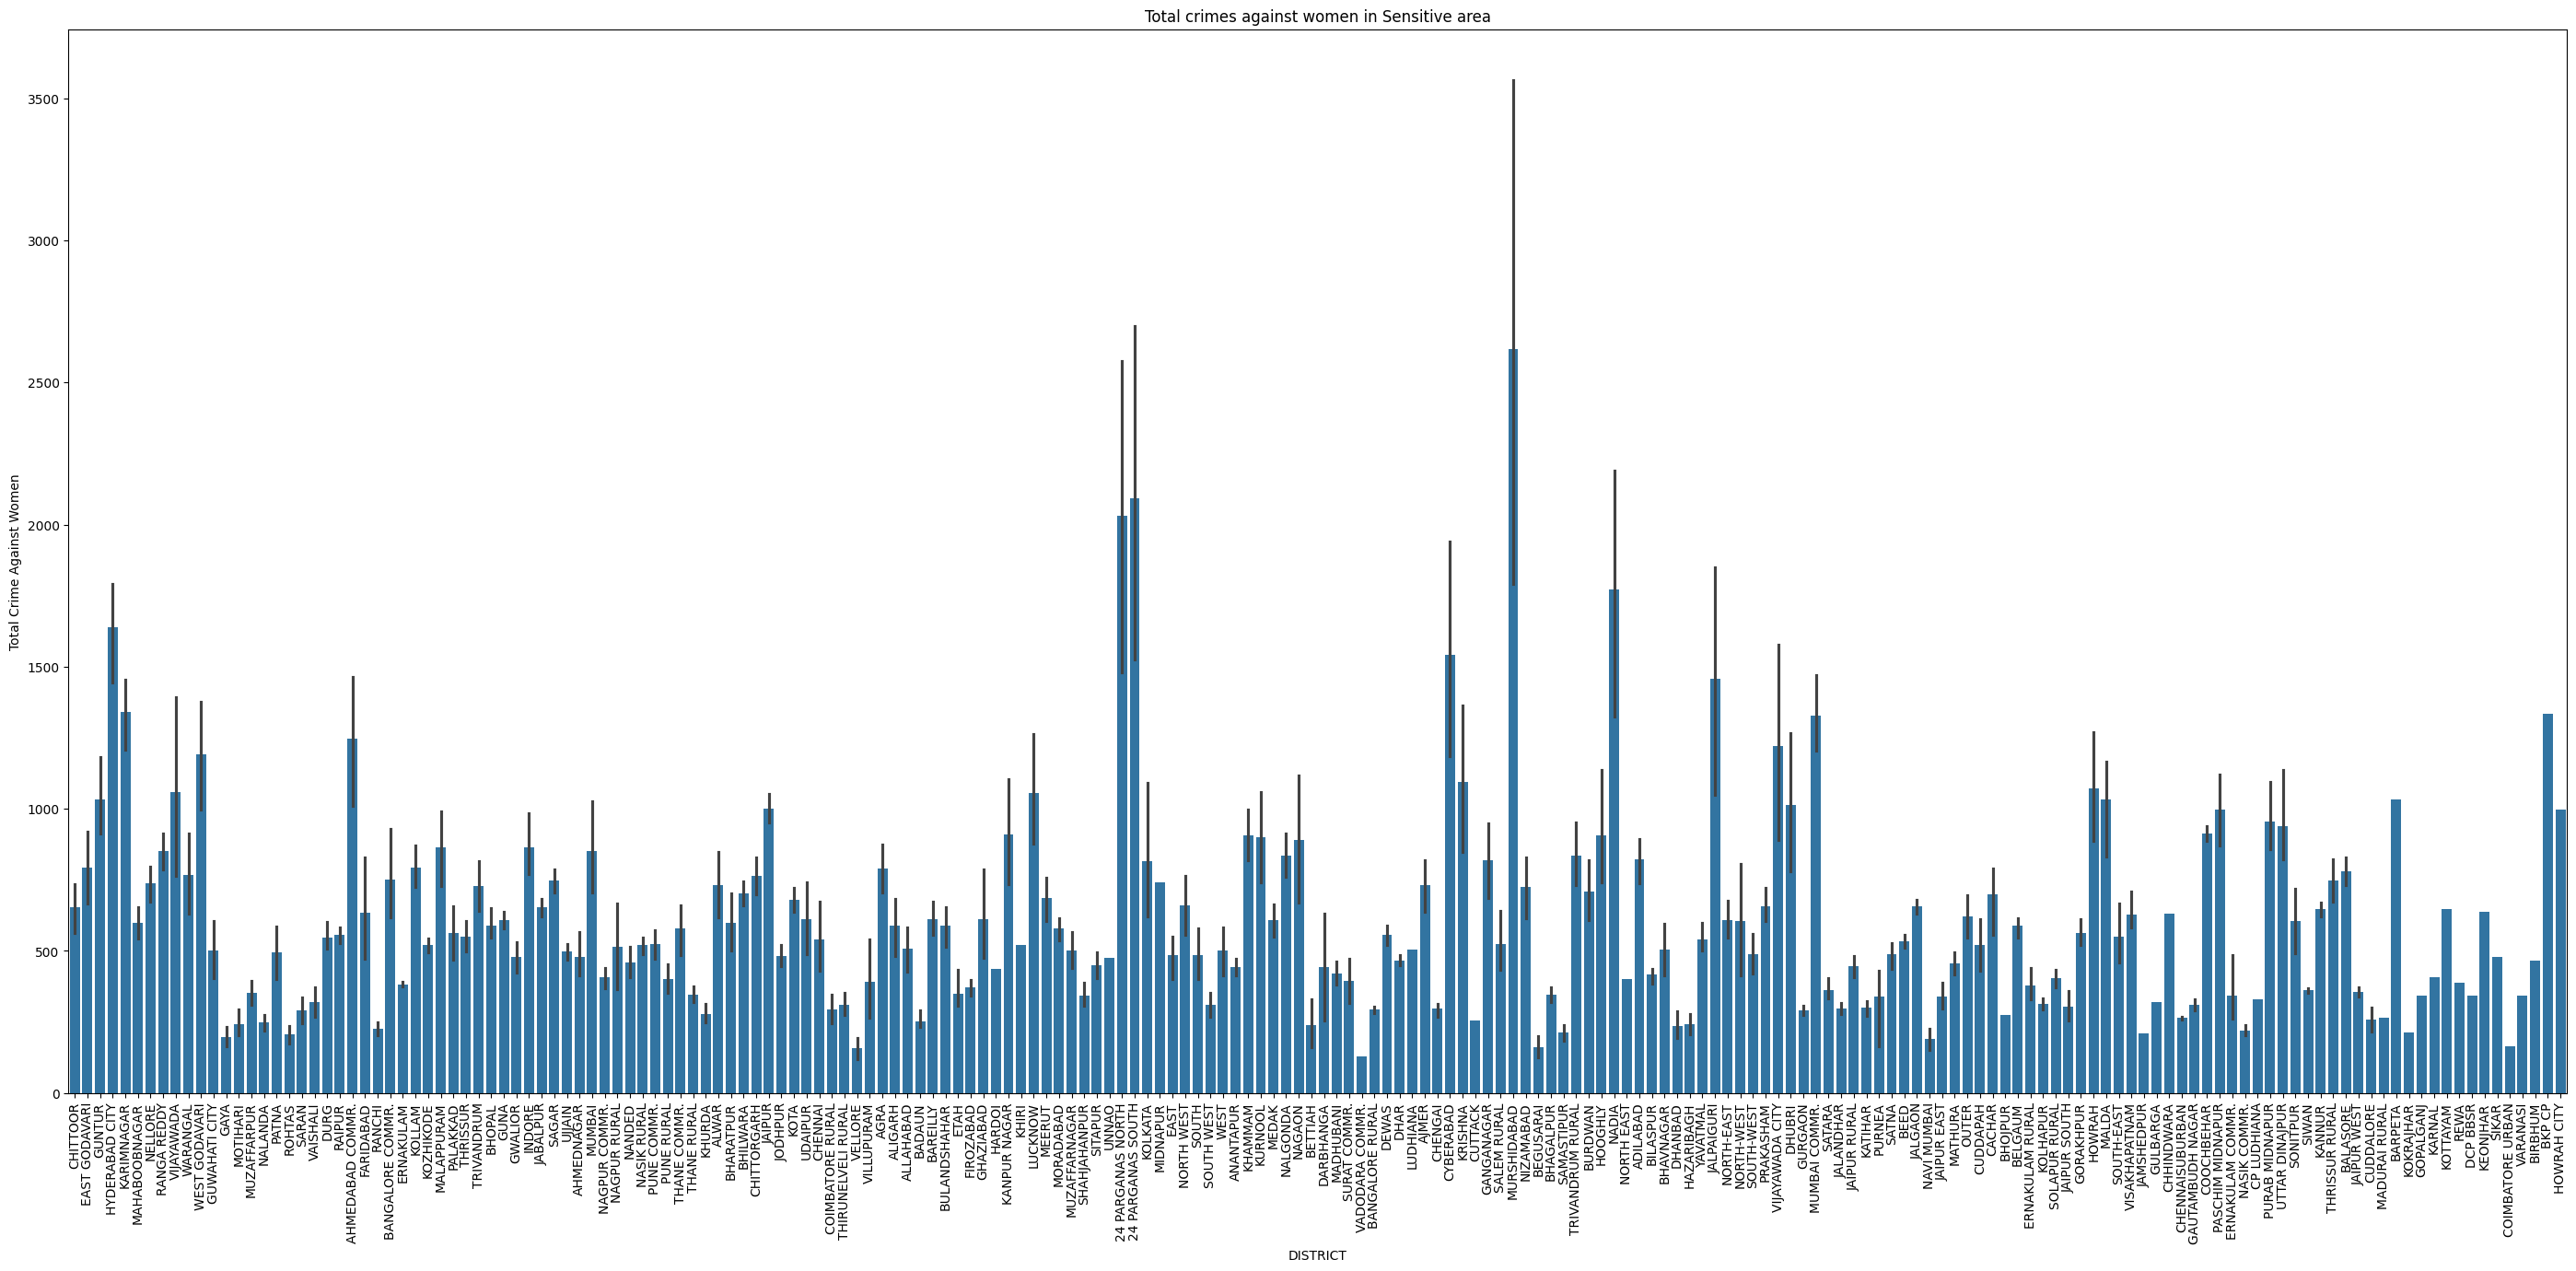

In [74]:
plt.figure(figsize=(35, 15))
sns.barplot(x='DISTRICT', y='Total Crime Against Women',data=sensitivearea)
plt.xticks(rotation=90)
plt.title("Total crimes against women in Sensitive area")

plt.savefig('Total crimes against women in Sensitive area.jpg')
plt.show()

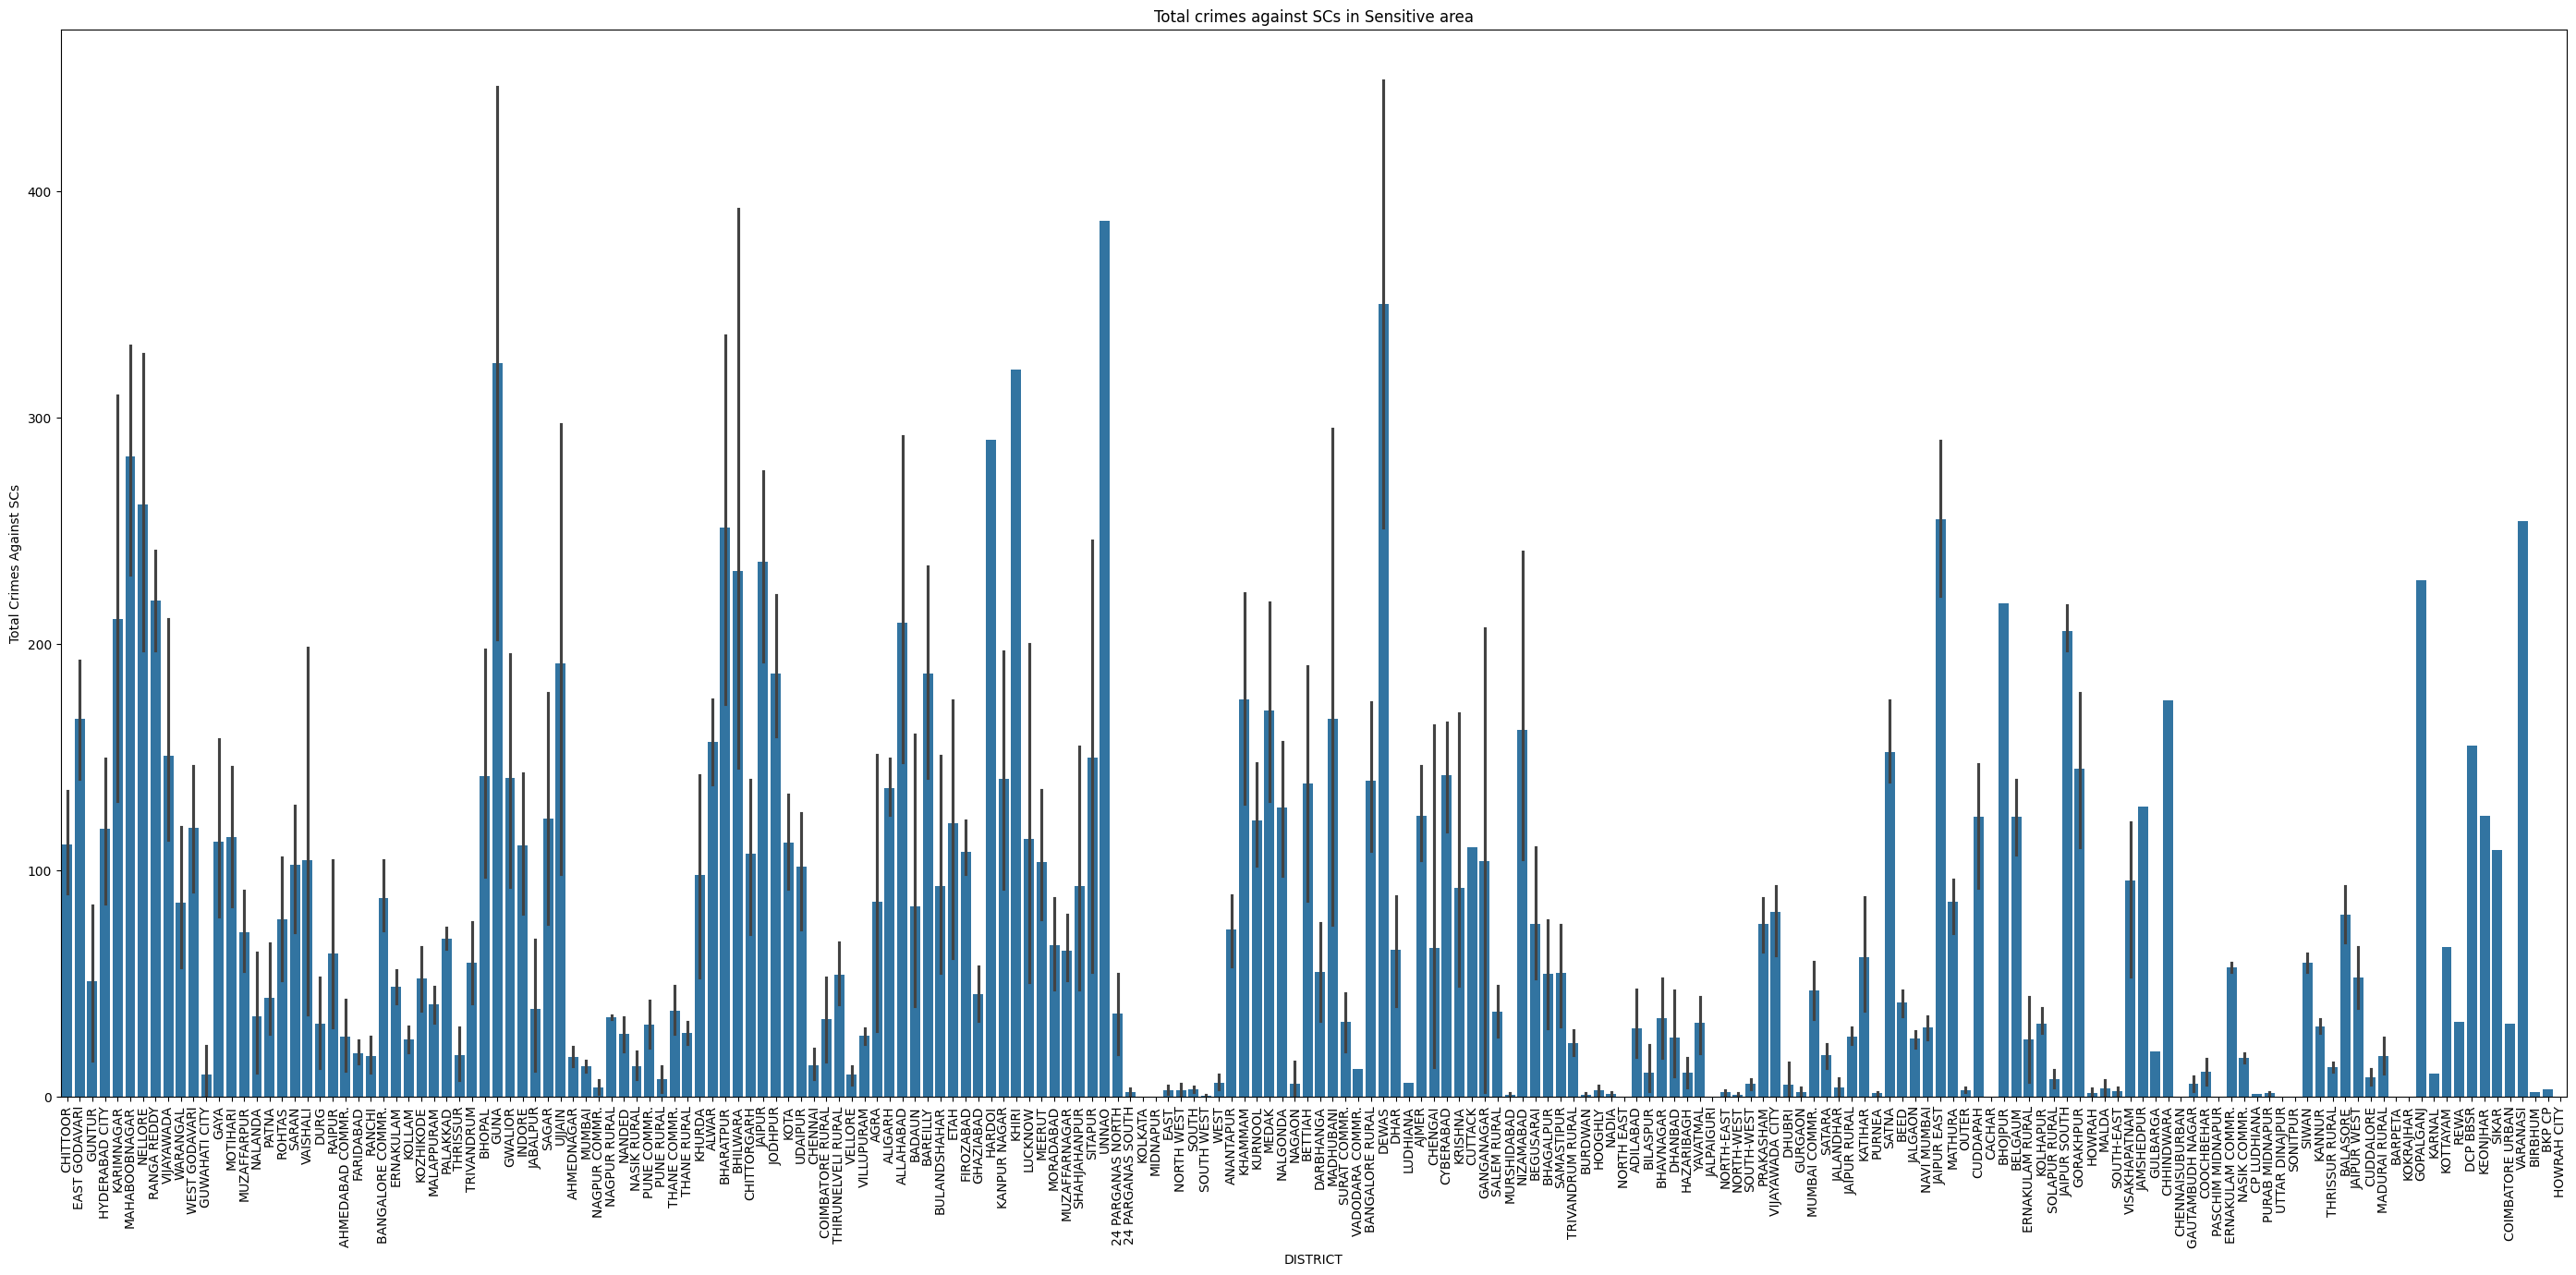

In [75]:
plt.figure(figsize=(35, 15))
sns.barplot(x='DISTRICT', y='Total Crimes Against SCs',data=sensitivearea)
plt.xticks(rotation=90)
plt.title("Total crimes against SCs in Sensitive area")
plt.savefig('Total crimes against SCs in Sensitive area')
plt.show()

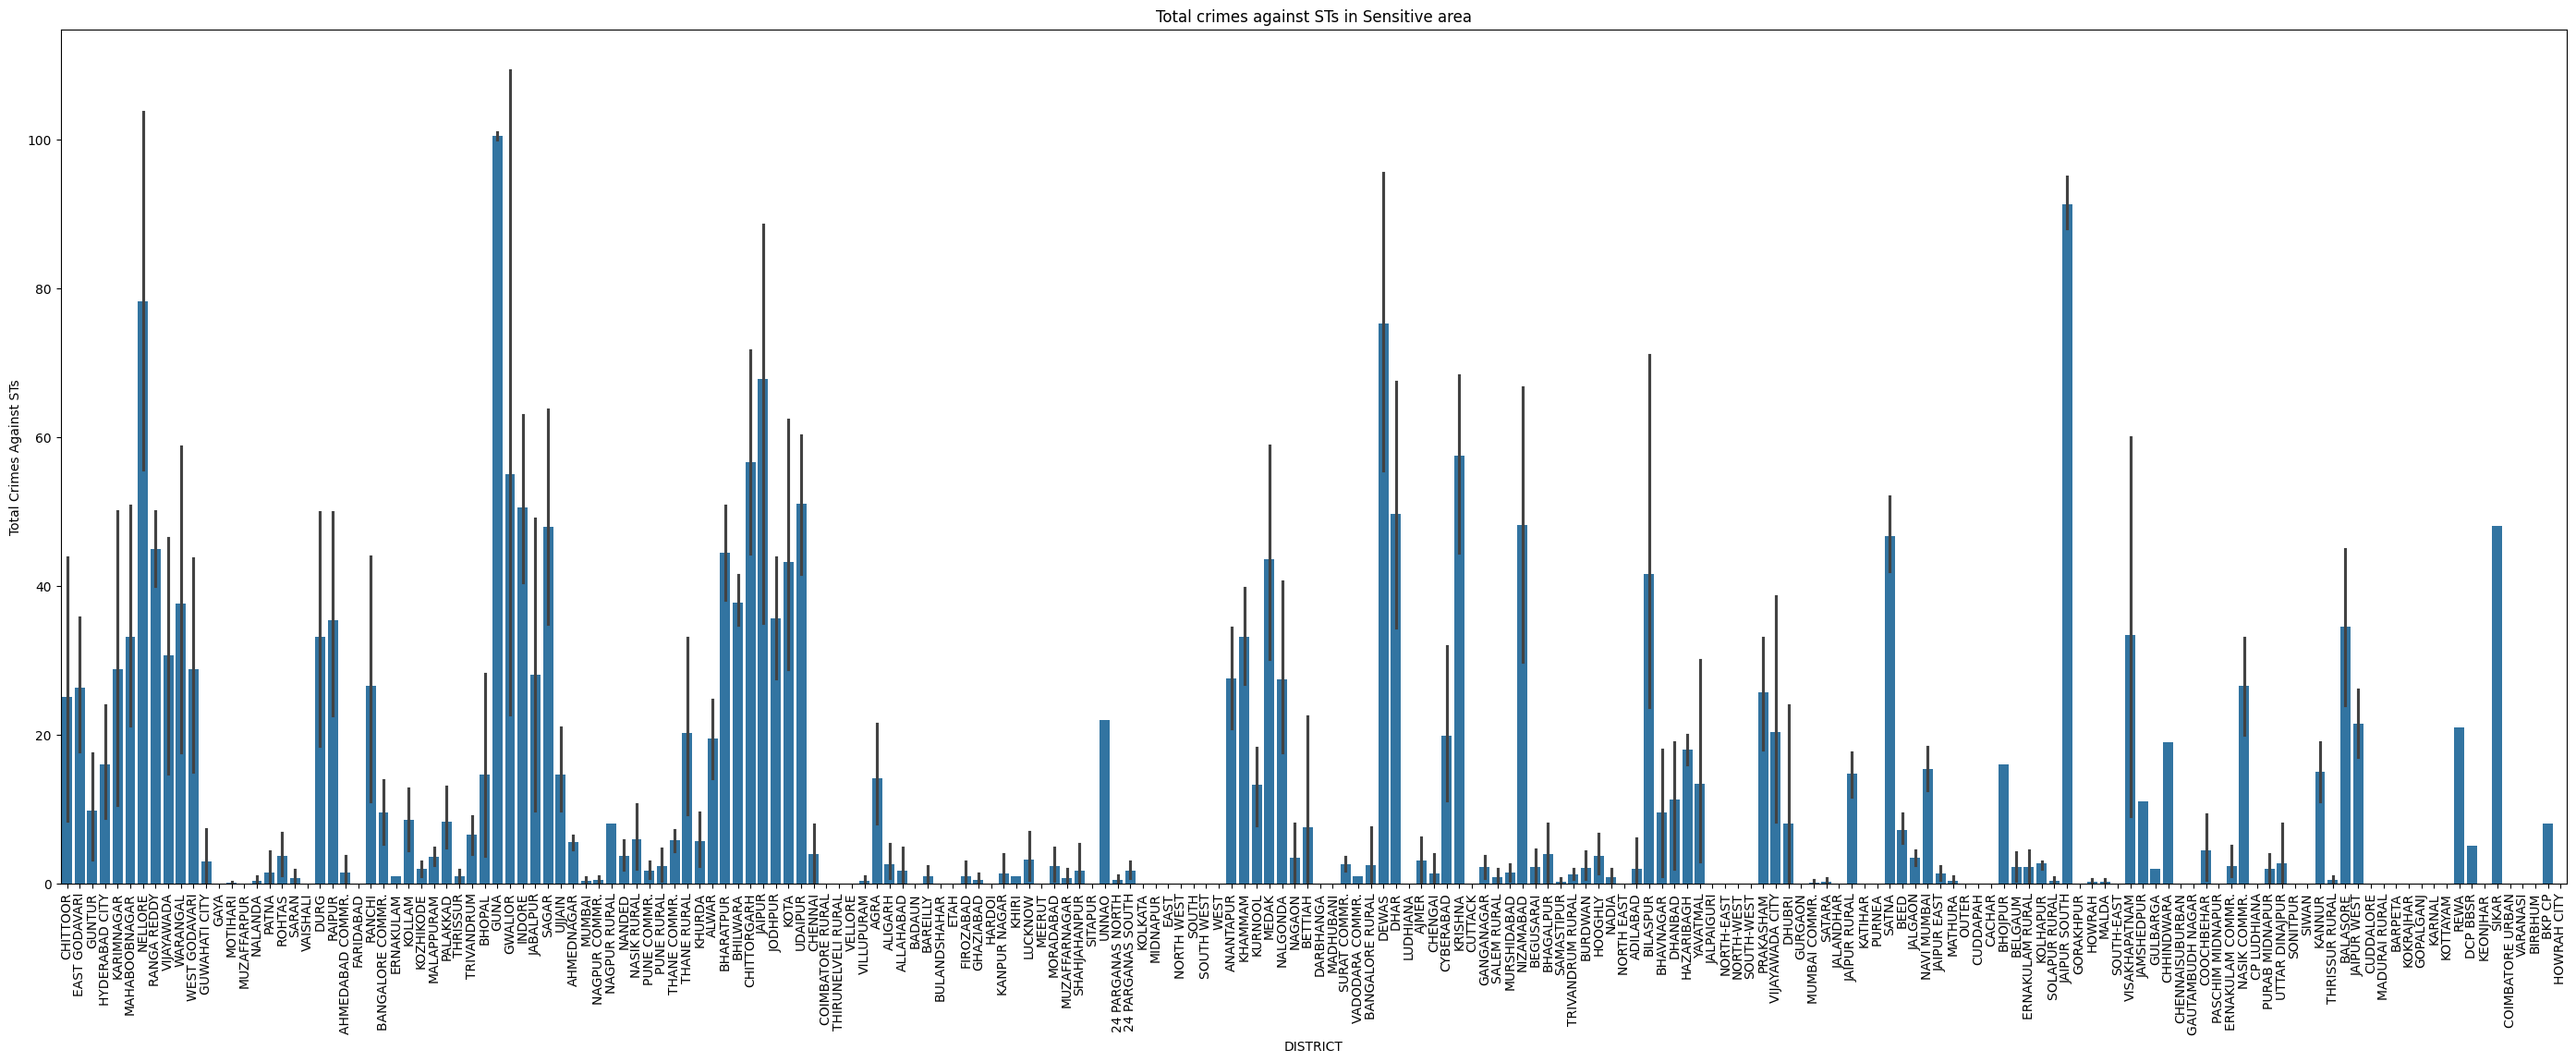

In [60]:
plt.figure(figsize=(35, 12))
sns.barplot(x='DISTRICT', y='Total Crimes Against STs',data=sensitivearea)
plt.xticks(rotation=90)
plt.title("Total crimes against STs in Sensitive area")
plt.savefig('Total crimes against STs in Sensitive area')
plt.show()

In [ ]:
Crimes against STs are more common in the districts of Jaipur,GUNA,Dewas  of Madhya Pradesh; and Nellore.

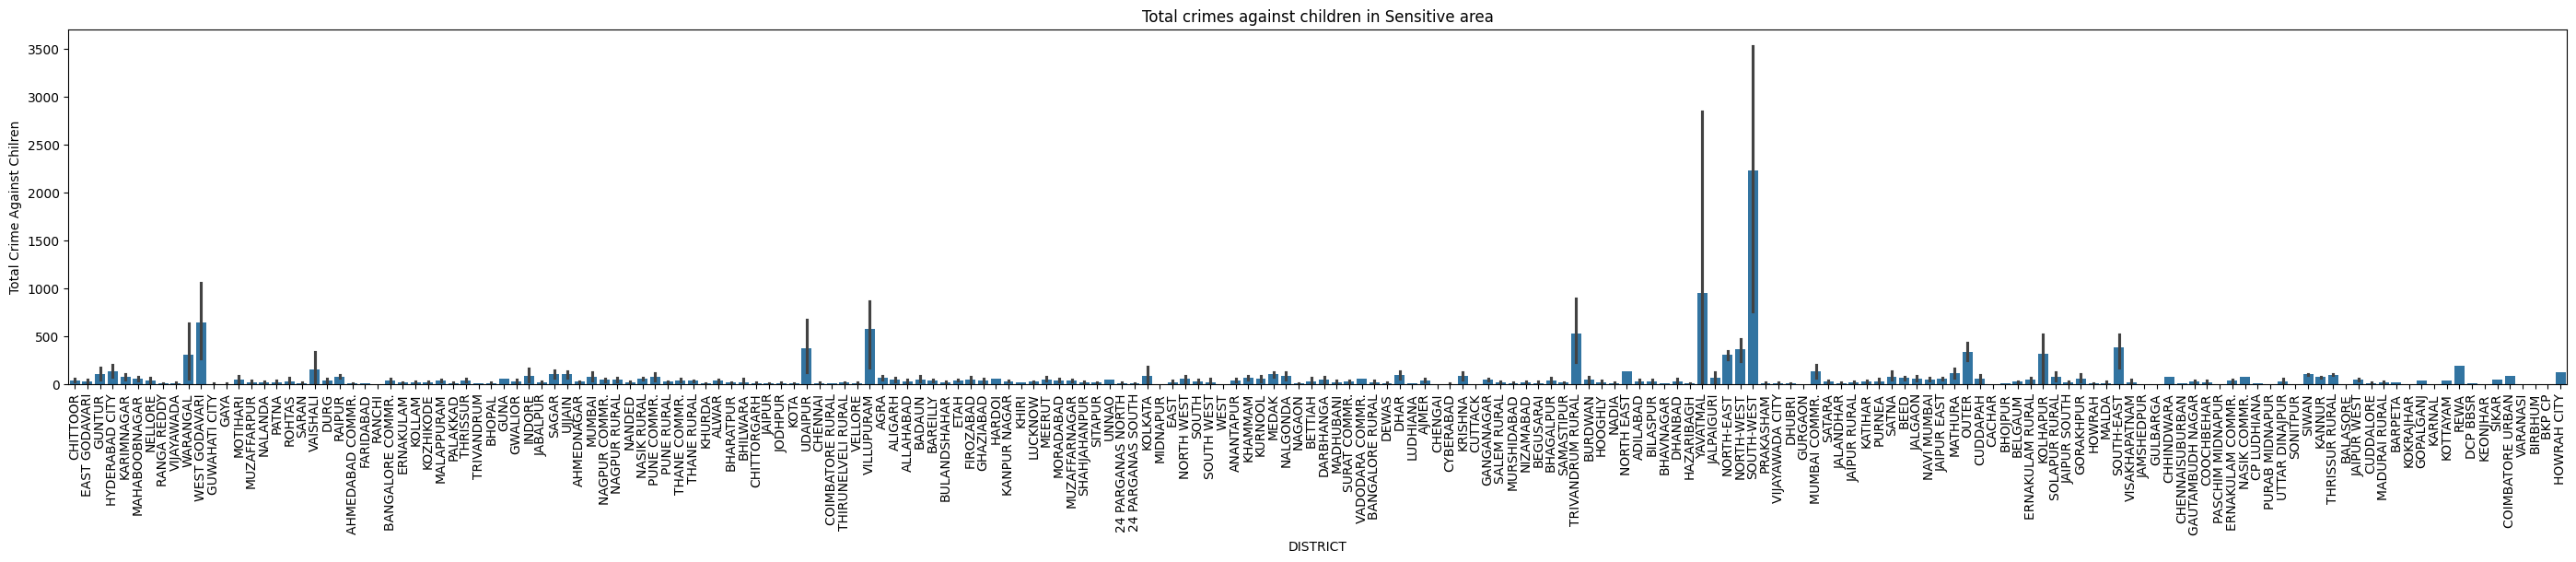

In [62]:
plt.figure(figsize=(35, 5))
sns.barplot(x='DISTRICT', y='Total Crime Against Chilren',data=sensitivearea)
plt.xticks(rotation=90)
plt.title("Total crimes against children in Sensitive area")
plt.savefig('Total crimes against children in Sensitive area')

plt.show()

In [ ]:
Crimes against children are most in the South-West , YAVATMAL .

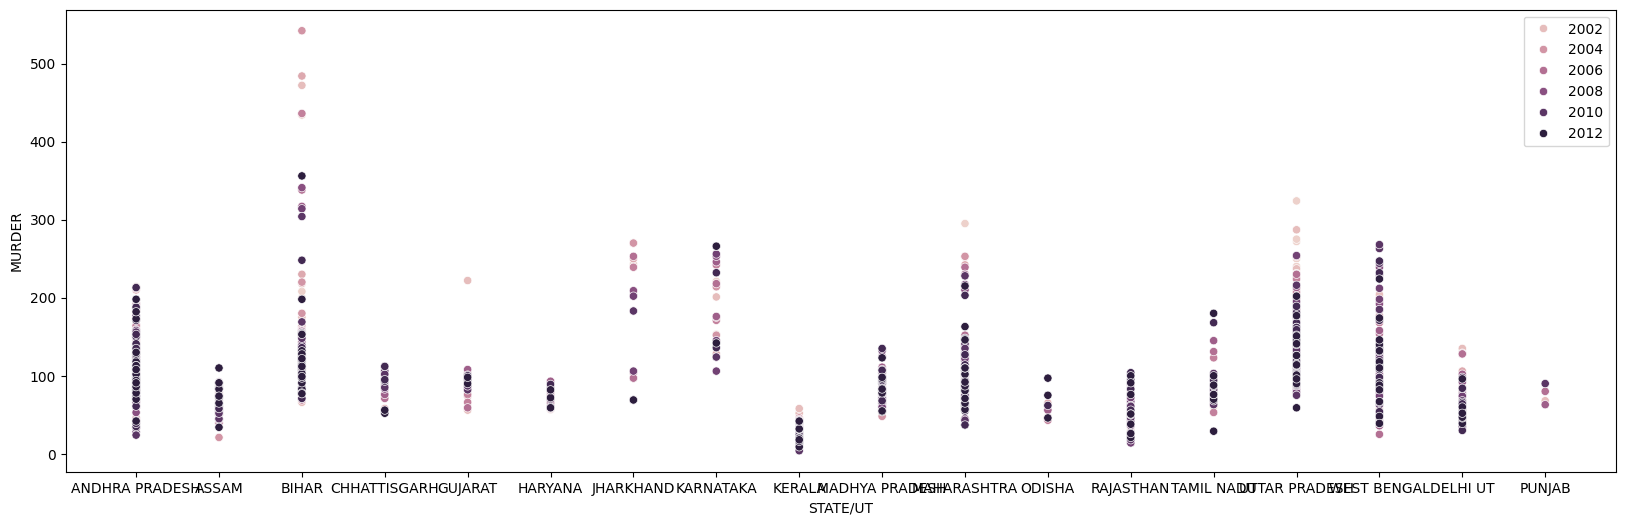

In [64]:
plt.figure(figsize=(20,6))
sns.scatterplot(x = "STATE/UT", y = "MURDER", data = sensitivearea,hue='YEAR')
plt.legend()
#plt.tight_layout()
plt.show()

In [ ]:
In 2004, Bihar recorded the highest number of murder cases.

In [67]:
sensitivearea['DISTRICT']

2             CHITTOOR
4        EAST GODAVARI
6               GUNTUR
7       HYDERABAD CITY
8           KARIMNAGAR
             ...      
9006             OUTER
9007             SOUTH
9008        SOUTH-EAST
9009        SOUTH-WEST
9011              WEST
Name: DISTRICT, Length: 1273, dtype: object

In [69]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
sensitivearea['DISTRICT']=le.fit_transform(sensitivearea['DISTRICT'])

In [74]:
sensitivearea['STATE/UT']=le.fit_transform(sensitivearea['STATE/UT'])

In [75]:
sensitivearea

STATE/UT  DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
2            0        37  2001.0   101.0               57.0   
4            0        55  2001.0    82.0               67.0   
6            0        70  2001.0   182.0               88.0   
7            0        79  2001.0   111.0              113.0   
8            0        94  2001.0   162.0               85.0   
...        ...       ...     ...     ...                ...   
9006         4       144  2012.0    96.0               60.0   
9007         4       170  2012.0    39.0               19.0   
9008         4       172  2012.0    46.0               69.0   
9009         4       173  2012.0    47.0               48.0   
9011         4       195  2012.0    52.0               37.0   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   RAPE  CUSTODIAL RAPE  \
2                                           2.0   27.0             0.0   
4                                           1.0   23.0             0.0   
6                                           2.0   54.0             0.0   
7                                           7.0   37.0             0.0   
8                                           6.0   56.0             0.0   
...                                         ...    ...             ...   
9006                                       15.0   67.0             0.0   
9007                                        3.0   70.0             0.0   
9008                                        6.0  116.0             0.0   
9009                                        6.0   87.0             0.0   
9011                                       10.0   79.0             0.0   

      OTHER RAPE  KIDNAPPING & ABDUCTION  ...  HURT/GREVIOUS HURT  \
2           27.0                    59.0  ...              2088.0   
4           23.0                    49.0  ...              1244.0   
6           54.0                    82.0  ...              1792.0   
7           37.0                    80.0  ...              3137.0   
8           56.0                    67.0  ...              1392.0   
...          ...                     ...  ...                 ...   
9006        67.0                   572.0  ...               224.0   
9007        70.0                   245.0  ...               101.0   
9008       116.0                   538.0  ...               252.0   
9009        87.0                   399.0  ...               131.0   
9011        79.0                   454.0  ...               227.0   

      DOWRY DEATHS  CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  \
2             14.0                        404.0            1262.0   
4             12.0                        431.0            2313.0   
6              7.0                        369.0            2426.0   
7             24.0                        409.0            1512.0   
8             62.0                        322.0            1726.0   
...            ...                          ...               ...   
9006          15.0                         90.0            2006.0   
9007          17.0                         25.0            1651.0   
9008          11.0                        218.0            2004.0   
9009          18.0                          4.0            1387.0   
9011          18.0                        292.0            1144.0   

      TOTAL IPC CRIMES  Total Crime Against Women  \
2               5818.0                      456.0   
4               6507.0                      475.0   
6               7848.0                      758.0   
7              11831.0                      991.0   
8               5811.0                      886.0   
...                ...                        ...   
9006            6344.0                      740.0   
9007            5045.0                      384.0   
9008            7040.0                      759.0   
9009            4085.0                      646.0   
9011            5558.0                      739.0   

      Total Crime Against Chilren  Total Crimes Against SCs  \
2 

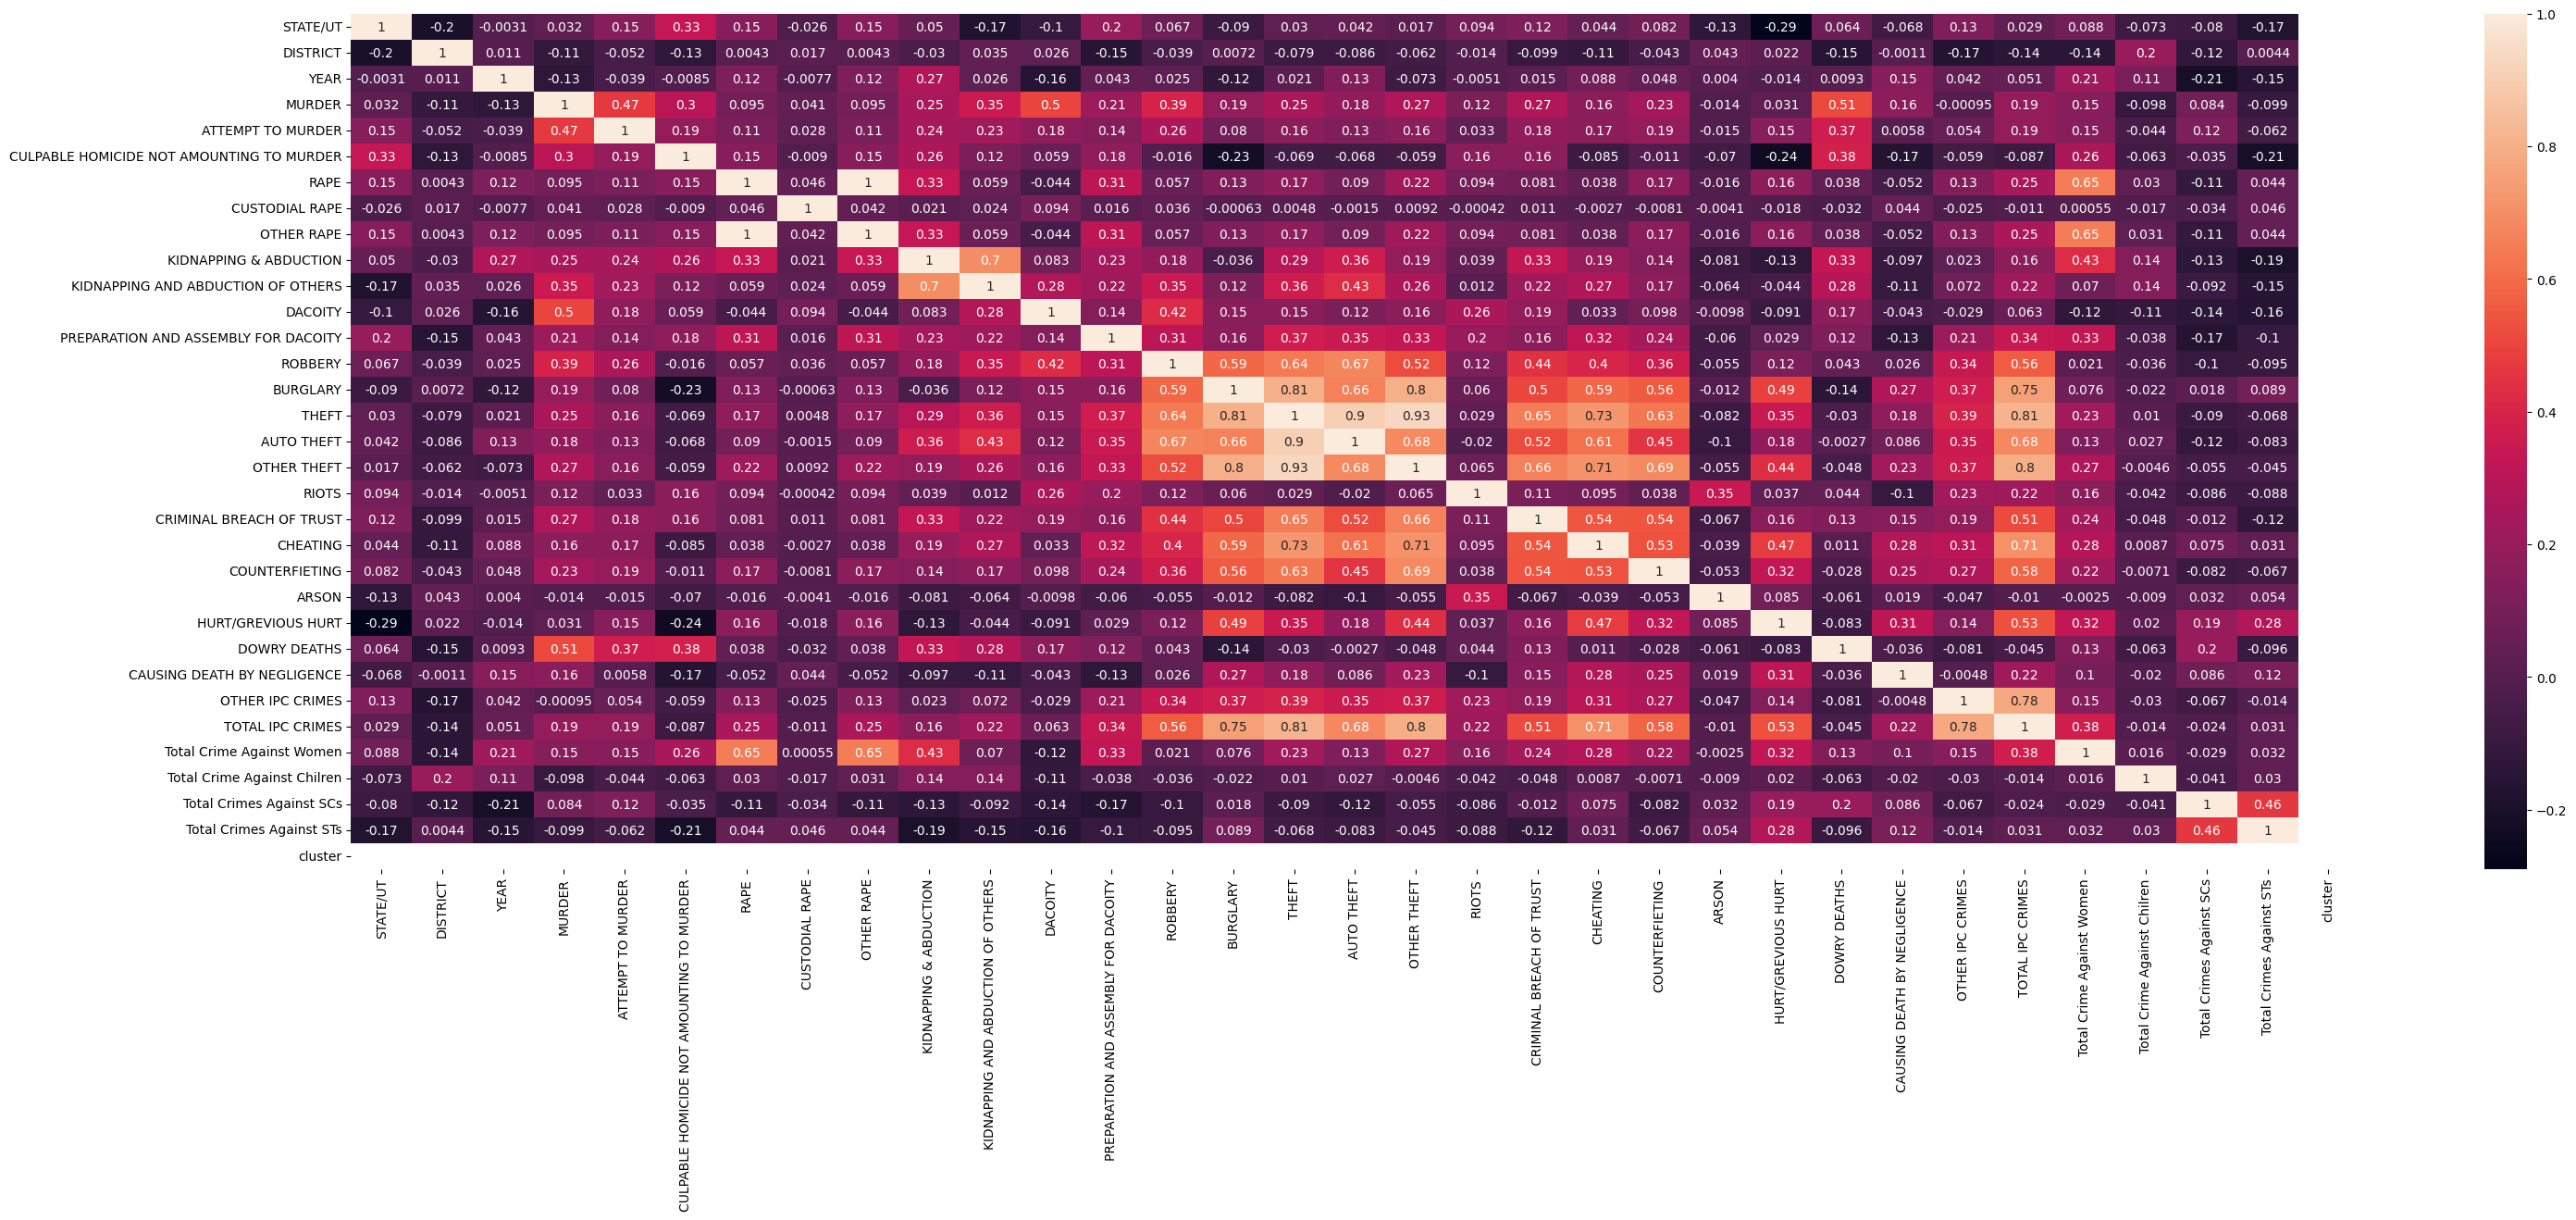

In [77]:
plt.figure(figsize=(35,12))
sns.heatmap(sensitivearea.corr(),annot=True)
plt.savefig('heatmap2.jpg')
plt.show()

#                            Analysing the Moderate Region

In [86]:
pd.pivot_table(moderatearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Total Crime Against Women', 'Total Crime Against Chilren',
       'Total Crimes Against SCs', 'Total Crimes Against STs'], index =['STATE/UT','DISTRICT', 'YEAR'],
                          aggfunc = max)

ARSON  ATTEMPT TO MURDER  AUTO THEFT  \
STATE/UT          DISTRICT       YEAR                                           
ARUNACHAL PRADESH ANJAW          2009.0    0.0                0.0         0.0   
                                 2010.0    0.0                0.0         0.0   
                                 2011.0    0.0                1.0         0.0   
                                 2012.0    0.0                0.0         0.0   
                  CHANGLANG      2006.0    1.0                3.0         0.0   
                                 2007.0    1.0                4.0         0.0   
                                 2008.0    3.0                4.0         0.0   
CHHATTISGARH      BALOD          2012.0    4.0                2.0        25.0   
                  BALRAMPUR      2008.0    6.0               12.0         1.0   
                                 2009.0    6.0               18.0         0.0   
                                 2010.0    5.0               20.0         0.0   
                                 2011.0    5.0               27.0         0.0   
KERALA            ALAPUZHA       2008.0   14.0               37.0       112.0   
                                 2009.0   13.0               33.0       107.0   
                                 2010.0   18.0               27.0       116.0   
                                 2011.0   12.0               17.0        42.0   
                                 2012.0   20.0               18.0        80.0   
MAHARASHTRA       AHMEDNAGAR     2006.0   46.0               49.0       334.0   
                                 2007.0   54.0               73.0       425.0   
                                 2008.0   49.0              107.0       506.0   
                                 2009.0   34.0               75.0       539.0   
                                 2010.0   46.0               75.0       536.0   
                                 2011.0   43.0              108.0       466.0   
                                 2012.0   46.0               91.0       463.0   
PUNJAB            AMRITSAR       2005.0    0.0               28.0        55.0   
                                 2008.0    5.0               71.0       211.0   
                                 2009.0    3.0               64.0       223.0   
                                 2011.0    8.0               41.0        53.0   
                  AMRITSAR RURAL 2010.0    6.0               37.0        21.0   
                                 2012.0    3.0               61.0        40.0   
SIKKIM            EAST           2005.0    1.0               10.0         5.0   
                                 2006.0    1.0               10.0         7.0   
                                 2007.0    1.0               10.0         9.0   
                                 2008.0   12.0                5.0         5.0   
                                 2009.0    3.0                4.0         4.0   
                                 2010.0    2.0                3.0         7.0   
                                 2011.0    4.0                3.0         7.0   
                                 2012.0    7.0                4.0         7.0   
UTTARAKHAND       ALMORA         2005.0    2.0                7.0         4.0   
                                 2006.0    3.0               10.0         1.0   
                                 2007.0    4.0                9.0         2.0   
                                 2008.0    2.0                7.0         3.0   
                                 2009.0    1.0                3.0         0.0   
                                 2010.0    0.0                3.0         0.0   
                                 2011.0    3.0                0.0         0.0   
                                 2012.0    3.0                6.0         3.0   

                                         BURGLARY  \
STATE/UT          DISTRICT       YEAR               
ARUNACHAL PRADESH ANJAW          2009.0       

In [87]:
moderatearea['STATE/UT'].value_counts()


STATE/UT
SIKKIM               8
UTTARAKHAND          8
ARUNACHAL PRADESH    7
MAHARASHTRA          7
PUNJAB               6
CHHATTISGARH         5
KERALA               5
Name: count, dtype: int64

In [88]:
moderatearea['DISTRICT'].value_counts()


DISTRICT
EAST              8
ALMORA            8
AHMEDNAGAR        7
ALAPUZHA          5
AMRITSAR          4
BALRAMPUR         4
ANJAW             4
CHANGLANG         3
AMRITSAR RURAL    2
BALOD             1
Name: count, dtype: int64

In [89]:
moderatearea.describe().T


count         mean          std  \
YEAR                                        46.0  2009.065217     2.133356   
MURDER                                      46.0    31.543478    36.259991   
ATTEMPT TO MURDER                           46.0    26.021739    30.575581   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   46.0     2.304348     2.466392   
RAPE                                        46.0    22.326087    22.959921   
CUSTODIAL RAPE                              46.0     0.000000     0.000000   
OTHER RAPE                                  46.0    22.326087    22.959921   
KIDNAPPING & ABDUCTION                      46.0    16.913043    20.249363   
KIDNAPPING AND ABDUCTION OF OTHERS          46.0     4.086957     6.080300   
DACOITY                                     46.0     9.369565    18.585967   
PREPARATION AND ASSEMBLY FOR DACOITY        46.0     2.978261     5.748388   
ROBBERY                                     46.0    31.478261    55.762887   
BURGLARY                                    46.0   125.760870   176.248585   
THEFT                                       46.0   300.739130   501.517007   
AUTO THEFT                                  46.0    96.065217   168.772879   
OTHER THEFT                                 46.0   204.673913   336.744285   
RIOTS                                       46.0   133.630435   221.030150   
CRIMINAL BREACH OF TRUST                    46.0    12.260870    15.809188   
CHEATING                                    46.0    93.152174   112.203380   
COUNTERFIETING                              46.0     2.978261     4.117654   
ARSON                                       46.0    10.869565    15.661146   
HURT/GREVIOUS HURT                          46.0   319.086957   483.071323   
DOWRY DEATHS                                46.0     3.326087     5.925667   
CAUSING DEATH BY NEGLIGENCE                 46.0   127.804348   228.030273   
OTHER IPC CRIMES                            46.0   918.760870  1589.019477   
TOTAL IPC CRIMES                            46.0  2374.217391  3206.835137   
Total Crime Against Women                   46.0   221.391304   301.815284   
Total Crime Against Chilren                 46.0    22.304348    31.228100   
Total Crimes Against SCs                    46.0  3936.239130  1594.291876   
Total Crimes Against STs                    46.0   634.130435   488.789735   
cluster                                     46.0     1.000000     0.000000   

                                              min      25%     50%      75%  \
YEAR                                       2005.0  2008.00  2009.0  2011.00   
MURDER                                        0.0     5.00    17.0    46.00   
ATTEMPT TO MURDER                             0.0     4.00    10.0    37.00   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER     0.0     1.00     1.0     3.00   
RAPE                                          0.0     5.00    12.0    42.50   
CUSTODIAL RAPE                                0.0     0.00     0.0     0.00   
OTHER RAPE                                    0.0     5.00    12.0    42.50   
KIDNAPPING & ABDUCTION                        0.0     2.50     6.5    21.00   
KIDNAPPING AND ABDUCTION OF OTHERS            0.0     0.00     1.0     5.75   
DACOITY                                       0.0     0.00     1.0     5.50   
PREPARATION AND ASSEMBLY FOR DACOITY          0.0     0.00     0.0     4.25   
ROBBERY                                       0.0     3.25     6.0    20.75   
BURGLARY                                      2.0    19.25    47.0   140.50   
THEFT                                         0.0    30.75    49.5   282.25   
AUTO THEFT                                    0.0     0.00     7.0   100.25   
OTHER THEFT                                   0.0    28.25    47.5   190.50   
RIOTS                                         0.0     0.00    10.0   215.75   
CRIMINAL BREACH OF TRUST                      0.0     1.00     4.5    17.75   
CHEATING                                     

#                # State/UT versus all IPC offenses


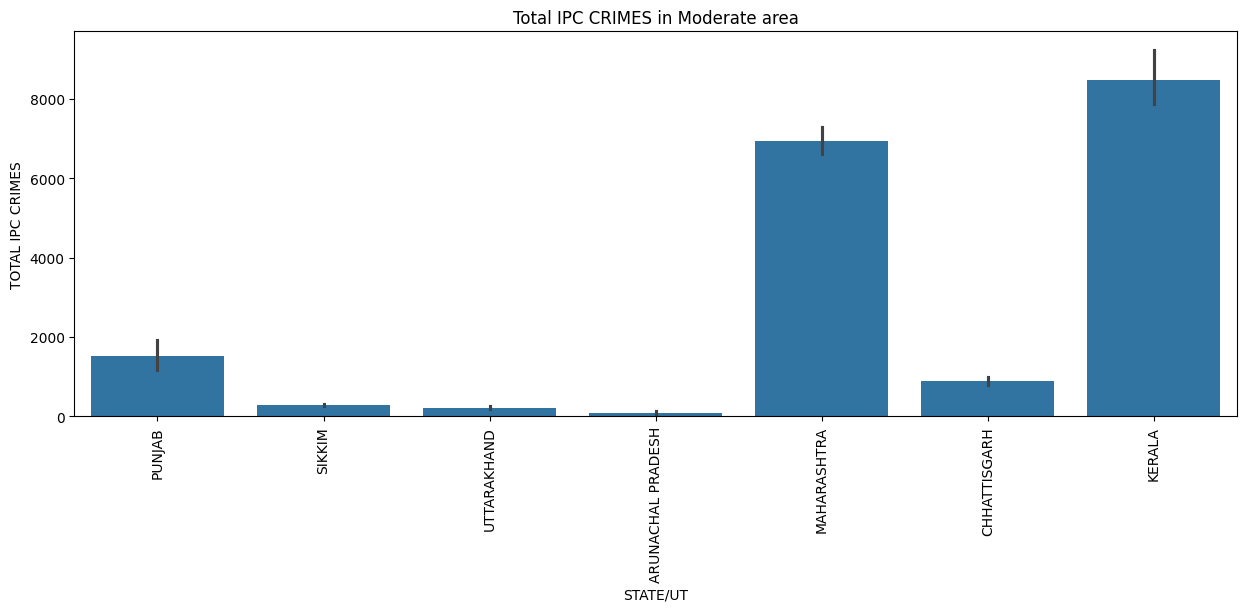

In [91]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=moderatearea)
plt.xticks(rotation=90)
plt.title("Total IPC CRIMES in Moderate area")
plt.savefig('Total IPC CRIMES in Moderate area.jpg')
plt.show()


In [ ]:
Kerala is the state with the highest level of sensitivity to all IPC crimes.

#                    Total Crimes Against Women versus State/UT


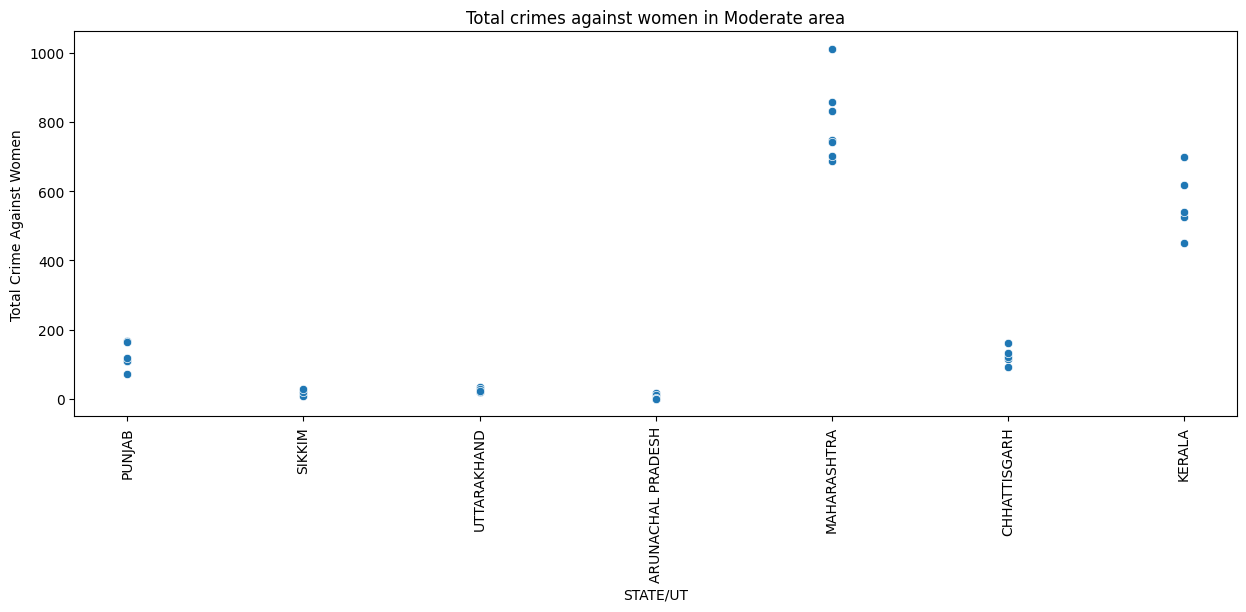

In [93]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='STATE/UT', y='Total Crime Against Women',data=moderatearea)
plt.xticks(rotation=90)
plt.title("Total crimes against women in Moderate area")
plt.savefig('Total crimes against women in Moderate area.jpg')
plt.show()


In [ ]:
he top two states in terms of crime against women are Maharastra and kerela.

#                        Total crimes against SCs vs. State/UT


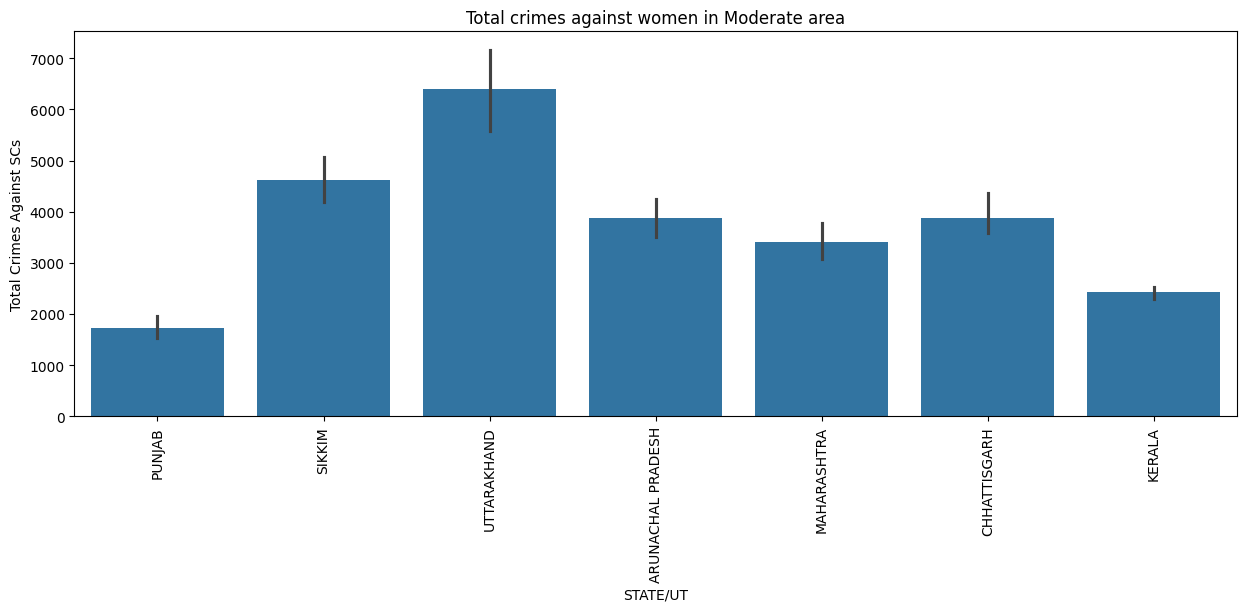

In [95]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='Total Crimes Against SCs',data=moderatearea)
plt.xticks(rotation=90)
plt.title("Total crimes against women in Moderate area")
plt.savefig('Total crimes against women in Moderate area.jpg')
plt.show()

In [ ]:
UTTARAKHAND, SIKKIM and CHHATISGARH have the most crimes against SCs.



# Total offenses against STs vs. State/UT


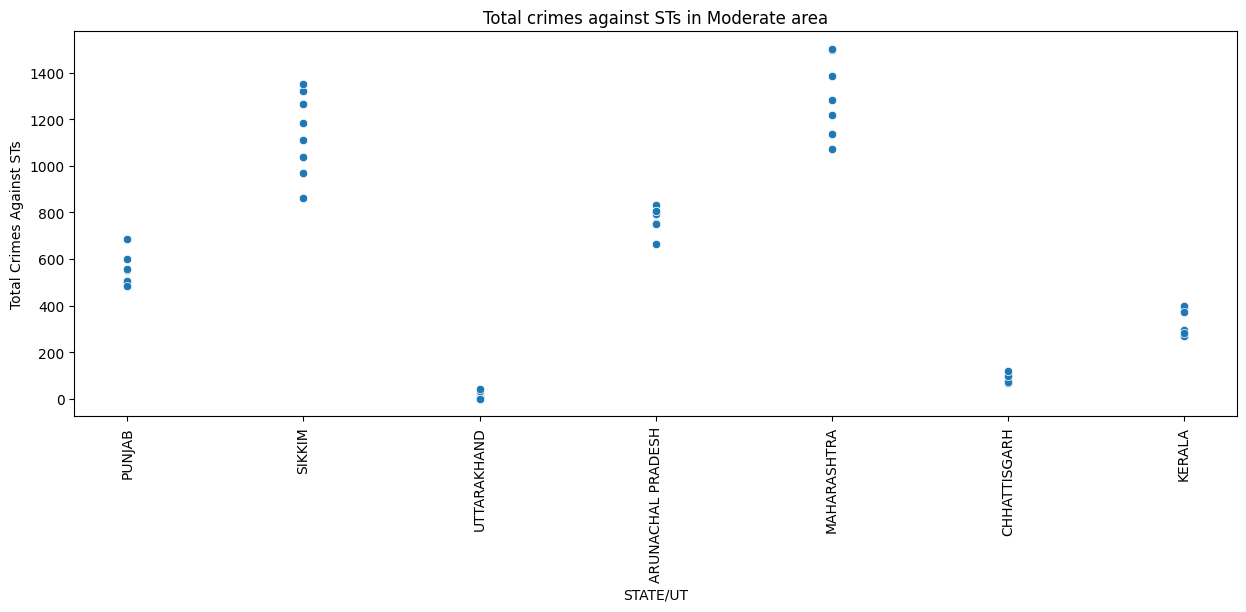

In [96]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='STATE/UT', y='Total Crimes Against STs',data=moderatearea)
plt.xticks(rotation=90)
plt.title("Total crimes against STs in Moderate area")
plt.savefig('Total crimes against STs in Moderate area.jpg')

plt.show()

In [ ]:
MAHARASTRA and SIKKIM has highest crime rate against STs

In [100]:
tot_murder= moderatearea['MURDER'].sum()
tot_rape= moderatearea['RAPE'].sum()
tot_dowrydeaths = moderatearea['DOWRY DEATHS'].sum()

tot_kidnap= moderatearea['KIDNAPPING & ABDUCTION'].sum()
tot_dacoity= moderatearea['DACOITY'].sum()
tot_robbery = moderatearea['ROBBERY'].sum()
tot_burglary= moderatearea['BURGLARY'].sum()
tot_theft= moderatearea['THEFT'].sum()
tot_crimes_against_women = moderatearea['Total Crime Against Women'].sum()
tot_crimes_against_STs = moderatearea['Total Crimes Against STs'].sum()
tot_crimes_against_SCs = moderatearea['Total Crimes Against SCs'].sum()
tot_crimes_against_children = moderatearea['Total Crime Against Chilren'].sum()


crime_group = ['TOTAL Murder','TOTAL rape','Total Dowry Deaths','Total Kidnapping','TOTAL Dacoity','Total Robbery','TOtal Burglary','Total Theft',
                'Total Crimes Against Women','Total Crimes Against SC','Total Crimes against STs','Total Crimes Against Children']
values = [tot_murder,tot_rape,tot_dowrydeaths,tot_kidnap,tot_dacoity,tot_robbery,tot_burglary,
          tot_theft,tot_crimes_against_women,tot_crimes_against_STs,tot_crimes_against_SCs,tot_crimes_against_children]

colors = ['crimson','gold','green','yellow','blue','black']

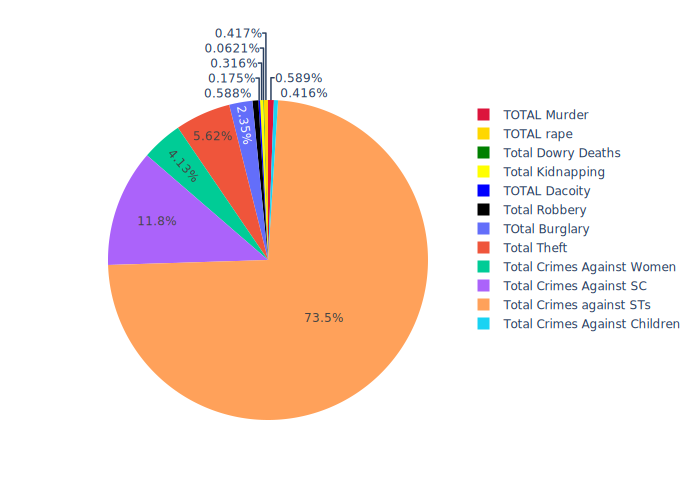

In [101]:
fig = go.Figure(data=[go.Pie(labels=crime_group, values=values,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show(renderer='svg')

In [ ]:
Total Crimes against STs accounts for the largest percentage of the data.

In [102]:
moderatearea.groupby('DISTRICT')['THEFT'].sum().sort_values()

DISTRICT
ANJAW                12.0
BALOD                75.0
CHANGLANG           113.0
BALRAMPUR           130.0
ALMORA              241.0
AMRITSAR RURAL      267.0
EAST                373.0
AMRITSAR           1116.0
ALAPUZHA           1438.0
AHMEDNAGAR        10069.0
Name: THEFT, dtype: float64

In [106]:
moderatearea['STATE/UT'].value_counts()


STATE/UT
SIKKIM               8
UTTARAKHAND          8
ARUNACHAL PRADESH    7
MAHARASHTRA          7
PUNJAB               6
CHHATTISGARH         5
KERALA               5
Name: count, dtype: int64

In [ ]:
largest number of district found in SIKKIM and UTTARAKHAND for moderate area

#                        # Peaceful Area Cluster Analysis


In [108]:
pd.pivot_table(sensitivearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Total Crime Against Women', 'Total Crime Against Chilren',
       'Total Crimes Against SCs', 'Total Crimes Against STs'], index =['STATE/UT','DISTRICT', 'YEAR'],
                          aggfunc = max)
#'Year' and 'State' features in a pivot table that illustrates a specific crime

ARSON  ATTEMPT TO MURDER  AUTO THEFT  BURGLARY  \
STATE/UT DISTRICT YEAR                                                     
0        2        2005.0   30.0               48.0        53.0     191.0   
                  2006.0   34.0               88.0        64.0     228.0   
                  2007.0   17.0               61.0        80.0     211.0   
                  2009.0   35.0               39.0        82.0     200.0   
                  2011.0   33.0               94.0        96.0     230.0   
...                         ...                ...         ...       ...   
17       151      2011.0    0.0               13.0       114.0      29.0   
                  2012.0   15.0                5.0       127.0      15.0   
         185      2010.0   10.0              106.0       114.0       4.0   
                  2011.0   20.0              178.0       119.0      10.0   
                  2012.0   33.0              283.0       129.0       7.0   

                          CAUSING DEATH BY NEGLIGENCE  CHEATING  \
STATE/UT DISTRICT YEAR                                            
0        2        2005.0                        276.0     173.0   
                  2006.0                        313.0     194.0   
                  2007.0                        309.0     179.0   
                  2009.0                        333.0     161.0   
                  2011.0                        359.0     175.0   
...                                               ...       ...   
17       151      2011.0                        255.0     118.0   
                  2012.0                        743.0     135.0   
         185      2010.0                          2.0      34.0   
                  2011.0                          7.0      33.0   
                  2012.0                          3.0      64.0   

                          COUNTERFIETING  CRIMINAL BREACH OF TRUST  \
STATE/UT DISTRICT YEAR                                               
0        2        2005.0             4.0                      13.0   
                  2006.0             5.0                      19.0   
                  2007.0             2.0                      15.0   
                  2009.0             7.0                      11.0   
                  2011.0             3.0                      24.0   
...                                  ...                       ...   
17       151      2011.0             1.0                      39.0   
                  2012.0             4.0                      23.0   
         185      2010.0             2.0                       9.0   
                  2011.0             3.0                      16.0   
                  2012.0             6.0                      18.0   

                          CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
STATE/UT DISTRICT YEAR                                                
0        2        2005.0                                       13.0   
                  2006.0                                       14.0   
                  2007.0                                       12.0   
                  2009.0                                       11.0   
                  2011.0                                        8.0   
...                                                             ...   
17       151      2011.0                                       19.0   
                  2012.0                                       15.0   
         185      2010.0                                       10.0   
                  2011.0                                       12.0   
                  2012.0                                       10.0   

                          CUSTODIAL RAPE  ...  \
STATE/UT DISTRICT YEAR                    ...   
0        2        2005.0             0.0  ...   
                  2006.0             0.0  ...   
                  2007.0             0.0  ...   
                  2009.0             0.0  ...   
                  2011.0            

In [109]:
peacefularea['STATE/UT'].value_counts()


STATE/UT
UTTAR PRADESH        700
MADHYA PRADESH       526
TAMIL NADU           406
ODISHA               406
BIHAR                404
MAHARASHTRA          402
KARNATAKA            363
RAJASTHAN            348
GUJARAT              346
ASSAM                311
JAMMU & KASHMIR      310
PUNJAB               292
JHARKHAND            284
HARYANA              236
CHHATTISGARH         218
WEST BENGAL          191
ARUNACHAL PRADESH    176
HIMACHAL PRADESH     164
KERALA               160
ANDHRA PRADESH       150
UTTARAKHAND          148
NAGALAND             126
MANIPUR              113
DELHI UT              96
MIZORAM               96
MEGHALAYA             84
TRIPURA               55
SIKKIM                40
A & N ISLANDS         24
DAMAN & DIU           24
GOA                   24
PUDUCHERRY            18
CHANDIGARH            12
D & N HAVELI          12
LAKSHADWEEP           12
Name: count, dtype: int64

In [110]:
peacefularea['DISTRICT'].value_counts()


DISTRICT
G.R.P.              46
NORTH               37
RAILWAYS            35
SOUTH               26
HAMIRPUR            24
                    ..
ALLAHABAD            1
CHENGAI              1
PUNE RURAL           1
TRIVANDRUM RURAL     1
CAR                  1
Name: count, Length: 745, dtype: int64

In [111]:
peacefularea.describe().T


count         mean          std  \
YEAR                                       7277.0  2006.551876     3.455276   
MURDER                                     7277.0    36.258623    27.888180   
ATTEMPT TO MURDER                          7277.0    30.430535    31.098401   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  7277.0     3.848564     7.023787   
RAPE                                       7277.0    21.426000    20.906831   
CUSTODIAL RAPE                             7277.0     0.001512     0.038853   
OTHER RAPE                                 7277.0    21.424488    20.906346   
KIDNAPPING & ABDUCTION                     7277.0    27.803216    27.741503   
KIDNAPPING AND ABDUCTION OF OTHERS         7277.0     6.642847     9.320530   
DACOITY                                    7277.0     5.440704     8.262426   
PREPARATION AND ASSEMBLY FOR DACOITY       7277.0     2.171499     6.937877   
ROBBERY                                    7277.0    19.083139    20.767803   
BURGLARY                                   7277.0    89.050983    84.585586   
THEFT                                      7277.0   239.200495   256.480913   
AUTO THEFT                                 7277.0    71.394393   113.288128   
OTHER THEFT                                7277.0   167.806101   190.722314   
RIOTS                                      7277.0    67.861756    93.950312   
CRIMINAL BREACH OF TRUST                   7277.0    14.030232    17.142626   
CHEATING                                   7277.0    53.096468    78.963534   
COUNTERFIETING                             7277.0     1.997389     4.493703   
ARSON                                      7277.0    10.689845    14.122340   
HURT/GREVIOUS HURT                         7277.0   277.531950   346.691613   
DOWRY DEATHS                               7277.0     7.812560    10.163969   
CAUSING DEATH BY NEGLIGENCE                7277.0    84.457331   107.233879   
OTHER IPC CRIMES                           7277.0   847.851999   889.565437   
TOTAL IPC CRIMES                           7277.0  1951.423251  1565.100936   
Total Crime Against Women                  7277.0   161.778892   142.470479   
Total Crime Against Chilren                7277.0    52.889652   261.911794   
Total Crimes Against SCs                   7277.0    43.899272   107.232370   
Total Crimes Against STs                   7277.0     8.805689    26.779810   
cluster                                    7277.0     2.000000     0.000000   

                                              min     25%     50%     75%  \
YEAR                                       2001.0  2004.0  2007.0  2010.0   
MURDER                                        0.0    15.0    31.0    51.0   
ATTEMPT TO MURDER                             0.0     8.0    22.0    42.0   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER     0.0     0.0     1.0     4.0   
RAPE                                          0.0     6.0    15.0    30.0   
CUSTODIAL RAPE                                0.0     0.0     0.0     0.0   
OTHER RAPE                                    0.0     6.0    15.0    30.0   
KIDNAPPING & ABDUCTION                        0.0     8.0    19.0    40.0   
KIDNAPPING AND ABDUCTION OF OTHERS            0.0     1.0     4.0     8.0   
DACOITY                                       0.0     0.0     3.0     7.0   
PREPARATION AND ASSEMBLY FOR DACOITY          0.0     0.0     0.0     2.0   
ROBBERY                                       0.0     5.0    13.0    27.0   
BURGLARY                                      0.0    23.0    67.0   131.0   
THEFT                                         0.0    72.0   166.0   320.0   
AUTO THEFT                                    0.0     8.0    34.0    87.0   
OTHER THEFT                                   0.0    52.0   117.0   219.0   
RIOTS                                         0.0     8.0    35.0    89.0   
CRIMINAL BREACH OF TRUST                      0.0     3.0     8.0    19.0   
CHEATING                                      0.0   

#                    State/UT versus all IPC offenses


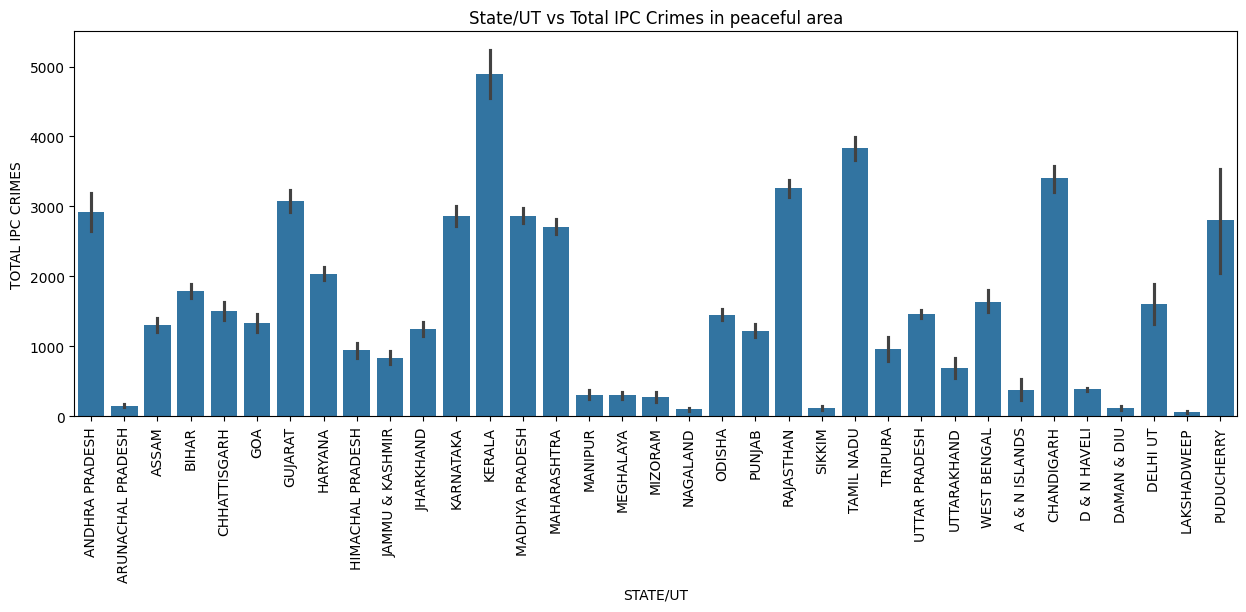

In [112]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=peacefularea)
plt.xticks(rotation=90)
plt.title('State/UT vs Total IPC Crimes in peaceful area')
plt.savefig('Total IPC Crimes in peaceful area.jpg')
plt.show()


#                        # Total Crimes against Women vs State/UT


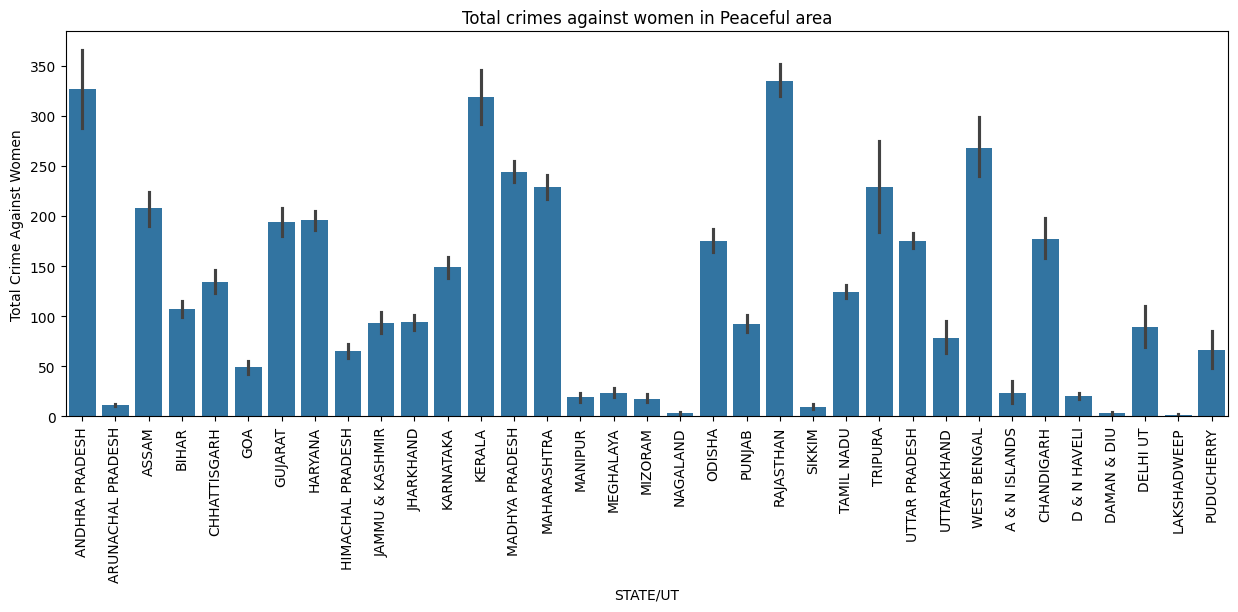

In [116]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='Total Crime Against Women',data=peacefularea)
plt.xticks(rotation=90)
plt.title("Total crimes against women in Peaceful area")
plt.savefig('crime agains women inoeacefula area')
plt.show()

In [ ]:
Kerala, Madhya Pradesh, Rajasthan, Andhra Pradesh, and Maharashtra and west Bengalare the states with the highest rate of crime.

Arunachal Pradesh, Mizoram, Meghalaya, and Manipur are the states with the lowest rates of crimes against women.

#                    Total crimes against SCs vs. State/UT


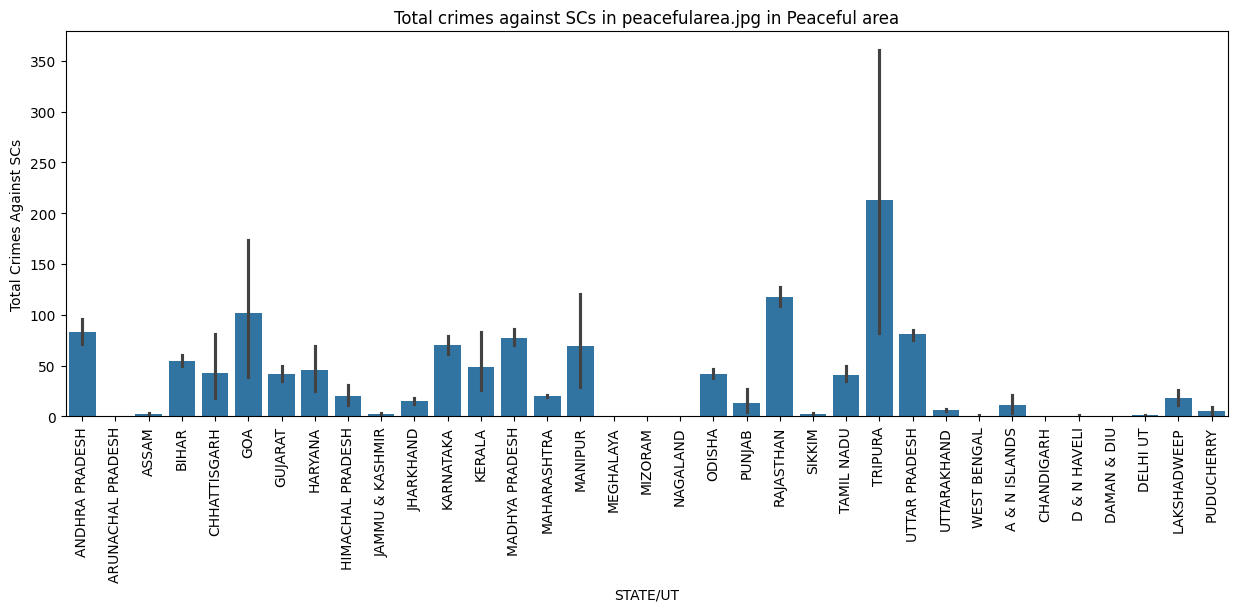

In [118]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='Total Crimes Against SCs',data=peacefularea)
plt.xticks(rotation=90)
plt.title("Total crimes against SCs in peacefularea.jpg in Peaceful area")
plt.savefig('crimes against SCs in peacefularea.jpg')
plt.show()

In [ ]:
Tripura ,Rajasthan and goa highest in crime rate against SCsas compared to other states 

# Total offenses against STs vs. State/UT


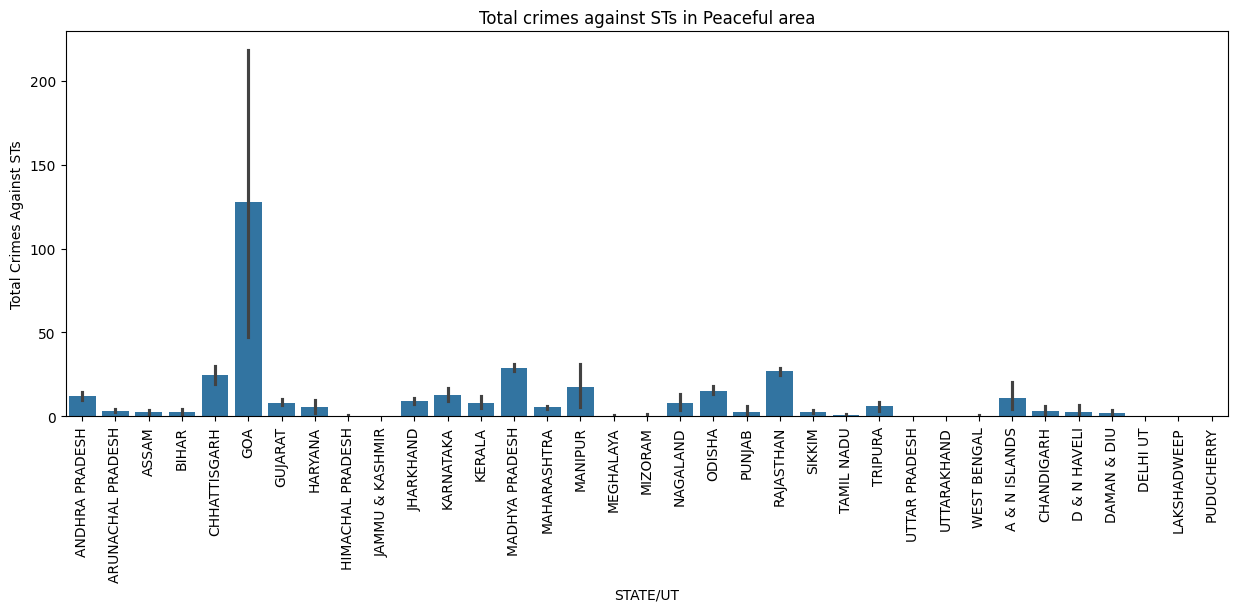

In [119]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='Total Crimes Against STs',data=peacefularea)
plt.xticks(rotation=90)
plt.title("Total crimes against STs in Peaceful area")
plt.savefig('crimes against STs in Peaceful area')
plt.show()

In [ ]:
Goa ,Madhya pradesh and Rajasthan are highest in crime rate against STs

# State/UT versus all offenses committed against Children


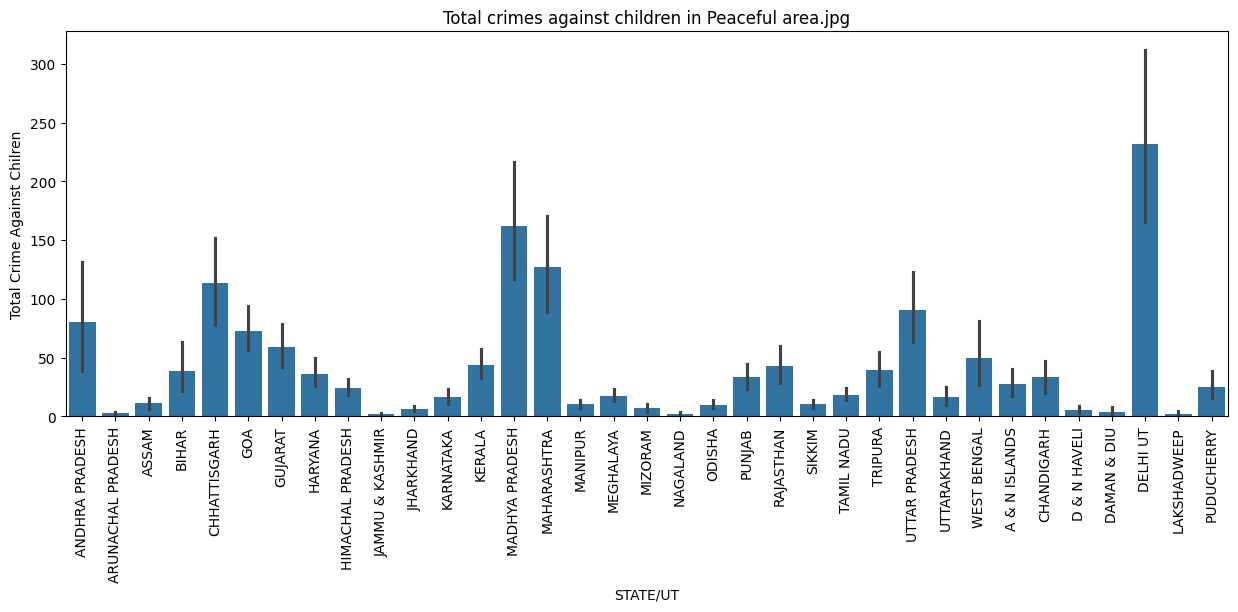

In [122]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='Total Crime Against Chilren',data=peacefularea)
plt.xticks(rotation=90)
plt.title("Total crimes against children in Peaceful area.jpg")
plt.show()

In [123]:
peacefularea.groupby('DISTRICT').min()


STATE/UT    YEAR  MURDER  ATTEMPT TO MURDER  \
DISTRICT                                                             
A and N ISLANDS   A & N ISLANDS  2007.0    15.0               19.0   
ADILABAD         ANDHRA PRADESH  2001.0    73.0               60.0   
AHMEDABAD RURAL         GUJARAT  2001.0    19.0                4.0   
AHWA-DANG               GUJARAT  2001.0     4.0                0.0   
AIZAWL                  MIZORAM  2001.0     4.0                4.0   
...                         ...     ...     ...                ...   
WOKHA                  NAGALAND  2001.0     1.0                2.0   
YADGIRI               KARNATAKA  2010.0    23.0               21.0   
YAMUNANAGAR             HARYANA  2001.0    21.0               14.0   
YAVATMAL            MAHARASHTRA  2001.0    56.0               43.0   
ZUNHEBOTO              NAGALAND  2001.0     0.0                1.0   

                 CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  \
DISTRICT                                                           
A and N ISLANDS                                        1.0   3.0   
ADILABAD                                               9.0  35.0   
AHMEDABAD RURAL                                        0.0   3.0   
AHWA-DANG                                              0.0   0.0   
AIZAWL                                                 0.0   6.0   
...                                                    ...   ...   
WOKHA                                                  0.0   0.0   
YADGIRI                                                0.0   5.0   
YAMUNANAGAR                                            0.0  12.0   
YAVATMAL                                               1.0  33.0   
ZUNHEBOTO                                              0.0   0.0   

                 CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
DISTRICT                                                              
A and N ISLANDS             0.0         3.0                    12.0   
ADILABAD                    0.0        35.0                    41.0   
AHMEDABAD RURAL             0.0         3.0                    13.0   
AHWA-DANG                   0.0         0.0                     0.0   
AIZAWL                      0.0         6.0                     0.0   
...                         ...         ...                     ...   
WOKHA                       0.0         0.0                     0.0   
YADGIRI                     0.0         5.0                    20.0   
YAMUNANAGAR                 0.0        12.0                    15.0   
YAVATMAL                    0.0        33.0                    28.0   
ZUNHEBOTO                   0.0         0.0                     0.0   

                 KIDNAPPING AND ABDUCTION OF OTHERS  ...  HURT/GREVIOUS HURT  \
DISTRICT                                             ...                       
A and N ISLANDS                                 3.0  ...                99.0   
ADILABAD                                        6.0  ...              1044.0   
AHMEDABAD RURAL                                 0.0  ...               236.0   
AHWA-DANG                                       0.0  ...                10.0   
AIZAWL                                          0.0  ...                11.0   
...                                             ...  ...                 ...   
WOKHA                                           0.0  ...                 2.0   
YADGIRI                                         2.0  ...               289.0   
YAMUNANAGAR                                     2.0  ...               112.0   
YAVATMAL                                        1.0  ...               915.0   
ZUNHEBOTO                                       0.0  ...                 0.0   

                 DOWRY DEATHS  CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  \
DISTRICT                                                                       
A and N ISLANDS           1.0                          4.0             337.0   
ADILABAD              

In [124]:
peacefularea.groupby('DISTRICT')['THEFT'].sum().sort_values()


DISTRICT
BIEO                   0.0
RAILWAYS KMR           0.0
CAW                    0.0
EOW                    0.0
CRIME KASHMIR          0.0
                    ...   
VADODARA COMMR.    15068.0
CENTRAL            15587.0
CHANDIGARH         18474.0
MUMBAI RLY.        21604.0
G.R.P.             29860.0
Name: THEFT, Length: 745, dtype: float64

In [125]:
peacefularea[peacefularea['DISTRICT']=='G.R.P.'].max()


STATE/UT                                     UTTAR PRADESH
DISTRICT                                            G.R.P.
YEAR                                                2012.0
MURDER                                                31.0
ATTEMPT TO MURDER                                     25.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              9.0
RAPE                                                   5.0
CUSTODIAL RAPE                                         0.0
OTHER RAPE                                             5.0
KIDNAPPING & ABDUCTION                                15.0
KIDNAPPING AND ABDUCTION OF OTHERS                     9.0
DACOITY                                               30.0
PREPARATION AND ASSEMBLY FOR DACOITY                   7.0
ROBBERY                                              216.0
BURGLARY                                              11.0
THEFT                                               3141.0
AUTO THEFT                                            90

In [126]:
peacefularea['DISTRICT'].max()


'ZUNHEBOTO'

In [127]:
peacefularea[peacefularea['DISTRICT']=='ZUNHEBOTO'].max()


STATE/UT                                      NAGALAND
DISTRICT                                     ZUNHEBOTO
YEAR                                            2012.0
MURDER                                            14.0
ATTEMPT TO MURDER                                  5.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER          1.0
RAPE                                               3.0
CUSTODIAL RAPE                                     0.0
OTHER RAPE                                         3.0
KIDNAPPING & ABDUCTION                             3.0
KIDNAPPING AND ABDUCTION OF OTHERS                 0.0
DACOITY                                            2.0
PREPARATION AND ASSEMBLY FOR DACOITY               0.0
ROBBERY                                           10.0
BURGLARY                                          14.0
THEFT                                             27.0
AUTO THEFT                                         6.0
OTHER THEFT                                       23.0
RIOTS     

In [128]:
peacefularea['DISTRICT'].min()


'A and N ISLANDS'

In [129]:
peacefularea[peacefularea['DISTRICT']=='A and N ISLANDS'].max()


STATE/UT                                       A & N ISLANDS
DISTRICT                                     A and N ISLANDS
YEAR                                                  2007.0
MURDER                                                  15.0
ATTEMPT TO MURDER                                       19.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER                1.0
RAPE                                                     3.0
CUSTODIAL RAPE                                           0.0
OTHER RAPE                                               3.0
KIDNAPPING & ABDUCTION                                  12.0
KIDNAPPING AND ABDUCTION OF OTHERS                       3.0
DACOITY                                                  5.0
PREPARATION AND ASSEMBLY FOR DACOITY                     0.0
ROBBERY                                                  9.0
BURGLARY                                                90.0
THEFT                                                  112.0
AUTO THEFT              

In [131]:
from sklearn.metrics import silhouette_score

silhouette_score(X,y_kmeans)#cluster and information


0.5020038904729952

# 4.3 Analyzing our clusters and writing a report outlining all of our observations.

#                    Capstone Project Overall story in my own words